# Разработка Рейтинговой модели для сегмента "Крупнейшие заёмщики"

<br>
  
# Содержание <a name=content></a>
  
<br>
  
- [<span style="color:red">**Версионность**</span>](#versions)
- [<span style="color:red">**Конфигурационные файлы**</span>](#config_files)
<br>
  
- [<span style="color:brown">**Импорт библиотек + Master Scale + Словарь**</span>](#initial_import)
- [Определение функций](#functions)
<br>
  
- [Ключевые кейсы](#key_cases)  
- [**Загрузка финансовой отчетности**](#upload_financials)
- [**Загрузка данных**](#upload_data)
    - [<span style="color:violet">проверка</span>](#check01___previous_data)

<br>
  
**ЧАСТЬ I   -- Разработка Модели PD (рейтинговой)**
___
  
  
- **SFA**
    - [SFA - качественный модуль](#sfa_ql)
    - [SFA - индустрия (учёт скор-балла ЦЭП](#sfa_ind)
    - [SFA - финансовый модуль](#sfa_qn)
    - [**Выборка для отбора многофакторных моделей**](#sample_)
    
- **MFA**
    - [MFA - качественные модели](#mfa_ql)
    - [MFA - количественные модели](#mfa_qn)
    - [**Итоговые модели - количественные/финансовые**](#final_models_qn)
    - [**Итоговые модели - качественные**](#final_models_ql)
    - [Объединение моделей](#models_merge)
___

- [<span style = "color:brown">**Калибровка (исходная)**</span>](#calibr_init)
    - [**Индивидуальные рейтинги standalone (риск-факторов и скор-баллов)**](#individual_ratings)
  
  
- [Поддержка государства (GOV)](#gov)
  
  
- [Предупреждающие сигналы (WS)](#ws)


- [<span style = "color:brown">**Калибровка (дополнительная)**</span>](#calibr_extra)
    - [Калибровка-1 (регрессия таргета на скор)](#calibr_extra_reg)
    - [Калбировка-2 (Stretching)](#calibr_extra_stretching)
        - [Расчёт калибровочных коэффициентов](#stretching_coeff)    
<br/>
- [**!! Проверка (ключевые кейсы)**](#check1_key_cases)
___

- [<span style="color:green">**ВЫГРУЗКА ДАННЫХ ДЛЯ ДАЛЬНЕЙШЕГО ПРОЦЕССИНГА (РЕЙТИНГИ) -> Групповой модуль, etc.**</span>](#dfs_export)
    - [Итоговый расчёт основынх статистик](#basic_statistics_calc)
    
    
- [<span style="color:violet">**ВЫГРУЗКА РЕЙТИНГОВ для последующей АВТОВАЛИДАЦИИ**</span>](#autovalidation_export)
  
  
- [<span style="color:brown">**Дополнительный расчёт**</span>](#additional_calc)
    - [Применение транзакционного модуля](#additional_transaction_module)
    
    
<br>

**ЧАСТЬ II  -- Учёт и применение группового влияния**
___
   
   
- [**Группы 1-го, 2-го и 3-го уровня влияния (+сегментация Групп)**](#gr_impact_1st_2nd_3rd_level_and_segmentation)
    - [Выделение финансовой отчётности IFRS/ RAS и Фиксирование сегмента (для Групп)](#upp_gr_financials_and_fix_segment)
    
    
- [<span style="color:brown">**Расчёт рейтингов по Крупнейшим ГРУППАМ**</span>](#top_gr_ratings)
    - [Финансовые риск-факторы](#top_gr_factors_qn)
    - [Качественные риск-факторы + Индустриальный фактор + Поддержка государства (GOV) + Предупреждающие сигналы (WS)](#top_gr_factors_ql_ind_gov_ws)
    - [Страновые рейтинги внешних агентств + Внешние рейтинги дочернихк компаний (Fitch, Moody's, S&P)](#top_gr_country_companies_ratings)
        - [<span style="color:red"*>*Финальный расчёт рейитнгов для Крупнейших ГРУПП**</span>](#top_gr_final_ratings)
        
- [<span style = "color:red">**УЧЕТ ГРУППОВОГО ВЛИЯНИЯ (1-го, 2-го и 3-го уровня)**</span>](#group_impact_data)
    - [Группы <span style = "color:red">**1-го уровня**</span> влияния](#gr_impact_1stlvl)
        - [Факторы группового влияния 1-го уровня](#gr_impact_1stlvl_factors)
        - [Веса группового влияния **1-го уровня**](#gr_impact_1stlvl_weights)
    - [**Применение всех уровней Группового влияния**](#gr_impact_all_levels)
    
    - [<span style = "color:brown">**Расчёт Финальных рейтингов (с учётом всех уровней Группового влияния)**</span>](#final_ratings)
    
    
- [Бэнчмарк SBER'а](#sber_benchmark)


<br>

**ЧАСТЬ III -- Документация**
___


- [<span style = "color:brown">**Документация**</span>](#document)


<br>

**ЧАСТЬ IV -- СКРИПТ Внедрения модели**
___


- [<span style = "color:brown">**Скрипт внедрения модели**</span>](#model_implementation)



<br>
  
  
# Версионность <a name=versions></a>
  
<br>

In [1]:
c_version_r = "028_2"
c_version_w = "033_3"

from IPython.core.display import display, HTML
display(HTML("<style>.container {width:85% !important; }</style>"))

In [3]:
%%javascript

Jupyter.keyboard_manager.disable()

<IPython.core.display.Javascript object>

<br>
  
  
# Конфигурационные файлы <a name=config_files></a>


[Содержание](#content)

In [33]:
#
#  -- ОСНОВНОЙ КОНФИГУРАЦИОННЫЙ ФАЙЛ МОДЕЛИ
#
___path_config_base___ = "/work//_model_config_files_//______base_config_file_v0.1.xlsx"
#
#
#
___path_top_model = "/work//_model_config_files_//b__2__1_pd_model_TOP_"+c_version_w[:c_version_w.find('_')]+"_v0.02.xlsx"
___IS_ACTUAL_MODEL_EXISTS___ = True
#
l___info_ifrs_ = ["/work//a__3____financial_IFRS_RAS//IFRS_report_final.xlsx", "Витрина МСФО"]
l___info_ras_ = ["/work//a__3____financial_IFRS_RAS//RAS_report_final.xlsx", "Витрина РСБУ"]
#
___report_date___ = "01.10.2021"
#
___path_top___transform_norm = "/work//_model_config_files_//b__2__1_pd_model_TOP_"+c_version_w[:c_version_w.find('_')]+"_v0.01.xlsx"
#
#
# -- Документ (исходная версия)
#
___path_doc       = '#docs//b__2__1_TOP_PDmodel_development_report_v0.00.doc'
___image_ch1_1___ = '#docs//b__2__1_picture2.png'
___image_ch1_2___ = '#docs//b__2__1_picture3.PNG'

<br>
  
  
# Импорт библиотек + Master Scale + Словарь <a name = initial_import></a>


[Содержание](#content)

In [ ]:
import pandas as pd
#
#  ----- Загрузка библиотек
#
t___ = pd.read_excel(___path_config_base___, sheet_name = "EXTRA_LIBs_MAIN")
for i in (t___.dropna()).index : 
    print('\n ',str(t___.loc[i, 'Библиотека python необходимая для портфельного анализа']), ' ;')
    exec(str(t___.loc[i,'Библиотеки python необходимые для портфельного анализа']))
#
#  ----- Мастер-шкала
#
t___     = pd.read_excel(___path_config_base___, sheet_name = "EXTRA_MasterScale")
MS_LB    = (t___['MS_LB___GPB_RUS'].dropna()).to_list()
MS_PD_Rs = [list(t___.loc[i,['MS_Rating___GPB_RUS','MS_PD___GPB_RUS']]) for i in (t___[['MS_Rating_GPB_RUS','MS_PD___GPB_RUS']].dropna()).index ]
MS_UB    = (t___['MS_UB___GPB_RUS'].dropna()).to_list()
print( '\n Сопоставление размерности массивов Мастер-шкалы (ГПБ-Россия) : ',len(MS_LB),', ',len(MS_PD_Rs),', ',len(MS_UB)
      ,'\n Используемая в расчётах Мастер-шкала : \n\n',t___[['MS_LB___GPB_RUS','MS_Rating___GPB_RUS','MS_PD___GPB_RUS','MS_UB___GPB_RUS']].dropna()
     )
#
#  ----- Словарь
#
d = (pd.read_excel(___path_config_base___, sheet_name = "DICTIONARY_TOP"))
d = d[-(d['name'].isnull())]
d = d[['name','description','description_rus']]
#
d.loc[:,'name']            = d['name'].map(lambda x: str(x).replace(" ","_"))
d.loc[:,'description']     = d['description'].map(lambda x: str(x).replace(" ","_"))
d.loc[:,'description_rus'] = d['description_rus'].map(lambda x: str(x).replace(" ","_"))
#
D = (pd.read_excel(___path_config_base___, sheet_name = "DICTIONARY_ALL"))
with pd.option_context('display.max_rows',None,'display.max_columns',None,'max_colwidth',110):
    print(d)
    
___tot_t___ = {0:0}

<br>
  
  
# Определение функций <a name=functions></a>


[Содержание](#content)

In [ ]:
import sys, json
import pickle
import logging

_CRs_version_ = 'v10'

f = open("/work/_______CorpRisks_"+_CRs_version_+".ipynb", 'r') # input.py
j = json.load(f)
of = open("CorpRisks_"+_CRs_version_+".py",'w')                # output.py
#
if j["nbformat"] >=4 :
    for i, cell in enumerate(j["cells"]):
        if len(cell["source"]) > 0 :            
            #            
            if str(cell["source"][0]).find('#main',0,len(cell["source"])) >= 0:
                of.write("#cell "+str(i)+"\n")
                for line in cell["source"]:
                    of.write(line)
                of.write('\n\n')
#
of.close()
#
exec("""import CorpRisks_"""+_CRs_version_+""" as CRs""")
#
CRs.inwards()

<br>
  
  
# Ключевые кейсы <a name=key_cases></a>


[Содержание](#content)


In [ ]:
#
#  -----
#
l___key_cases = [
    
     [ 1520049787 , 'ПАО "ГМК "Норильский никель"' ]
    ,[ 1520278001 , 'ПАО "Газпром"']
    ,[ 1520278092 , 'ПАО "НК Роснефть"']
    ,[ 1520275926 , 'ПАО "СИБУР Холдинг"']
    ,[ 1520284788 , 'ОАО "РЖД"']
    ,[ 1520268762 , 'UC RUSAL, IPJSC']
    ,[ 1520292557 , 'ПАО "НОВАТЭК"']
    ,[ 1520285424 , 'АО "Атомэнергопром"']
    ,[ 1520273529 , 'ПАО "Россети"']
    ,[ 1520264955 , 'АО "ХК МЕТАЛЛОИНВЕСТ"']
    
    
]

<br>
  
  
# Загрузка данных <a name=upld_data></a>


[Содержание](#content)


In [ ]:
___start_t___ = time.time()
#  -- time bracket - start
#
#
#
# -- загрузка Генеральной совокупности
#
#
DEV = 

<br>
  
  
# SFA


[Содержание](#content)

<br>
  
  
## SFA - качественный модуль <a name=sfa_ql></a>


[Содержание](#content)

In [ ]:
___start_t___ = time.time()
#
#
#
l__ql_vars = [
    
     'QL_1'
    ,'QL_2'
    ,'QL_3'
    ,'QL_4'
    ,'QL_5'
    ,'QL_6'
    ,'QL_7'
    ,'QL_8'
    ,'QL_9'
    
]

<br> 


## SFA - индустрия (учёт скор-балла ЦЭП <a name = sfa_ind ></a>


[Содержание](#content)


<br>
  
  
## SFA - финансовый модуль <a name=sfa_qn></a>


[Содержание](#content)

<br>
  
  
## Выборка для отбора многофакторных моделей <a name=sample_></a>


[Содержание](#content)

<br\>

** Qualitative factors - WoE transform**

In [3]:
def R_squared(x,y):
    
    z = np.mean(y)
    
    sq_sum1 = sum((y - z)**2)
    sq_sum2 = sum((y - x)**2)
    
    r_sq = 1 - (sq_sum2/sq_sum1)
    
    return r_sq;
    

In [5]:
def WOE_transform_QN_v01(x,y, bounds, test, oot,name):
    
    o = x == -999999999
    
    a1 = x == 999999999
    
    t0 = np.zeros(x.size)   
    t_test = np.zeros(test.size)   
    t_oot = np.zeros(oot.size)
    
    x= x[:,None]
    x_t = pd.DataFrame(x)
    
    y= y[:,None]
    y_t = pd.DataFrame(y)    
    
    
    #train
    for i in range(0,x.size):
            
            for j in range(0,pd.DataFrame(bounds).size):
                
                if (x[i] == 999999999) | (x[i] == -999999999):
                    t0[i] = -1.0
                    break;
                
                if (x[i] <= bounds[j]) and (x[i] !=-999999999):
                    t0[i] = j
                    break;
                    
            if (x[i] > bounds[j]) and (x[i] != 999999999):
                t0[i]=j+1
                
    t0 = t0[:,None]    
    t0_t = pd.DataFrame(t0)
    
    t1 = pd.DataFrame(pd.concat([x_t,t0_t,y_t],axis=1))  
    t1.columns = ['value','group','target']
    
    #if name == 'PRV2_01':
    #    t1.to_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b6___Pravo\\Check\\b6___PRV2_01_WoE_u.csv",sep=';',encoding='windows-1251')
                
                
    #test            
    for i in range(0,test.size):
            
            for j in range(0,pd.DataFrame(bounds).size):
                
                if (test[i] == 999999999) | (test[i] == -999999999):
                    t_test[i] = -1.0
                    break;
                
                if (test[i] <= bounds[j]) and (test[i] !=-999999999):
                    t_test[i] = j
                    break;
                    
            if (test[i] > bounds[j]) and (test[i] != 999999999):
                t_test[i]=j+1
    
    t_test = t_test[:,None]
    t_test_t = pd.DataFrame(t_test)
           
    test1 = pd.DataFrame(pd.concat([test,t_test_t],axis=1))
    test1.columns = ['value','group']
                
                
    #oot            
    for i in range(0,oot.size):
            
            for j in range(0,pd.DataFrame(bounds).size):
                
                if (oot[i] == 999999999) | (oot[i] == -999999999):
                    t_oot[i] = -1.0
                    break;
                
                if (oot[i] <= bounds[j]) and (oot[i] !=-999999999):
                    t_oot[i] = j
                    break;
                    
            if (oot[i] > bounds[j]) and (oot[i] != 999999999):
                t_oot[i]=j+1
    
    t_oot = t_oot[:,None]
    t_oot_t = pd.DataFrame(t_oot)
           
    oot1 = pd.DataFrame(pd.concat([oot,t_oot_t],axis=1))
    oot1.columns = ['value','group']
    
    tot_bads = np.float(t1[t1['target']==1].shape[0])
    
    tot_goods = np.float(t1.shape[0] - tot_bads)
    
    count_part = t1.groupby(['group']).agg({'group' : 'count'}).rename(columns={'group' : 'count'}).reset_index()
    
    #count_part = count_part.drop('group',axis=1)
    
    print('-------------------------------------------------------------\n',tot_bads)
    print(tot_goods)
    print(count_part)
    
    bads_part = t1[ t1['target']==1 ].groupby(['group']).agg({'group' : 'count'}).rename(columns={'group' : 'count'})/tot_bads
    goods_part = (t1.groupby(['group']).agg({'group' : 'count'}).rename(columns={'group' : 'count'}) - t1[ t1['target']==1 ].groupby(['group']).agg({'group' : 'count'}).rename(columns={'group' : 'count'}))/(tot_goods)
     
    WoE = np.log(goods_part/ bads_part).reset_index()     
     
    print('\n',bads_part,'\n')
    print(goods_part,'\n')
    print(WoE,'\n-------------------\n')
    
    WoE.columns = ['group','WoE']    
    WoE = pd.merge(WoE, count_part, how='inner',on='group')
  
    
    goods_part = goods_part.reset_index()    
    goods_part.columns = ['group','G_pc']
    
    indx_extr = goods_part.G_pc == 0.0   
    
    WoE.loc[indx_extr,'WoE'] = -9.99  
    WoE.columns = ['group','WoE','count']

    print(WoE)
    print('--------')
                
    # final merge
    
    t_fin = t1[['value','group']]
    test_fin = test1[['value','group']]
    oot_fin = oot1[['value','group']]
    
    T1 = t_fin.merge(WoE[['group','WoE']], left_on = 'group',right_on = 'group', how='left')    
    T1 = T1.drop(['value','group'], axis=1)
    
    T2 = test_fin.merge(WoE[['group','WoE']], left_on = 'group',right_on = 'group', how='left')    
    T2 = T2.drop(['value','group'], axis=1)
    
    T3 = oot_fin.merge(WoE[['group','WoE']], left_on = 'group',right_on = 'group', how='left')    
    T3 = T3.drop(['value','group'], axis=1)
    
    T = [T1,T2,T3]
    
    return T


In [8]:
def Somers_D(xx,yy):
    
    if yy.isnull().sum()>0:        
        return print('\nNANS!');
    
    else :
        x = st.rankdata(xx);
        y = st.rankdata(yy);
        n2const = y.size*(y.size-1)/2;
        n=np.zeros(np.unique(y).size);
        
        for i in range (0,np.unique(y).size):
            for j in range(0,y.size):
                if (y[j] == np.unique(y)[i]):
                    n[i]+=1;
                    
        y_adj = 0;
        
        #print('\n','Number of unique values of y:',np.unique(y).size,'\n')
        
        for ii in range (0,np.unique(y).size):
            y_adj += 0.5*n[ii]*(n[ii]-1);
            
        K = 0;
        
        
        for kk in range(0,y.size-1):
            for kkk in range(kk+1,y.size):
                K += np.sign(x[kk] - x[kkk])*np.sign(y[kk] - y[kkk]);
                
        return K/(n2const-y_adj);

<br\>
## Master Scale <a name=mscale></a>

<br\>

[Content](#cont)

In [31]:
MS_PD = [ 0.00020, 0.00037, 0.00051, 0.00070, 0.00097, 0.00133, 0.00184, 0.00253, 0.00348, 0.00480, 0.00660
         ,0.00910, 0.01253, 0.01725, 0.02375, 0.03271, 0.04505, 0.06204, 0.08543, 0.11765, 0.16203, 0.22313
         ,0.30728, 0.42316, 0.58275, 1]

MS_LB = [ 0.00000, 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563
         ,0.00775, 0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014
         ,0.26185, 0.36059, 0.49659, 1]

MS_UB = [ 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563, 0.00775
         ,0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014, 0.26185
         ,0.36059, 0.49659, 1, 1]

<br\>
## Validation Tests <a name=valid></a>

<br\>

[Content](#cont)

<br\>

M2_1A - Ранжирующая способность модели (Коэффициенты Somers'D / Джини)

M2_1B - Предсказательная способность модели (Коэффициент R2)

M2_2 - Эффективность ранжирования отдельных факторов (Коэффициенты Somers'D / Джини)

In [9]:
def M2_1A_smd(score,y):
    
    res = round(Somers(score,y),4)*100
    
    color = "ЗЕЛЁНЫЙ"
    
    if res < 20:
        color = "КРАСНЫЙ"
    elif res < 40:
        color = "ЖЁЛТЫЙ"        
    
    print("\nПредсказательная способность (R2) для модели составляет ", res,"% и согласно критериям валидации соответствует цвету светорора - ", color,"\n")
    
    return res;



def M2_1B_rsq(score,y):
    
    res = round(R_squared(score,y),4)*100
    
    color = "ЗЕЛЁНЫЙ"
    
    if res < 20:
        color = "КРАСНЫЙ"
    elif res < 40:
        color = "ЖЁЛТЫЙ"        
    
    print("\nПредсказательная способность (R2) для модели составляет ", res,"% и согласно критериям валидации соответствует цвету светорора - ", color,"\n")
    
    return res;



def M2_2_smd_gini_corr(score,y,nam):
    
    res = round(Somers_D(score,y),4)*100
    corr = round(np.corrcoef(score, y)[0,1],4)*100
    
    color = "ЗЕЛЁНЫЙ"
    
    if res < 0:
        color = "КРАСНЫЙ"
    elif res < 5:
        color = "ЖЁЛТЫЙ"        
    
    print("\nРанжирующая способность (Somers D) для фактора ",nam,"составляет ", res,"% и согласно критериям валидации соответствует цвету светорора - ", color,"\n")
    print("\nКорреляция с целевой переменной для фактора ",nam,"составляет ", corr,"%")
    print("\nПредсказательная способность фактора (R2) ",nam,"составляет ", corr,"%")
    
    return [res,corr]

<br\>
### TRAIN / TEST splitting and truncating <a name=upld1></a>

[Content](#cont)


In [23]:
#dictionary of logic : "-1" leads to higher pd with higher factors, "1" leads to opposite

d1 = {
    
     'QN1_03' : [1]
    ,'QN1_04' : [1]
    ,'QN1_05' : [1]
    
    ,'QN2_01' : [1]
    ,'QN2_02' : [1]
    ,'QN2_03' : [-1]
    ,'QN2_04' : [-1]  
    ,'QN2_05' : [-1]
    ,'QN2_06' : [-1]
    ,'QN2_07' : [-1]
    
    ,'QN3_01' : [1]
    ,'QN3_02' : [-1]
    ,'QN3_03' : [1]
    ,'QN3_04' : [1]
    ,'QN3_05' : [1]
    ,'QN3_06' : [1]
    ,'QN3_07' : [1]
    ,'QN3_08' : [1]
    ,'QN3_09' : [1]
    ,'QN3_10' : [-1]
    ,'QN3_11' : [1]    
    ,'QN3_12' : [-1]
    ,'QN3_13' : [1]    
    ,'QN3_14' : [1]    
    ,'QN3_15' : [1]
    ,'QN3_16' : [1]    
    ,'QN3_17' : [1]
    ,'QN3_18' : [1]
    ,'QN3_19' : [1] 
    ,'QN3_20' : [1]    
    
    
    ,'QN4_01' : [1]
    ,'QN4_02' : [1]
    ,'QN4_03' : [1]    
    ,'QN4_04' : [1]
    
    
    ,'QN5_01' : [1]
    ,'QN5_02' : [1]
    ,'QN5_03' : [1]
    ,'QN5_04' : [1]
    ,'QN5_05' : [-1]
    ,'QN5_06' : [-1]    
    ,'QN5_07' : [-1]
    ,'QN5_08' : [-1]    
    ,'QN5_09' : [1]
    ,'QN5_10' : [1]    
    ,'QN5_11' : [1]
    ,'QN5_12' : [1]    
    ,'QN5_13' : [1]
    ,'QN5_14' : [1]
    
    
    ,'QN6_01' : [-1]
    ,'QN6_02' : [1]
    ,'QN6_03' : [1]
    ,'QN6_04' : [1]
    
    ,'QN7_01' : [1]
    ,'QN7_02' : [1]
    ,'QN7_03' : [1]    
    ,'QN7_04' : [1]
    ,'QN7_05' : [-1]
    ,'QN7_06' : [1] 
    
    ,'QN8_01' : [-1]
    ,'QN8_02' : [-1]
    ,'QN8_03' : [-1]
    ,'QN8_04' : [-1]
    
    ,'QN9_01' : [1]
    ,'QN9_02' : [-1]
    ,'QN9_03' : [-1]
    ,'QN9_04' : [1]
    ,'QN9_05' : [1]
    ,'QN9_06' : [-1]
    ,'QN9_07' : [1]
}

dictionary = pd.DataFrame(d1)

In [24]:
# КУЗБАССРАЗРЕЗУГОЛЬ : CRM-ID = 1-1LINV
# АВТОВАЗ : CRM-ID = 1-I4O8

TRAIN = TRAIN_TEST[TRAIN_TEST['Sample']=='TRAIN']
#TRAIN = TRAIN[-((TRAIN['ORG_GROUP_ID']=='1-I4O8') | (TRAIN['ORG_GROUP_ID']=='1-1LINV')) ]
TRAIN.reset_index(drop=True,inplace=True)

transf_TRAIN = TRAIN_TEST[-(TRAIN_TEST['Sample']=='TEST')]
transf_TRAIN.reset_index(drop=True,inplace=True)

Group_TRAIN = TRAIN_TEST[(TRAIN_TEST['isGroup']=='Group') & (TRAIN_TEST['target'].notnull())]
Group_TRAIN.reset_index(drop=True,inplace=True)

TEST = TRAIN_TEST[TRAIN_TEST['Sample']=='TEST']
TEST = TEST[-((TEST['ORG_GROUP_ID']=='1-I4O8') | (TEST['ORG_GROUP_ID']=='1-1LINV')) ]
TEST.reset_index(drop=True,inplace=True)

TRAIN_bad_part = TRAIN_TEST[-((TRAIN_TEST['Sample']=='TRAIN') | (TRAIN_TEST['Sample']=='TEST'))]
TRAIN_bad_part.reset_index(drop=True,inplace=True)

Group_bad_part = TRAIN_TEST[(TRAIN_TEST['isGroup']=='Group') & (TRAIN_TEST['target'].isnull())]
Group_bad_part.reset_index(drop=True,inplace=True)

print( '\nРазмер сэмпла TRAIN                          : ',TRAIN.shape[0]
      ,'\nЧасть сэмплов TRAIN + TEST покрытая группой  : ',Group_TRAIN.shape[0],' , доля (%): ',round(Group_TRAIN.shape[0]/(TRAIN.shape[0] + TEST.shape[0] ),4)*100
      ,'\n\nРазмер сэмпла TEST                         : ',TEST.shape[0]
      ,'\n\nРазмер сэмпла Bad part                     : ',TRAIN_bad_part.shape[0]
      ,'\nЧасть сэмпла Bad part покрытая группой       : ',Group_bad_part.shape[0],' , доля (%): ',round(Group_bad_part.shape[0]/TRAIN_bad_part.shape[0],4)*100
      ,'\n\nРазмер сэмпла для трансформации            : ',transf_TRAIN.shape[0]
      ,'\n\nAverage PD TRAIN   : ',100*round(TRAIN['target'].sum()/TRAIN['target'].count(),4)
      ,'\nAverage PD TEST      : ',100*round(TEST['target'].sum()/TEST['target'].count(),4)
      ,'\nObserved DR Bad part : ',100*round(TRAIN_bad_part['def_flag'].sum()/TRAIN_bad_part['def_flag'].count(),4)
      ,'\nObserved DR GENERAL  : ',100*round(TRAIN_TEST['def_flag'].sum()/TRAIN_TEST['def_flag'].count(),4)
     )


Размер сэмпла TRAIN                          :  418 
Часть сэмплов TRAIN + TEST покрытая группой  :  104  , доля (%):  17.05 

Размер сэмпла TEST                         :  192 

Размер сэмпла Bad part                     :  731 
Часть сэмпла Bad part покрытая группой       :  265  , доля (%):  36.25 

Размер сэмпла для трансформации            :  1149 

Average PD TRAIN   :  0.67 
Average PD TEST      :  0.65 
Observed DR Bad part :  2.46 
Observed DR GENERAL  :  1.3299999999999998


In [25]:
core_line = [
    
     'inn'
    ,'ORG_GROUP_ID'
    ,'NAME'
    ,'BUSINESS_SEGMENT'
    ,'SBRF_INDUSTRY'
    ,'GROUP_ID_CRM'
    ,'GROUP_NAME_CRM'
    ,'RATING_IDENTIFIER'
    ,'REPORT_DATE'
    ,'request_date'
    ,'REQUEST_DT'
    ,'FINALIZED_RATING_NUM'
    ,'def_flag'
    ,'IS_FRAUD'
    ,'Rating_Fitch'
    ,'Rating_Fitch_Date'
    ,'Rating_SP'
    ,'Rating_SP_Date'
    ,'Rating_Moodys'
    ,'Rating_Moodys_Date'
    ,'Rating_Fitch_num'
    ,'PD_Fitch'
    ,'Rating_Moodys_num'
    ,'PD_Moodys'
    ,'Rating_SP_num'
    ,'PD_SP'
    ,'PD_Agencies_Mid'
    ,'ID_IFRS_ZAEM'
    ,'REPORT_DATE_IFRS_ZAEM'
    ,'target'
    ,'isGroup'
    ,'W_gov'
    ,'FINAL_REPORT_DATE'
    
    ,'fed_rating'
    ,'fed2_param'
    ,'fed3_param'
    ,'fed4_param'
    ,'fed5_param'
    ,'fed6_param'
    
    ,'ws101'
    ,'ws1'
    #,'ws7'
    ,'ws8'
    ,'ws9'
    ,'ws10'
    ,'ws11'
    ,'ws12'
    ,'ws17'
    #,'ws31'
    #,'ws33'
    ,'ws42'
    #,'ws43'
    #,'ws44'
    ,'ws45'

    ,'y'
]

#checking

for i in range(0,len(TRAIN.columns)):
    
    nam = TRAIN.columns[i]
    
    if sum(TRAIN[nam].isnull()) > 0:
        print('missing name: ',nam,'\n')

missing name:  GROUP_ID_CRM 

missing name:  GROUP_NAME_CRM 

missing name:  Rating_Fitch 

missing name:  Rating_Fitch_Date 

missing name:  Rating_SP 

missing name:  Rating_SP_Date 

missing name:  Rating_Moodys 

missing name:  Rating_Moodys_Date 

missing name:  Rating_Fitch_num 

missing name:  PD_Fitch 

missing name:  Rating_Moodys_num 

missing name:  PD_Moodys 

missing name:  Rating_SP_num 

missing name:  PD_SP 

missing name:  ID_IFRS_ZAEM 

missing name:  REPORT_DATE_IFRS_ZAEM 

missing name:  share_of_group_asset 

missing name:  ID_IFRS_GROUP_CONS 

missing name:  REPORT_DATE_IFRS_GROUP_CONS 

missing name:  asset_q2_RSBU 

missing name:  acc_rec_q2_RSBU 

missing name:  cash_q2_RSBU 

missing name:  cur_assets_q2_RSBU 

missing name:  equity_q2_RSBU 

missing name:  long_debt_q2_RSBU 

missing name:  short_debt_q2_RSBU 

missing name:  rev_q2_RSBU 

missing name:  cost_q2_RSBU 

missing name:  gr_prof_q2_RSBU 

missing name:  op_expenses_q2_RSBU 

missing name:  op_pro

<br\>

** Quantitative factors - logistic transformation**

<br\>
## MFA<a name=mfa></a>

Linear Regression over factors spanned on [0,1].

[Content](#cont)

In [28]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('TRAIN_TEST', 22729661),
 ('transf_TRAIN', 19339421),
 ('TRAIN_bad_part', 12266046),
 ('TRAIN', 7073479),
 ('Group_bad_part', 4389889),
 ('TEST', 3251863),
 ('TRAIN_bad_part_core_QL', 2326066),
 ('TRAIN_bad_part_core_QN', 2052752),
 ('Group_TRAIN', 1751472),
 ('TRAIN_core_QN', 1271158),
 ('TRAIN_core_QL', 983574),
 ('TEST_core_QL', 656299),
 ('Group_bad_part_core_QN', 589006),
 ('TEST_core_QN', 584571),
 ('Group_TRAIN_core_QN', 249851),
 ('d', 40565),
 ('bounds3', 16605),
 ('tmp0', 6712),
 ('d1', 2280),
 ('t1', 2224),
 ('bounds1', 2078),
 ('t2', 1640),
 ('bounds', 1224),
 ('best_worst_score', 1080),
 ('HTML', 1056),
 ('Image', 1056),
 ('KFold', 1056),
 ('Lasso', 1056),
 ('LinearRegression', 1056),
 ('LogisticRegression', 1056),
 ('SGDClassifier', 1056),
 ('t', 936),
 ('z', 936),
 ('bounds2', 698),
 ('dictionary', 656),
 ('Parameters_normalization', 640),
 ('Parameters_transformation', 640),
 ('core_line', 464),
 ('StringIO', 400),
 ('line_zt', 288),
 ('line_z', 276),
 ('QL_Parameters

<br\>

### MFA Standalone<a name=mfa_st></a>

In [38]:
%%time

#

dictionary = pd.DataFrame([    
    
 ['c_trnsf_QN1_03','Scale']
,['c_trnsf_QN1_04','Scale']
,['c_trnsf_QN1_05','Scale']
    
,['c_trnsf_QN2_01','Leverage']
,['c_trnsf_QN2_02','Leverage']
,['c_trnsf_QN2_03','Leverage']
,['c_trnsf_QN2_04','Leverage']
,['c_trnsf_QN2_05','Leverage']
,['c_trnsf_QN2_06','Leverage']
,['c_trnsf_QN2_07','Leverage']
    
#,['c_trnsf_QN3_01','Liquidity']
#,['c_trnsf_QN3_02','Liquidity']
#,['c_trnsf_QN3_03','Liquidity']
#,['c_trnsf_QN3_04','Liquidity']
,['c_trnsf_QN3_05','Liquidity']
#,['c_trnsf_QN3_06','Liquidity']
#,['c_trnsf_QN3_07','Liquidity']
#,['c_trnsf_QN3_08','Liquidity']
,['c_trnsf_QN3_09','Liquidity']
#,['c_trnsf_QN3_10','Liquidity']
#,['c_trnsf_QN3_11','Liquidity']
,['c_trnsf_QN3_12','Liquidity']
#,['c_trnsf_QN3_13','Liquidity']
#,['c_trnsf_QN3_14','Liquidity']
,['c_trnsf_QN3_15','Liquidity']
,['c_trnsf_QN3_16','Liquidity']
,['c_trnsf_QN3_17','Liquidity']
,['c_trnsf_QN3_18','Liquidity']
    
#,['c_trnsf_QN4_01','Profitability']
#,['c_trnsf_QN4_02','Profitability']
#,['c_trnsf_QN4_03','Profitability']
#,['c_trnsf_QN4_04','Profitability']
    
,['c_trnsf_QN5_01','Coverage']
,['c_trnsf_QN5_02','Coverage']
,['c_trnsf_QN5_03','Coverage']
,['c_trnsf_QN5_04','Coverage']
#,['c_trnsf_QN5_05','Coverage']
,['c_trnsf_QN5_06','Coverage']
,['c_trnsf_QN5_07','Coverage']
,['c_trnsf_QN5_08','Coverage']
,['c_trnsf_QN5_09','Coverage']
,['c_trnsf_QN5_10','Coverage']
,['c_trnsf_QN5_11','Coverage']
,['c_trnsf_QN5_12','Coverage']
,['c_trnsf_QN5_13','Coverage']
,['c_trnsf_QN5_14','Coverage']

#,['c_WOE_ql5','qual1']
#,['c_WOE_ql6','qual1']
#,['c_WOE_ql8','qual1']
#,['c_WOE_ql9','qual1']
#,['c_WOE_ql10','qual1']
,['c_WOE_ql11','qual1']
,['c_WOE_ql12','qual1']
#,['c_WOE_ql15','qual1']
#,['c_WOE_ql16','qual1']
,['c_WOE_ql17','qual1']

#,['c_WOE_ql5','qual2']
#,['c_WOE_ql6','qual2']
#,['c_WOE_ql8','qual2']
#,['c_WOE_ql9','qual2']
#,['c_WOE_ql10','qual2']
,['c_WOE_ql11','qual2']
,['c_WOE_ql12','qual2']
#,['c_WOE_ql15','qual2']
#,['c_WOE_ql16','qual2']
,['c_WOE_ql17','qual2']

],columns = ['vara','group']).reset_index(drop=True)

t_dictionary = pd.DataFrame(dictionary['group'].drop_duplicates().reset_index(drop=True)).reset_index()
t_dictionary.columns = ['ngroup','group']
t_dictionary['ngroup'] = t_dictionary['ngroup'] + 1
dictionary = dictionary.merge(t_dictionary,how='left',on='group')

stack_cols = list(dictionary['group'].drop_duplicates().reset_index(drop=True))

dictionary = dictionary.append(
    
    pd.DataFrame( { 'vara' : 'tmp'
                   ,'group':list(dictionary['group'].drop_duplicates().reset_index(drop=True))
                   ,'ngroup': range(1,dictionary['ngroup'].max()+1)}
                 
                 ,columns = ['vara','group','ngroup'])
    ,ignore_index = True
)

# creating stack

stack_of_models = pd.DataFrame(dictionary[dictionary.ngroup==1]['vara'])
stack_of_models['key'] = 0

for j in range(1,max(dictionary['ngroup'])) :
    
    tmp = pd.DataFrame(dictionary[dictionary.ngroup==j+1]['vara'])    
    tmp['key'] = 0
    
    stack_of_models = pd.merge(stack_of_models,tmp, on='key')
    
stack_of_models = stack_of_models.drop('key',axis=1)

stack_of_models.columns = stack_cols

print('\nИсходное число моделей в списке : ',stack_of_models.shape[0])

#necessary restrictions

stack_of_models['cnt_tmp'] = (stack_of_models[stack_cols]=='tmp').sum(axis=1)
stack_of_models['num_of_factors'] = max(dictionary['ngroup']) - stack_of_models['cnt_tmp']

stack_of_models = stack_of_models[(  (stack_of_models['num_of_factors'] == 4) 
                                   | (stack_of_models['num_of_factors'] == 5) 
                                   | (stack_of_models['num_of_factors'] == 6) 
                                  )]

stack_of_models.reset_index(drop=True,inplace=True)

print('\nЧисло моделей после урезания-1 - по количеству факторов (только 3,4 или 5)   : ',stack_of_models.shape[0])

stack_of_models = stack_of_models[-(  (stack_of_models['qual1'] != 'tmp') & (stack_of_models['qual2'] == 'tmp'))]
stack_of_models.reset_index(drop=True,inplace=True)

print('\nЧисло моделей после урезания-2 - удаление дубликатов, за счёт кач. факторов  : ',stack_of_models.shape[0])

stack_of_models = stack_of_models[-(  (stack_of_models['qual1'] == stack_of_models['qual2']) & (stack_of_models['qual2'] != 'tmp'))]
stack_of_models.reset_index(drop=True,inplace=True)

print('\nЧисло моделей после урезания-3 - удаление дубликатов, в случае qual1 = qual2 : ',stack_of_models.shape[0],'\n')

stack_of_models.head(10)


Исходное число моделей в списке :  57344

Число моделей после урезания-1 - по количеству факторов (только 3,4 или 5)   :  53334

Число моделей после урезания-2 - удаление дубликатов, за счёт кач. факторов  :  43611

Число моделей после урезания-3 - удаление дубликатов, в случае qual1 = qual2 :  32952 

Wall time: 109 ms


In [39]:
%%time

corr_line = [
    
    'c_trnsf_QN1_03'
,'c_trnsf_QN1_04'
,'c_trnsf_QN1_05'
    
,'c_trnsf_QN2_01'
,'c_trnsf_QN2_02'
,'c_trnsf_QN2_03'
,'c_trnsf_QN2_04'
,'c_trnsf_QN2_05'
,'c_trnsf_QN2_06'
,'c_trnsf_QN2_07'
    
#,'c_trnsf_QN3_01'
#,'c_trnsf_QN3_02'
#,'c_trnsf_QN3_03'
#,'c_trnsf_QN3_04'
,'c_trnsf_QN3_05'
#,'c_trnsf_QN3_06'
#,'c_trnsf_QN3_07'
#,'c_trnsf_QN3_08'
,'c_trnsf_QN3_09'
#,'c_trnsf_QN3_10'
#,'c_trnsf_QN3_11'
,'c_trnsf_QN3_12'
#,'c_trnsf_QN3_13'
#,'c_trnsf_QN3_14'
,'c_trnsf_QN3_15'
,'c_trnsf_QN3_16'
,'c_trnsf_QN3_17'
,'c_trnsf_QN3_18'
    
#,'c_trnsf_QN4_01'
#,'c_trnsf_QN4_02'
#,'c_trnsf_QN4_03'
#,'c_trnsf_QN4_04'
    
,'c_trnsf_QN5_01'
,'c_trnsf_QN5_02'
,'c_trnsf_QN5_03'
,'c_trnsf_QN5_04'
#,'c_trnsf_QN5_05'
,'c_trnsf_QN5_06'
,'c_trnsf_QN5_07'
,'c_trnsf_QN5_08'
,'c_trnsf_QN5_09'    
,'c_trnsf_QN5_10'
,'c_trnsf_QN5_11'
,'c_trnsf_QN5_12'
,'c_trnsf_QN5_13'
,'c_trnsf_QN5_14'

#,'c_trnsf_QN6_01'    
#,'c_trnsf_QN6_02'
#,'c_trnsf_QN6_03'
#,'c_trnsf_QN6_04'
    
#,'c_trnsf_QN8_01'
#,'c_trnsf_QN8_02'
#,'c_trnsf_QN8_03'
#,'c_trnsf_QN8_04'

#,'c_WOE_ql1'
#,'c_WOE_ql2'
#,'c_WOE_ql3'
#,'c_WOE_ql4'
#,'c_WOE_ql5'
#,'c_WOE_ql6'
#,'c_WOE_ql7'
#,'c_WOE_ql8'
#,'c_WOE_ql9'
#,'c_WOE_ql10'
,'c_WOE_ql11'
,'c_WOE_ql12'
#,'c_WOE_ql13'
#,'c_WOE_ql14'
#,'c_WOE_ql15'
#,'c_WOE_ql16'
,'c_WOE_ql17'    
    
]

print('TIME-check 1 :', datetime.datetime.now(),'\n')

tr_corr = TRAIN_QN_QL[corr_line]

correlated_pairs = []

for j in range(0,len(tr_corr.columns)):
    
    for i in range(j+1,len(tr_corr.columns)):
        
        cc = abs(np.corrcoef(tr_corr[tr_corr.columns[j]],tr_corr[tr_corr.columns[i]])[0][1])
        if cc > 0.51:
            correlated_pairs.append([tr_corr.columns[j],tr_corr.columns[i]])


print('TIME-check 2 :', datetime.datetime.now(),'\n')
            
for_excl = []

for j in range(0,stack_of_models.shape[0]):
    
    if divmod(j,10000)[1] == 0: 
        print('\n----------------------------------------------------\n')
        print('N: ', j,' time : ', datetime.datetime.now())
        print('\n----------------------------------------------------\n')
    
    l_x = list(stack_of_models.iloc[j])        
    l_s = set(l_x)
    
    for i in range(0,len(correlated_pairs)):
        
        pair_x = set(correlated_pairs[i])
        
        if pair_x.issubset(l_s): 
            
            for_excl.append(j);
            break;    
    
            
l_for_excl = list(np.unique(for_excl))

print('\nЧисло моделей для исключения вследствие корреляции факторов >51% : ',len(l_for_excl))

tmp_stack_of_models = stack_of_models
tmp_stack_of_models.reset_index(drop=True,inplace=True)

tmp_stack_of_models.drop(tmp_stack_of_models.index[l_for_excl],inplace=True)
tmp_stack_of_models.reset_index(drop=True,inplace=True)


print('\nИтоговое число моделей в списке: ',tmp_stack_of_models.shape[0])
tmp_stack_of_models.reset_index(drop=True,inplace=True)

tmp_stack_of_models.drop(['cnt_tmp','num_of_factors'],axis=1,inplace=True)

print('\nTIME-check 3 :', datetime.datetime.now(),'\n')

TIME-check 1 : 2019-07-23 17:41:14.664823 

TIME-check 2 : 2019-07-23 17:41:14.711626 


----------------------------------------------------

N:  0  time :  2019-07-23 17:41:14.711626

----------------------------------------------------


----------------------------------------------------

N:  10000  time :  2019-07-23 17:41:15.948006

----------------------------------------------------


----------------------------------------------------

N:  20000  time :  2019-07-23 17:41:17.316096

----------------------------------------------------


----------------------------------------------------

N:  30000  time :  2019-07-23 17:41:18.685284

----------------------------------------------------


Число моделей для исключения вследствие корреляции факторов >51% :  17520

Итоговое число моделей в списке:  15432

TIME-check 3 : 2019-07-23 17:41:19.140213 

Wall time: 4.48 s


<br\>

** StandAlone Model Choosing **

In [69]:
%%time


TRAIN_QN_QL['tmp'] = 1.0
TRAIN_QN_QL['ln_target'] = np.log(TRAIN_QN_QL['target']/(1-TRAIN_QN_QL['target']))

TEST_QN_QL['tmp'] = 1.0
TEST_QN_QL['ln_target'] = np.log(TEST_QN_QL['target']/(1-TEST_QN_QL['target']))

reg = LinearRegression()
reg_tst = LinearRegression()

final_models = []
final_regs = []

list_of_values_should_be_compared = []

for l in range(0,tmp_stack_of_models.shape[0]):
    
    l_q = []
    
    if divmod(l,10000)[1] == 0: 
        print('\n\n----------------------------------------------------\n\n')
        print('N: ', l,' time : ', datetime.datetime.now())
        print('\n\n----------------------------------------------------\n\n')
    
    ll = list(tmp_stack_of_models.iloc[l])
    
    tmp_X = TRAIN_QN_QL[ll]
    tmp_y = TRAIN_QN_QL['ln_target']
    
    tmp_Xtst = TEST_QN_QL[ll]
    tmp_ytst = TEST_QN_QL['ln_target']

    
    reg.fit(tmp_X,tmp_y)
    c = list(np.round(reg.coef_,4))
    
    if all(round(z,4) <= 0 for z in c) :
        
        tmp_y_trgt = TRAIN_QN_QL['target']
        tmp_y_trgt_tst = TEST_QN_QL['target']
        
        pred = reg.predict(tmp_X)
        pred_tst = reg.predict(tmp_Xtst)
        
        pred_trgt = 1 / (1+np.exp(-pred))
        pred_trgt_tst = 1 / (1+np.exp(-pred_tst))
                
        rsq_trgt = round(R_squared(pred_trgt,tmp_y_trgt),4)*100       
        rsq_trgt_tst = round(R_squared(pred_trgt_tst,tmp_y_trgt_tst),4)*100
        
        if rsq_trgt > 30 :    
            
            sd = round(Somers_D(pred,tmp_y),4)*100             
            
            if sd > 55 :
                                
                rsq = round(R_squared(pred,tmp_y),4)*100
                rsq_tst = round(R_squared(pred_tst,tmp_ytst),4)*100       
            
                interc = round(reg.intercept_,4)
                u = np.round(c/np.sum(c),3)*100
                
                est2 = sm.OLS(tmp_y, sm.add_constant(tmp_X)).fit()                
                pv = pd.DataFrame(est2.pvalues).reset_index()
                pv.columns = ['vara','p_val'] ; pv['p_val'] = round(pv['p_val'],4)
                
                est2tst = sm.OLS(tmp_ytst, sm.add_constant(tmp_Xtst)).fit()            
                pv_tst = pd.DataFrame(est2tst.pvalues).reset_index()
                pv_tst.columns = ['vara','p_val'] ; pv_tst['p_val'] = round(pv_tst['p_val'],4)
            
                nfctrs = len([x for x in c if x!= 0.0000])
                
                print('\n-------------------------------------------------------------------------------\nHeteroscedasticity TRAIN \n')
                
                tmp_X_heteroscedasticity_TRAIN = tmp_X.copy()
                tmp_X_heteroscedasticity_TRAIN['ln_target'] = tmp_y
                
                mdl_1 = smf.ols(formula = "ln_target ~ "+ll[0]+" + "+ll[1]+" + "+ll[2]+" + "+ll[3]+" + "+ll[4]+" + "+ll[5],data=tmp_X_heteroscedasticity_TRAIN)
                p_vals_init = list(round(mdl_1.fit().summary2().tables[1]['P>|t|'].reset_index(drop=True),4))
                
                BP_t = list(sm_diagnostic.het_breuschpagan(resid = mdl_1.fit().resid, exog_het = mdl_1.exog))
                BP_t_res = round(pd.DataFrame(lzip(['LM statistic','p-value','F-value','F: p-value'],BP_t)),6)
                print('\nBreusch-Pagan : \n',BP_t_res ,'\n')
    
                print('\n',round(mdl_1.fit().get_robustcov_results(cov_type="HC1").summary2().tables[1][['Coef.','P>|t|']],6))
                p_vals_with_HCmatrix = list(round(mdl_1.fit().get_robustcov_results(cov_type="HC1").summary2().tables[1]['P>|t|'],6))
            
                p_vals_check = round(est2.pvalues,4)
                #l_p_val = list(p_vals_check.reset_index(drop=True))
                
                print( "\nFitted Model              : ", ll
                      ,"\nN in list                 : ", l
                      ,"\nSomers_D                  : ", sd
                      ,"\nR-squared                 : ", rsq
                      ,"\nR-squared real target     : ", rsq_trgt
                      ,"\nN of factors in the model : ", nfctrs,'\n'
                     )
                
                for j in range(0,len(ll)):
                    
                    if (str(ll[j])[:5] != 'c_WOE') & (str(ll[j]) != 'tmp'):
                        q = list(d.loc[d['name']==str(ll[j])[-6:],'description'])[0]
                        print('\nWeight ',u[j],' for ',str(ll[j])[-6:],' - ',q)
                        l_q.append([str(ll[j])[-6:]+' - '+q,u[j],p_vals_init[j+1],p_vals_with_HCmatrix[j+1]])
                        
                    if (str(ll[j])[:5] == 'c_WOE')  & (str(ll[j]) != 'tmp'):
                        q = list(d.loc[d['name']==str(ll[j])[6:],'description'])[0]
                        print('\nWeight ',u[j],' for ',str(ll[j])[6:],' - ',q)
                        l_q.append([str(ll[j])[6:]+' - '+q,u[j],p_vals_init[j+1],p_vals_with_HCmatrix[j+1]])
                        
                print(
                     "\nP_values: ",p_vals_check
                    ,"\n-------------------------------------------------------------------------------\n")
                
                if nfctrs == 4:
                    
                    l_tmp = [ "Model "+str(l)
                             ,sd
                             ,rsq
                             ,rsq_trgt
                             ,rsq_trgt_tst
                             ,nfctrs
                             
                             ,l_q[0][0]
                             ,l_q[0][1]
                             ,l_q[0][2]
                             ,l_q[0][3]
                             
                             ,l_q[1][0]
                             ,l_q[1][1]
                             ,l_q[1][2]
                             ,l_q[1][3]
                             
                             ,l_q[2][0]
                             ,l_q[2][1]
                             ,l_q[2][2]
                             ,l_q[2][3]
                             
                             ,l_q[3][0]
                             ,l_q[3][1]
                             ,l_q[3][2]
                             ,l_q[3][3]
                             
                             ,np.nan
                             ,np.nan
                             ,np.nan
                             ,np.nan
                             
                             ,np.nan
                             ,np.nan
                             ,np.nan
                             ,np.nan
                             
                             ,BP_t[0]
                             ,BP_t[1]                            
                            ]
                    
                if nfctrs == 5:
                    
                    l_tmp = [ "Model "+str(l)
                             ,sd
                             ,rsq
                             ,rsq_trgt
                             ,rsq_trgt_tst
                             ,nfctrs
                             
                             ,l_q[0][0]
                             ,l_q[0][1]
                             ,l_q[0][2]
                             ,l_q[0][3]
                             
                             ,l_q[1][0]
                             ,l_q[1][1]
                             ,l_q[1][2]
                             ,l_q[1][3]
                             
                             ,l_q[2][0]
                             ,l_q[2][1]
                             ,l_q[2][2]
                             ,l_q[2][3]
                             
                             ,l_q[3][0]
                             ,l_q[3][1]
                             ,l_q[3][2]
                             ,l_q[3][3]
                             
                             ,l_q[4][0]
                             ,l_q[4][1]
                             ,l_q[4][2]
                             ,l_q[4][3]
                             
                             ,np.nan
                             ,np.nan
                             ,np.nan
                             ,np.nan
                             
                             ,BP_t[0]
                             ,BP_t[1]
                            ]
                    
                if nfctrs == 6:
                    
                    l_tmp = [ "Model "+str(l)
                             ,sd
                             ,rsq
                             ,rsq_trgt
                             ,rsq_trgt_tst
                             ,nfctrs
                             
                             ,l_q[0][0]
                             ,l_q[0][1]
                             ,l_q[0][2]
                             ,l_q[0][3]
                             
                             ,l_q[1][0]
                             ,l_q[1][1]
                             ,l_q[1][2]
                             ,l_q[1][3]
                             
                             ,l_q[2][0]
                             ,l_q[2][1]
                             ,l_q[2][2]
                             ,l_q[2][3]
                             
                             ,l_q[3][0]
                             ,l_q[3][1]
                             ,l_q[3][2]
                             ,l_q[3][3]
                             
                             ,l_q[4][0]
                             ,l_q[4][1]
                             ,l_q[4][2]
                             ,l_q[4][3]
                             
                             ,l_q[5][0]
                             ,l_q[5][1]
                             ,l_q[5][2]
                             ,l_q[5][3]
                             
                             ,BP_t[0]
                             ,BP_t[1]                            
                            ]
                
                final_models.append(l_tmp)
                

##### save

FM = pd.DataFrame(final_models, columns = [ 'Model N', 'SomersD', 'R-squared', 'R-squared_PDs', 'R-squared_PDs_TEST', 'N of factors'
                                           
                                           ,'factor_1'
                                           ,'weight_1'
                                           ,'p_val_init_1'
                                           ,'p_val_with_HCmartix_1'
                                           
                                           ,'factor_2'
                                           ,'weight_2'
                                           ,'p_val_init_2'
                                           ,'p_val_with_HCmartix_2'
                                           
                                           ,'factor_3'
                                           ,'weight_3'
                                           ,'p_val_init_3'
                                           ,'p_val_with_HCmartix_3'
                                           
                                           ,'factor_4'
                                           ,'weight_4'
                                           ,'p_val_init_4'
                                           ,'p_val_with_HCmartix_4'
                                           
                                           ,'factor_5'
                                           ,'weight_5'
                                           ,'p_val_init_5'
                                           ,'p_val_with_HCmartix_5'
                                           
                                           ,'factor_6'
                                           ,'weight_6'
                                           ,'p_val_init_6'
                                           ,'p_val_with_HCmartix_6'
                                           
                                           ,'Breusch_LM'
                                           ,'Breusch_p_val'
])

with pd.ExcelWriter("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Data\\02___MFA\\StandAlone_MFA_v0_"+current_version+".xlsx") as writer:
    FM.to_excel(writer,sheet_name="MFA",float_format="%.6f")



----------------------------------------------------


N:  0  time :  2019-07-24 12:39:44.152684


----------------------------------------------------



-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  59.998433
1       p-value   0.000000
2       F-value  11.480097
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -4.993213  0.000000
c_trnsf_QN1_04 -0.267346  0.000000
c_trnsf_QN2_01 -0.185367  0.000000
c_trnsf_QN3_05 -0.082746  0.002096
c_trnsf_QN5_01 -0.010413  0.763293
c_WOE_ql11     -0.120698  0.000627
c_WOE_ql12     -0.080114  0.000993

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_05', 'c_trnsf_QN5_01', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  950 
Somers_D                  :  55.559999999999995 
R-squared                 :  48.230000000000004 
R-squared real target     :  34.96


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  59.533891
1       p-value   0.000000
2       F-value  13.684955
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.503318  0.000000
c_trnsf_QN1_04 -0.242310  0.000000
c_trnsf_QN2_01 -0.176747  0.000006
c_trnsf_QN3_05 -0.115686  0.000137
c_trnsf_QN5_01 -0.075484  0.009713
tmp            -2.503318  0.000000
c_WOE_ql17     -0.154169  0.000010

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_05', 'c_trnsf_QN5_01', 'tmp', 'c_WOE_ql17'] 
N in list                 :  958 
Somers_D                  :  55.25 
R-squared                 :  48.68 
R-squared real target     :  37.0 
N of factors in the model :  5 


Weight  31.7  for  QN1_04  -  ln(total_assets)

Weight  23.1  for  QN2_01  -  Equity_/_Assets

Weight  15.1  for  QN3_05  -  Cash_/_Current_Liabilities

W


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  57.125924
1       p-value   0.000000
2       F-value  10.843466
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.015693  0.000000
c_trnsf_QN1_04 -0.238313  0.000000
c_trnsf_QN2_01 -0.156229  0.000073
c_trnsf_QN3_05 -0.113313  0.000127
c_trnsf_QN5_02 -0.100693  0.001270
c_WOE_ql17     -0.141387  0.000046
c_WOE_ql12     -0.050737  0.043902

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_05', 'c_trnsf_QN5_02', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  965 
Somers_D                  :  56.08 
R-squared                 :  49.69 
R-squared real target     :  36.6 
N of factors in the model :  6 


Weight  29.799999999999997  for  QN1_04  -  ln(total_assets)

Weight  19.5  for  QN2_01  -  Equity_/_Assets

Weight  14.2  for  QN3_05  -  Cash_/_C


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  56.030045
1       p-value   0.000000
2       F-value  10.603250
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.005355  0.000000
c_trnsf_QN1_04 -0.239505  0.000000
c_trnsf_QN2_01 -0.174589  0.000008
c_trnsf_QN3_05 -0.112824  0.000154
c_trnsf_QN5_03 -0.052471  0.005468
c_WOE_ql17     -0.138170  0.000069
c_WOE_ql12     -0.052164  0.037271

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_05', 'c_trnsf_QN5_03', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  975 
Somers_D                  :  55.269999999999996 
R-squared                 :  48.94 
R-squared real target     :  36.86 
N of factors in the model :  6 


Weight  31.1  for  QN1_04  -  ln(total_assets)

Weight  22.7  for  QN2_01  -  Equity_/_Assets

Weight  14.7  for  QN3_05  -  Cash_/_C


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  53.238633
1       p-value   0.000000
2       F-value   9.997896
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.013032  0.000000
c_trnsf_QN1_04 -0.241726  0.000000
c_trnsf_QN2_01 -0.140355  0.000442
c_trnsf_QN3_05 -0.108980  0.000187
c_trnsf_QN5_13 -0.036193  0.224640
c_WOE_ql11     -0.102216  0.001545
c_WOE_ql17     -0.144153  0.000010

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_05', 'c_trnsf_QN5_13', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  1001 
Somers_D                  :  56.06 
R-squared                 :  50.44 
R-squared real target     :  39.24 
N of factors in the model :  6 


Weight  31.2  for  QN1_04  -  ln(total_assets)

Weight  18.099999999999998  for  QN2_01  -  Equity_/_Assets

Weight  14.099999999999998  for  QN3


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  59.993616
1       p-value   0.000000
2       F-value  13.808340
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.502251  0.000000
c_trnsf_QN1_04 -0.235911  0.000000
c_trnsf_QN2_01 -0.169340  0.000007
c_trnsf_QN3_05 -0.108842  0.000463
c_trnsf_QN5_13 -0.077212  0.001959
tmp            -2.502251  0.000000
c_WOE_ql17     -0.148645  0.000017

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_05', 'c_trnsf_QN5_13', 'tmp', 'c_WOE_ql17'] 
N in list                 :  1008 
Somers_D                  :  55.71 
R-squared                 :  48.86 
R-squared real target     :  36.89 
N of factors in the model :  5 


Weight  31.900000000000002  for  QN1_04  -  ln(total_assets)

Weight  22.900000000000002  for  QN2_01  -  Equity_/_Assets

Weight  14.7  for  QN3_05  - 


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  48.798820
1       p-value   0.000000
2       F-value  10.891143
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.503575  0.000000
c_trnsf_QN1_04 -0.249779  0.000000
c_trnsf_QN2_01 -0.151003  0.000248
c_trnsf_QN3_05 -0.112953  0.000068
tmp            -2.503575  0.000000
c_WOE_ql11     -0.114605  0.000032
c_WOE_ql17     -0.143043  0.000013

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_05', 'tmp', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  1016 
Somers_D                  :  55.48 
R-squared                 :  50.27 
R-squared real target     :  39.61 
N of factors in the model :  5 


Weight  32.4  for  QN1_04  -  ln(total_assets)

Weight  19.6  for  QN2_01  -  Equity_/_Assets

Weight  14.6  for  QN3_05  -  Cash_/_Current_Liabilities

Wei


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  56.072868
1       p-value   0.000000
2       F-value  10.612610
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.015106  0.000000
c_trnsf_QN1_04 -0.276634  0.000000
c_trnsf_QN2_01 -0.155099  0.000094
c_trnsf_QN3_09 -0.077068  0.001710
c_trnsf_QN5_02 -0.047902  0.170439
c_WOE_ql11     -0.102050  0.005324
c_WOE_ql12     -0.091903  0.000311

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_09', 'c_trnsf_QN5_02', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  1034 
Somers_D                  :  56.169999999999995 
R-squared                 :  47.97 
R-squared real target     :  35.46 
N of factors in the model :  6 


Weight  36.9  for  QN1_04  -  ln(total_assets)

Weight  20.7  for  QN2_01  -  Equity_/_Assets

Weight  10.299999999999999  for  QN3_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  58.651881
1       p-value   0.000000
2       F-value  11.180395
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -4.998232  0.000000
c_trnsf_QN1_04 -0.262007  0.000000
c_trnsf_QN2_01 -0.123435  0.003557
c_trnsf_QN3_09 -0.046195  0.073733
c_trnsf_QN5_07 -0.144653  0.000336
c_WOE_ql11     -0.104353  0.000326
c_WOE_ql17     -0.114751  0.000132

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_09', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  1055 
Somers_D                  :  55.910000000000004 
R-squared                 :  50.89 
R-squared real target     :  39.0 
N of factors in the model :  6 


Weight  32.9  for  QN1_04  -  ln(total_assets)

Weight  15.5  for  QN2_01  -  Equity_/_Assets

Weight  5.800000000000001  for  QN3_09


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  60.238498
1       p-value   0.000000
2       F-value  13.874193
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.482817  0.000000
c_trnsf_QN1_04 -0.278660  0.000000
c_trnsf_QN2_01 -0.196169  0.000000
c_trnsf_QN3_09 -0.069665  0.001290
c_trnsf_QN5_07 -0.148039  0.000763
tmp            -2.482817  0.000000
c_WOE_ql12     -0.083255  0.001112

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_09', 'c_trnsf_QN5_07', 'tmp', 'c_WOE_ql12'] 
N in list                 :  1061 
Somers_D                  :  55.65 
R-squared                 :  48.010000000000005 
R-squared real target     :  33.15 
N of factors in the model :  5 


Weight  35.9  for  QN1_04  -  ln(total_assets)

Weight  25.3  for  QN2_01  -  Equity_/_Assets

Weight  9.0  for  QN3_09  -  (Current_Assets


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  37.371302
1       p-value   0.000001
2       F-value   6.725542
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -5.027197  0.000000
c_trnsf_QN1_04 -0.250327  0.000000
c_trnsf_QN2_01 -0.142342  0.000453
c_trnsf_QN3_09 -0.094256  0.000209
c_trnsf_QN5_13 -0.070955  0.005060
c_WOE_ql17     -0.117721  0.000429
c_WOE_ql12     -0.071924  0.004854

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_09', 'c_trnsf_QN5_13', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  1089 
Somers_D                  :  56.06 
R-squared                 :  48.52 
R-squared real target     :  37.059999999999995 
N of factors in the model :  6 


Weight  33.5  for  QN1_04  -  ln(total_assets)

Weight  19.0  for  QN2_01  -  Equity_/_Assets

Weight  12.6  for  QN3_09  -  (Curren


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  54.757346
1       p-value   0.000000
2       F-value  12.421463
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.503634  0.000000
c_trnsf_QN1_04 -0.280877  0.000000
c_trnsf_QN2_01 -0.167476  0.000027
c_trnsf_QN3_09 -0.079871  0.000966
tmp            -2.503634  0.000000
c_WOE_ql12     -0.093617  0.000207
c_WOE_ql11     -0.112653  0.000774

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_09', 'tmp', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1101 
Somers_D                  :  55.64 
R-squared                 :  47.73 
R-squared real target     :  35.72 
N of factors in the model :  5 


Weight  38.2  for  QN1_04  -  ln(total_assets)

Weight  22.8  for  QN2_01  -  Equity_/_Assets

Weight  10.9  for  QN3_09  -  (Current_Assets_-_Inventories)_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  61.134447
1       p-value   0.000000
2       F-value  11.734698
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.016197  0.000000
c_trnsf_QN1_04 -0.262741  0.000000
c_trnsf_QN2_01 -0.121129  0.004156
c_trnsf_QN3_17 -0.086089  0.007895
c_trnsf_QN5_07 -0.168955  0.000017
c_WOE_ql11     -0.107890  0.000095
c_WOE_ql17     -0.110844  0.000221

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_17', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  1139 
Somers_D                  :  56.18 
R-squared                 :  51.05 
R-squared real target     :  38.769999999999996 
N of factors in the model :  6 


Weight  30.599999999999998  for  QN1_04  -  ln(total_assets)

Weight  14.099999999999998  for  QN2_01  -  Equity_/_Assets

Weight  1


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  60.647427
1       p-value   0.000000
2       F-value  13.984363
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.494259  0.000000
c_trnsf_QN1_04 -0.278694  0.000000
c_trnsf_QN2_01 -0.195564  0.000000
c_trnsf_QN3_17 -0.113597  0.000108
c_trnsf_QN5_07 -0.183035  0.000019
tmp            -2.494259  0.000000
c_WOE_ql12     -0.079590  0.002088

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_17', 'c_trnsf_QN5_07', 'tmp', 'c_WOE_ql12'] 
N in list                 :  1145 
Somers_D                  :  55.87 
R-squared                 :  48.089999999999996 
R-squared real target     :  33.269999999999996 
N of factors in the model :  5 


Weight  32.800000000000004  for  QN1_04  -  ln(total_assets)

Weight  23.0  for  QN2_01  -  Equity_/_Assets

Weight  13.4  for


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  43.659938
1       p-value   0.000000
2       F-value   7.989275
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.040945  0.000000
c_trnsf_QN1_04 -0.245365  0.000000
c_trnsf_QN2_01 -0.155421  0.000105
c_trnsf_QN3_17 -0.058944  0.065707
c_trnsf_QN5_13 -0.089421  0.000359
c_WOE_ql17     -0.112511  0.000890
c_WOE_ql12     -0.063261  0.014581

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_17', 'c_trnsf_QN5_13', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  1163 
Somers_D                  :  55.14 
R-squared                 :  47.349999999999994 
R-squared real target     :  35.08 
N of factors in the model :  6 


Weight  33.900000000000006  for  QN1_04  -  ln(total_assets)

Weight  21.4  for  QN2_01  -  Equity_/_Assets

Weight  8.1  for  QN3_1


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  58.397102
1       p-value   0.000000
2       F-value  11.123941
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.094679  0.000000
c_trnsf_QN1_04 -0.263325  0.000000
c_trnsf_QN2_01 -0.115722  0.007271
c_trnsf_QN3_18 -0.311092  0.010183
c_trnsf_QN5_07 -0.169763  0.000017
c_WOE_ql11     -0.108427  0.000073
c_WOE_ql17     -0.108096  0.000310

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_18', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  1213 
Somers_D                  :  55.730000000000004 
R-squared                 :  51.0 
R-squared real target     :  38.82 
N of factors in the model :  6 


Weight  24.5  for  QN1_04  -  ln(total_assets)

Weight  10.7  for  QN2_01  -  Equity_/_Assets

Weight  28.9  for  QN3_18  -  Long_Ter


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  58.281131
1       p-value   0.000000
2       F-value  13.350329
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.548841  0.000000
c_trnsf_QN1_04 -0.279357  0.000000
c_trnsf_QN2_01 -0.186941  0.000000
c_trnsf_QN3_18 -0.426639  0.000655
c_trnsf_QN5_07 -0.184646  0.000019
tmp            -2.548841  0.000000
c_WOE_ql12     -0.077110  0.002736

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'c_trnsf_QN3_18', 'c_trnsf_QN5_07', 'tmp', 'c_WOE_ql12'] 
N in list                 :  1219 
Somers_D                  :  55.46 
R-squared                 :  48.08 
R-squared real target     :  33.64 
N of factors in the model :  5 


Weight  24.2  for  QN1_04  -  ln(total_assets)

Weight  16.2  for  QN2_01  -  Equity_/_Assets

Weight  36.9  for  QN3_18  -  Long_Term_Investments_/_Non


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  56.056016
1       p-value   0.000000
2       F-value  12.761687
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.497548  0.000000
c_trnsf_QN1_04 -0.258956  0.000000
c_trnsf_QN2_01 -0.129878  0.002066
tmp            -2.497548  0.000000
c_trnsf_QN5_07 -0.158369  0.000038
c_WOE_ql11     -0.112896  0.000039
c_WOE_ql17     -0.109780  0.000256

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'tmp', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  1274 
Somers_D                  :  55.7 
R-squared                 :  50.57000000000001 
R-squared real target     :  37.85 
N of factors in the model :  5 


Weight  33.6  for  QN1_04  -  ln(total_assets)

Weight  16.900000000000002  for  QN2_01  -  Equity_/_Assets

Weight  20.599999999999998  for  QN5


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  59.287964
1       p-value   0.000000
2       F-value  17.065171
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -1.652926  0.000000
c_trnsf_QN1_04 -0.274632  0.000000
c_trnsf_QN2_01 -0.210979  0.000000
tmp[0]         -1.652926  0.000000
tmp[1]         -1.652926  0.000000
c_trnsf_QN5_07 -0.169840  0.000059
c_WOE_ql12     -0.073177  0.004061

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'tmp', 'c_trnsf_QN5_07', 'tmp', 'c_WOE_ql12'] 
N in list                 :  1280 
Somers_D                  :  55.400000000000006 
R-squared                 :  47.25 
R-squared real target     :  31.91 
N of factors in the model :  4 


Weight  37.7  for  QN1_04  -  ln(total_assets)

Weight  28.999999999999996  for  QN2_01  -  Equity_/_Assets

Weight  23.3  for  QN5_07  -  Net_Debt_/_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  41.994643
1       p-value   0.000000
2       F-value   9.202950
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.512130  0.000000
c_trnsf_QN1_04 -0.241758  0.000000
c_trnsf_QN2_01 -0.158472  0.000071
tmp            -2.512130  0.000000
c_trnsf_QN5_14 -0.094789  0.000105
c_WOE_ql12     -0.060674  0.017280
c_WOE_ql17     -0.111372  0.000972

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_01', 'tmp', 'c_trnsf_QN5_14', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  1309 
Somers_D                  :  55.32 
R-squared                 :  47.12 
R-squared real target     :  34.489999999999995 
N of factors in the model :  5 


Weight  36.199999999999996  for  QN1_04  -  ln(total_assets)

Weight  23.799999999999997  for  QN2_01  -  Equity_/_Assets

Weight  14.2  for  Q


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  37.294208
1       p-value   0.000002
2       F-value   6.710308
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -5.048351  0.000000
c_trnsf_QN1_04 -0.255487  0.000000
c_trnsf_QN2_02 -0.212116  0.000000
c_trnsf_QN3_05 -0.084788  0.004585
c_trnsf_QN5_01 -0.043577  0.154362
c_WOE_ql17     -0.162342  0.000000
c_WOE_ql12     -0.080720  0.000816

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_05', 'c_trnsf_QN5_01', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  1324 
Somers_D                  :  56.55 
R-squared                 :  51.080000000000005 
R-squared real target     :  39.62 
N of factors in the model :  6 


Weight  30.5  for  QN1_04  -  ln(total_assets)

Weight  25.3  for  QN2_02  -  Equity_/_Current_Assets

Weight  10.100000000000001  f


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  36.106379
1       p-value   0.000003
2       F-value   6.476377
3    F: p-value   0.000002 


                    Coef.     P>|t|
Intercept      -5.047590  0.000000
c_trnsf_QN1_04 -0.257118  0.000000
c_trnsf_QN2_02 -0.156244  0.000018
c_trnsf_QN3_05 -0.094070  0.001201
c_trnsf_QN5_02 -0.055883  0.096514
c_WOE_ql17     -0.170080  0.000000
c_WOE_ql11     -0.089452  0.002384

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_05', 'c_trnsf_QN5_02', 'c_WOE_ql17', 'c_WOE_ql11'] 
N in list                 :  1333 
Somers_D                  :  56.05 
R-squared                 :  51.49 
R-squared real target     :  41.32 
N of factors in the model :  6 


Weight  31.2  for  QN1_04  -  ln(total_assets)

Weight  19.0  for  QN2_02  -  Equity_/_Current_Assets

Weight  11.4  for  QN3_05  -  Cash_/_Curre


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  40.402643
1       p-value   0.000000
2       F-value   7.329450
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.031806  0.000000
c_trnsf_QN1_04 -0.280248  0.000000
c_trnsf_QN2_02 -0.184237  0.000003
c_trnsf_QN3_05 -0.062390  0.038503
c_trnsf_QN5_08 -0.042074  0.220239
c_WOE_ql12     -0.105271  0.000013
c_WOE_ql11     -0.112659  0.000323

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_05', 'c_trnsf_QN5_08', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1350 
Somers_D                  :  55.61000000000001 
R-squared                 :  48.870000000000005 
R-squared real target     :  36.13 
N of factors in the model :  6 


Weight  35.6  for  QN1_04  -  ln(total_assets)

Weight  23.400000000000002  for  QN2_02  -  Equity_/_Current_Assets

Wei


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  37.807282
1       p-value   0.000001
2       F-value   6.811805
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -5.043961  0.000000
c_trnsf_QN1_04 -0.256842  0.000000
c_trnsf_QN2_02 -0.165584  0.000002
c_trnsf_QN3_05 -0.090103  0.002373
c_trnsf_QN5_13 -0.029464  0.329964
c_WOE_ql11     -0.091572  0.003961
c_WOE_ql17     -0.169572  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_05', 'c_trnsf_QN5_13', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  1375 
Somers_D                  :  56.02 
R-squared                 :  51.28 
R-squared real target     :  41.370000000000005 
N of factors in the model :  6 


Weight  32.0  for  QN1_04  -  ln(total_assets)

Weight  20.599999999999998  for  QN2_02  -  Equity_/_Current_Assets

Weight  11.2000


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  38.492028
1       p-value   0.000001
2       F-value   6.947690
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.046323  0.000000
c_trnsf_QN1_04 -0.248685  0.000000
c_trnsf_QN2_02 -0.203444  0.000000
c_trnsf_QN3_05 -0.080502  0.007947
c_trnsf_QN5_14 -0.055080  0.032917
c_WOE_ql12     -0.080768  0.000646
c_WOE_ql17     -0.156749  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_05', 'c_trnsf_QN5_14', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  1384 
Somers_D                  :  57.14 
R-squared                 :  51.300000000000004 
R-squared real target     :  39.53 
N of factors in the model :  6 


Weight  30.099999999999998  for  QN1_04  -  ln(total_assets)

Weight  24.6  for  QN2_02  -  Equity_/_Current_Assets

Weight  9.8  fo


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  38.603216
1       p-value   0.000001
2       F-value   8.384112
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.516980  0.000000
c_trnsf_QN1_04 -0.288772  0.000000
c_trnsf_QN2_02 -0.205108  0.000000
c_trnsf_QN3_05 -0.051154  0.065862
tmp            -2.516980  0.000000
c_WOE_ql12     -0.116050  0.000000
c_WOE_ql11     -0.116086  0.000170

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_05', 'tmp', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1391 
Somers_D                  :  55.55 
R-squared                 :  48.69 
R-squared real target     :  36.11 
N of factors in the model :  5 


Weight  37.2  for  QN1_04  -  ln(total_assets)

Weight  26.400000000000002  for  QN2_02  -  Equity_/_Current_Assets

Weight  6.6000000000000005  for  QN3_05


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  31.014168
1       p-value   0.000025
2       F-value   5.489789
3    F: p-value   0.000018 


                    Coef.     P>|t|
Intercept      -5.045082  0.000000
c_trnsf_QN1_04 -0.291207  0.000000
c_trnsf_QN2_02 -0.186605  0.000000
c_trnsf_QN3_09 -0.044488  0.075490
c_trnsf_QN5_02 -0.035187  0.330965
c_WOE_ql11     -0.101365  0.003503
c_WOE_ql12     -0.118747  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_09', 'c_trnsf_QN5_02', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  1408 
Somers_D                  :  55.720000000000006 
R-squared                 :  48.54 
R-squared real target     :  36.55 
N of factors in the model :  6 


Weight  37.4  for  QN1_04  -  ln(total_assets)

Weight  24.0  for  QN2_02  -  Equity_/_Current_Assets

Weight  5.7  for  QN3_09  -  


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  38.115724
1       p-value   0.000001
2       F-value   6.872954
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -5.019659  0.000000
c_trnsf_QN1_04 -0.286105  0.000000
c_trnsf_QN2_02 -0.163210  0.000049
c_trnsf_QN3_09 -0.025904  0.284258
c_trnsf_QN5_07 -0.121812  0.005605
c_WOE_ql12     -0.111792  0.000001
c_WOE_ql11     -0.112563  0.000174

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_09', 'c_trnsf_QN5_07', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1430 
Somers_D                  :  56.39999999999999 
R-squared                 :  49.95 
R-squared real target     :  35.74 
N of factors in the model :  6 


Weight  34.8  for  QN1_04  -  ln(total_assets)

Weight  19.900000000000002  for  QN2_02  -  Equity_/_Current_Assets

Weight  3.2  for


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  36.656106
1       p-value   0.000002
2       F-value   6.584459
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -5.040547  0.000000
c_trnsf_QN1_04 -0.288502  0.000000
c_trnsf_QN2_02 -0.174190  0.000002
c_trnsf_QN3_09 -0.059834  0.027466
c_trnsf_QN5_08 -0.040059  0.254096
c_WOE_ql11     -0.103301  0.001907
c_WOE_ql12     -0.112948  0.000004

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_09', 'c_trnsf_QN5_08', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  1438 
Somers_D                  :  55.75 
R-squared                 :  48.57 
R-squared real target     :  37.0 
N of factors in the model :  6 


Weight  37.0  for  QN1_04  -  ln(total_assets)

Weight  22.400000000000002  for  QN2_02  -  Equity_/_Current_Assets

Weight  7.7  for  QN3_09  -  


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  27.051430
1       p-value   0.000142
2       F-value   5.701614
3    F: p-value   0.000042 


                    Coef.     P>|t|
Intercept      -2.519385  0.000000
c_trnsf_QN1_04 -0.289192  0.000000
c_trnsf_QN2_02 -0.223657  0.000000
c_trnsf_QN3_09 -0.048653  0.045509
c_trnsf_QN5_13 -0.059429  0.019997
tmp            -2.519385  0.000000
c_WOE_ql12     -0.121661  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_09', 'c_trnsf_QN5_13', 'tmp', 'c_WOE_ql12'] 
N in list                 :  1470 
Somers_D                  :  55.169999999999995 
R-squared                 :  46.910000000000004 
R-squared real target     :  33.93 
N of factors in the model :  5 


Weight  38.9  for  QN1_04  -  ln(total_assets)

Weight  30.099999999999998  for  QN2_02  -  Equity_/_Current_Assets

Weight  6


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  30.623148
1       p-value   0.000030
2       F-value   6.513934
3    F: p-value   0.000008 


                    Coef.     P>|t|
Intercept      -2.520570  0.000000
c_trnsf_QN1_04 -0.295096  0.000000
c_trnsf_QN2_02 -0.197941  0.000000
c_trnsf_QN3_09 -0.044441  0.070926
tmp            -2.520570  0.000000
c_WOE_ql12     -0.121512  0.000000
c_WOE_ql11     -0.108756  0.000540

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_09', 'tmp', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1480 
Somers_D                  :  55.46 
R-squared                 :  48.41 
R-squared real target     :  36.75 
N of factors in the model :  5 


Weight  38.4  for  QN1_04  -  ln(total_assets)

Weight  25.8  for  QN2_02  -  Equity_/_Current_Assets

Weight  5.800000000000001  for  QN3_09  -  (Current_A


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0           1
0  LM statistic  105.237422
1       p-value    0.000000
2       F-value   23.048676
3    F: p-value    0.000000 


                    Coef.     P>|t|
Intercept      -5.036927  0.000000
c_trnsf_QN1_04 -0.291887  0.000000
c_trnsf_QN2_02 -0.211027  0.000000
c_trnsf_QN3_12 -0.013781  0.838736
c_trnsf_QN5_11 -0.002248  0.947770
c_WOE_ql12     -0.116026  0.000003
c_WOE_ql11     -0.113348  0.000426

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_12', 'c_trnsf_QN5_11', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1534 
Somers_D                  :  55.50000000000001 
R-squared                 :  48.14 
R-squared real target     :  36.309999999999995 
N of factors in the model :  6 


Weight  39.0  for  QN1_04  -  ln(total_assets)

Weight  28.199999999999996  for  QN2_02  -  Equity_/_Current_Assets


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  26.277014
1       p-value   0.000198
2       F-value   4.595021
3    F: p-value   0.000157 


                    Coef.     P>|t|
Intercept      -5.076265  0.000000
c_trnsf_QN1_04 -0.272076  0.000000
c_trnsf_QN2_02 -0.228102  0.000000
c_trnsf_QN3_17 -0.077386  0.005098
c_trnsf_QN5_01 -0.035973  0.236941
c_WOE_ql12     -0.092092  0.000157
c_WOE_ql17     -0.137457  0.000002

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_17', 'c_trnsf_QN5_01', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  1579 
Somers_D                  :  55.14 
R-squared                 :  50.029999999999994 
R-squared real target     :  40.07 
N of factors in the model :  6 


Weight  32.300000000000004  for  QN1_04  -  ln(total_assets)

Weight  27.1  for  QN2_02  -  Equity_/_Current_Assets

Weight  9.2  fo


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  41.516305
1       p-value   0.000000
2       F-value   7.553758
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.041957  0.000000
c_trnsf_QN1_04 -0.287742  0.000000
c_trnsf_QN2_02 -0.161696  0.000050
c_trnsf_QN3_17 -0.102298  0.000869
c_trnsf_QN5_07 -0.140925  0.001145
c_WOE_ql11     -0.109135  0.000254
c_WOE_ql12     -0.112471  0.000001

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_17', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  1606 
Somers_D                  :  56.57 
R-squared                 :  50.529999999999994 
R-squared real target     :  36.99 
N of factors in the model :  6 


Weight  31.5  for  QN1_04  -  ln(total_assets)

Weight  17.7  for  QN2_02  -  Equity_/_Current_Assets

Weight  11.200000000000001  f


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  40.228899
1       p-value   0.000000
2       F-value   8.774788
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.518899  0.000000
c_trnsf_QN1_04 -0.299047  0.000000
c_trnsf_QN2_02 -0.217246  0.000000
c_trnsf_QN3_17 -0.119993  0.000018
c_trnsf_QN5_07 -0.140735  0.001761
tmp            -2.518899  0.000000
c_WOE_ql12     -0.118547  0.000001

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_17', 'c_trnsf_QN5_07', 'tmp', 'c_WOE_ql12'] 
N in list                 :  1613 
Somers_D                  :  55.42 
R-squared                 :  48.5 
R-squared real target     :  34.510000000000005 
N of factors in the model :  5 


Weight  33.4  for  QN1_04  -  ln(total_assets)

Weight  24.3  for  QN2_02  -  Equity_/_Current_Assets

Weight  13.4  for  QN3_17  -  Long_Te


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  25.513698
1       p-value   0.000274
2       F-value   4.452864
3    F: p-value   0.000222 


                    Coef.     P>|t|
Intercept      -5.073875  0.000000
c_trnsf_QN1_04 -0.262833  0.000000
c_trnsf_QN2_02 -0.216471  0.000000
c_trnsf_QN3_17 -0.068981  0.016322
c_trnsf_QN5_13 -0.055463  0.032602
c_WOE_ql12     -0.090181  0.000159
c_WOE_ql17     -0.134368  0.000003

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_17', 'c_trnsf_QN5_13', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  1634 
Somers_D                  :  56.010000000000005 
R-squared                 :  50.32 
R-squared real target     :  39.96 
N of factors in the model :  6 


Weight  31.7  for  QN1_04  -  ln(total_assets)

Weight  26.1  for  QN2_02  -  Equity_/_Current_Assets

Weight  8.3  for  QN3_17  -  


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  37.386590
1       p-value   0.000001
2       F-value   8.093921
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.529695  0.000000
c_trnsf_QN1_04 -0.296312  0.000000
c_trnsf_QN2_02 -0.211742  0.000000
c_trnsf_QN3_17 -0.071894  0.010210
tmp            -2.529695  0.000000
c_WOE_ql11     -0.108985  0.000658
c_WOE_ql12     -0.120479  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_17', 'tmp', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  1646 
Somers_D                  :  55.22 
R-squared                 :  48.47 
R-squared real target     :  37.07 
N of factors in the model :  5 


Weight  36.6  for  QN1_04  -  ln(total_assets)

Weight  26.200000000000003  for  QN2_02  -  Equity_/_Current_Assets

Weight  8.9  for  QN3_17  -  Long_Term_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  37.503443
1       p-value   0.000001
2       F-value   6.751667
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -5.136030  0.000000
c_trnsf_QN1_04 -0.287424  0.000000
c_trnsf_QN2_02 -0.152866  0.000191
c_trnsf_QN3_18 -0.376597  0.003283
c_trnsf_QN5_07 -0.143867  0.001058
c_WOE_ql12     -0.108672  0.000002
c_WOE_ql11     -0.109848  0.000193

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_18', 'c_trnsf_QN5_07', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1687 
Somers_D                  :  56.38999999999999 
R-squared                 :  50.5 
R-squared real target     :  37.11 
N of factors in the model :  6 


Weight  24.4  for  QN1_04  -  ln(total_assets)

Weight  13.0  for  QN2_02  -  Equity_/_Current_Assets

Weight  31.900000000000002  for


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  36.292587
1       p-value   0.000002
2       F-value   6.512952
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -5.114768  0.000000
c_trnsf_QN1_04 -0.294437  0.000000
c_trnsf_QN2_02 -0.203788  0.000000
c_trnsf_QN3_18 -0.230164  0.032388
c_trnsf_QN5_08 -0.008216  0.800870
c_WOE_ql12     -0.115836  0.000004
c_WOE_ql11     -0.109214  0.000784

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_18', 'c_trnsf_QN5_08', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1696 
Somers_D                  :  55.04 
R-squared                 :  48.39 
R-squared real target     :  36.99 
N of factors in the model :  6 


Weight  30.599999999999998  for  QN1_04  -  ln(total_assets)

Weight  21.2  for  QN2_02  -  Equity_/_Current_Assets

Weight  23.9  for  QN3_18  -


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  23.721886
1       p-value   0.000587
2       F-value   4.121327
3    F: p-value   0.000495 


                    Coef.     P>|t|
Intercept      -5.108683  0.000000
c_trnsf_QN1_04 -0.261691  0.000000
c_trnsf_QN2_02 -0.213453  0.000000
c_trnsf_QN3_18 -0.166329  0.121571
c_trnsf_QN5_14 -0.058046  0.026102
c_WOE_ql17     -0.132252  0.000004
c_WOE_ql12     -0.088236  0.000218

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'c_trnsf_QN3_18', 'c_trnsf_QN5_14', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  1711 
Somers_D                  :  55.71 
R-squared                 :  50.129999999999995 
R-squared real target     :  39.51 
N of factors in the model :  6 


Weight  28.4  for  QN1_04  -  ln(total_assets)

Weight  23.200000000000003  for  QN2_02  -  Equity_/_Current_Assets

Weight  18.0999


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  20.877313
1       p-value   0.001930
2       F-value   4.331887
3    F: p-value   0.000747 


                    Coef.     P>|t|
Intercept      -2.529593  0.000000
c_trnsf_QN1_04 -0.267265  0.000000
c_trnsf_QN2_02 -0.220633  0.000000
tmp            -2.529593  0.000000
c_trnsf_QN5_02 -0.065842  0.036108
c_WOE_ql17     -0.136193  0.000002
c_WOE_ql12     -0.086417  0.000415

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'tmp', 'c_trnsf_QN5_02', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  1738 
Somers_D                  :  55.02 
R-squared                 :  49.91 
R-squared real target     :  39.01 
N of factors in the model :  5 


Weight  34.4  for  QN1_04  -  ln(total_assets)

Weight  28.4  for  QN2_02  -  Equity_/_Current_Assets

Weight  8.5  for  QN5_02  -  EBITDA_/__interest_payab


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  31.495538
1       p-value   0.000020
2       F-value   6.714624
3    F: p-value   0.000005 


                    Coef.     P>|t|
Intercept      -2.514906  0.000000
c_trnsf_QN1_04 -0.269064  0.000000
c_trnsf_QN2_02 -0.211373  0.000000
tmp            -2.514906  0.000000
c_trnsf_QN5_07 -0.113995  0.006789
c_WOE_ql17     -0.132239  0.000002
c_WOE_ql12     -0.085742  0.000499

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'tmp', 'c_trnsf_QN5_07', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  1756 
Somers_D                  :  56.37 
R-squared                 :  50.82 
R-squared real target     :  37.69 
N of factors in the model :  5 


Weight  33.1  for  QN1_04  -  ln(total_assets)

Weight  26.0  for  QN2_02  -  Equity_/_Current_Assets

Weight  14.000000000000002  for  QN5_07  -  Net_Debt_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  32.798477
1       p-value   0.000011
2       F-value   7.016054
3    F: p-value   0.000003 


                    Coef.     P>|t|
Intercept      -2.521821  0.000000
c_trnsf_QN1_04 -0.286857  0.000000
c_trnsf_QN2_02 -0.206559  0.000000
tmp            -2.521821  0.000000
c_trnsf_QN5_13 -0.027250  0.394342
c_WOE_ql11     -0.104664  0.004534
c_WOE_ql12     -0.115339  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'tmp', 'c_trnsf_QN5_13', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  1782 
Somers_D                  :  55.53 
R-squared                 :  48.22 
R-squared real target     :  36.04 
N of factors in the model :  5 


Weight  38.7  for  QN1_04  -  ln(total_assets)

Weight  27.900000000000002  for  QN2_02  -  Equity_/_Current_Assets

Weight  3.6999999999999997  for  QN5_13


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  29.223418
1       p-value   0.000055
2       F-value   7.761059
3    F: p-value   0.000005 


                    Coef.     P>|t|
Intercept      -1.680490  0.000000
c_trnsf_QN1_04 -0.293640  0.000000
c_trnsf_QN2_02 -0.215283  0.000000
tmp[0]         -1.680490  0.000000
tmp[1]         -1.680490  0.000000
c_WOE_ql11     -0.113561  0.000301
c_WOE_ql12     -0.117454  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_02', 'tmp', 'tmp', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  1795 
Somers_D                  :  55.35 
R-squared                 :  48.120000000000005 
R-squared real target     :  36.309999999999995 
N of factors in the model :  4 


Weight  39.7  for  QN1_04  -  ln(total_assets)

Weight  29.099999999999998  for  QN2_02  -  Equity_/_Current_Assets

Weight  15.4  for  ql11 


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  14.303295
1       p-value   0.026426
2       F-value   2.427009
3    F: p-value   0.025674 


                    Coef.     P>|t|
Intercept      -5.034842  0.000000
c_trnsf_QN1_04 -0.238916  0.000000
c_trnsf_QN2_03 -0.134498  0.001587
c_trnsf_QN3_05 -0.114052  0.000014
c_trnsf_QN5_02 -0.095631  0.004830
c_WOE_ql17     -0.155411  0.000000
c_WOE_ql11     -0.116786  0.000012

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_05', 'c_trnsf_QN5_02', 'c_WOE_ql17', 'c_WOE_ql11'] 
N in list                 :  1815 
Somers_D                  :  56.3 
R-squared                 :  50.51 
R-squared real target     :  35.8 
N of factors in the model :  6 


Weight  27.900000000000002  for  QN1_04  -  ln(total_assets)

Weight  15.7  for  QN2_03  -  Long_Debt_/_Equity

Weight  13.3  for  QN3_05  -  Cash_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  26.008769
1       p-value   0.000222
2       F-value   4.545001
3    F: p-value   0.000177 


                    Coef.     P>|t|
Intercept      -5.013602  0.000000
c_trnsf_QN1_04 -0.260884  0.000000
c_trnsf_QN2_03 -0.169977  0.000037
c_trnsf_QN3_05 -0.084357  0.001009
c_trnsf_QN5_04 -0.097091  0.000150
c_WOE_ql12     -0.077327  0.002925
c_WOE_ql11     -0.125644  0.000027

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_05', 'c_trnsf_QN5_04', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1833 
Somers_D                  :  55.620000000000005 
R-squared                 :  48.14 
R-squared real target     :  30.709999999999997 
N of factors in the model :  6 


Weight  32.0  for  QN1_04  -  ln(total_assets)

Weight  20.9  for  QN2_03  -  Long_Debt_/_Equity

Weight  10.4  for  QN


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  25.753371
1       p-value   0.000247
2       F-value   4.497441
3    F: p-value   0.000199 


                    Coef.     P>|t|
Intercept      -5.003973  0.000000
c_trnsf_QN1_04 -0.261797  0.000000
c_trnsf_QN2_03 -0.147487  0.000307
c_trnsf_QN3_05 -0.086297  0.000730
c_trnsf_QN5_09 -0.132716  0.000000
c_WOE_ql12     -0.080652  0.001279
c_WOE_ql11     -0.130813  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_05', 'c_trnsf_QN5_09', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1843 
Somers_D                  :  56.32 
R-squared                 :  50.18 
R-squared real target     :  33.68 
N of factors in the model :  6 


Weight  31.2  for  QN1_04  -  ln(total_assets)

Weight  17.599999999999998  for  QN2_03  -  Long_Debt_/_Equity

Weight  10.299999999999999  for  


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  17.534508
1       p-value   0.007507
2       F-value   2.999294
3    F: p-value   0.007032 


                    Coef.     P>|t|
Intercept      -5.024079  0.000000
c_trnsf_QN1_04 -0.248761  0.000000
c_trnsf_QN2_03 -0.126150  0.002998
c_trnsf_QN3_05 -0.118944  0.000005
c_trnsf_QN5_10 -0.100100  0.000013
c_WOE_ql11     -0.122373  0.000000
c_WOE_ql17     -0.145851  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_05', 'c_trnsf_QN5_10', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  1852 
Somers_D                  :  55.60000000000001 
R-squared                 :  51.07000000000001 
R-squared real target     :  37.74 
N of factors in the model :  6 


Weight  28.9  for  QN1_04  -  ln(total_assets)

Weight  14.6  for  QN2_03  -  Long_Debt_/_Equity

Weight  13.8  for  QN3_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  26.732330
1       p-value   0.000163
2       F-value   4.680082
3    F: p-value   0.000128 


                    Coef.     P>|t|
Intercept      -5.032193  0.000000
c_trnsf_QN1_04 -0.222341  0.000000
c_trnsf_QN2_03 -0.143861  0.000769
c_trnsf_QN3_05 -0.104616  0.000209
c_trnsf_QN5_13 -0.116323  0.000004
c_WOE_ql17     -0.157218  0.000000
c_WOE_ql12     -0.053258  0.046950

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_05', 'c_trnsf_QN5_13', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  1886 
Somers_D                  :  55.63 
R-squared                 :  48.1 
R-squared real target     :  31.78 
N of factors in the model :  6 


Weight  27.900000000000002  for  QN1_04  -  ln(total_assets)

Weight  18.0  for  QN2_03  -  Long_Debt_/_Equity

Weight  13.100000000000001  for  Q


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  22.400518
1       p-value   0.001024
2       F-value   3.878760
3    F: p-value   0.000886 


                    Coef.     P>|t|
Intercept      -5.025942  0.000000
c_trnsf_QN1_04 -0.278648  0.000000
c_trnsf_QN2_03 -0.170005  0.000022
c_trnsf_QN3_09 -0.097072  0.000060
c_trnsf_QN5_01 -0.029951  0.380710
c_WOE_ql12     -0.097425  0.000174
c_WOE_ql11     -0.135357  0.000027

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_09', 'c_trnsf_QN5_01', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  1907 
Somers_D                  :  55.08 
R-squared                 :  47.06 
R-squared real target     :  30.95 
N of factors in the model :  6 


Weight  34.5  for  QN1_04  -  ln(total_assets)

Weight  21.0  for  QN2_03  -  Long_Debt_/_Equity

Weight  12.0  for  QN3_09  -  (Current_Assets_-


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  15.932074
1       p-value   0.014123
2       F-value   2.714335
3    F: p-value   0.013494 


                    Coef.     P>|t|
Intercept      -5.048879  0.000000
c_trnsf_QN1_04 -0.255957  0.000000
c_trnsf_QN2_03 -0.136750  0.001058
c_trnsf_QN3_09 -0.119654  0.000001
c_trnsf_QN5_02 -0.124033  0.000036
c_WOE_ql17     -0.131755  0.000008
c_WOE_ql12     -0.072674  0.007802

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_09', 'c_trnsf_QN5_02', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  1920 
Somers_D                  :  55.28999999999999 
R-squared                 :  48.26 
R-squared real target     :  33.96 
N of factors in the model :  6 


Weight  30.4  for  QN1_04  -  ln(total_assets)

Weight  16.3  for  QN2_03  -  Long_Debt_/_Equity

Weight  14.2  for  QN3_09  -  (Curr


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  19.911007
1       p-value   0.002872
2       F-value   3.426128
3    F: p-value   0.002597 


                    Coef.     P>|t|
Intercept      -5.008658  0.000000
c_trnsf_QN1_04 -0.261526  0.000000
c_trnsf_QN2_03 -0.129161  0.003027
c_trnsf_QN3_09 -0.060381  0.017556
c_trnsf_QN5_07 -0.148504  0.000077
c_WOE_ql11     -0.125656  0.000000
c_WOE_ql17     -0.123549  0.000005

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_09', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  1946 
Somers_D                  :  55.779999999999994 
R-squared                 :  50.629999999999995 
R-squared real target     :  35.55 
N of factors in the model :  6 


Weight  30.8  for  QN1_04  -  ln(total_assets)

Weight  15.2  for  QN2_03  -  Long_Debt_/_Equity

Weight  7.1  for  QN3


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  18.203433
1       p-value   0.005743
2       F-value   3.118924
3    F: p-value   0.005331 


                    Coef.     P>|t|
Intercept      -5.026703  0.000000
c_trnsf_QN1_04 -0.266709  0.000000
c_trnsf_QN2_03 -0.122663  0.002401
c_trnsf_QN3_09 -0.090603  0.000329
c_trnsf_QN5_09 -0.111720  0.000001
c_WOE_ql11     -0.104191  0.000117
c_WOE_ql17     -0.112961  0.000067

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_09', 'c_trnsf_QN5_09', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  1956 
Somers_D                  :  55.37 
R-squared                 :  50.5 
R-squared real target     :  39.47 
N of factors in the model :  6 


Weight  33.0  for  QN1_04  -  ln(total_assets)

Weight  15.2  for  QN2_03  -  Long_Debt_/_Equity

Weight  11.200000000000001  for  QN3_09  -  (Cur


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  25.324359
1       p-value   0.000297
2       F-value   4.417688
3    F: p-value   0.000241 


                    Coef.     P>|t|
Intercept      -5.026163  0.000000
c_trnsf_QN1_04 -0.270906  0.000000
c_trnsf_QN2_03 -0.165580  0.000032
c_trnsf_QN3_09 -0.090681  0.000210
c_trnsf_QN5_13 -0.048904  0.127094
c_WOE_ql11     -0.125781  0.000189
c_WOE_ql12     -0.095837  0.000193

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_09', 'c_trnsf_QN5_13', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  1995 
Somers_D                  :  55.669999999999995 
R-squared                 :  47.27 
R-squared real target     :  30.97 
N of factors in the model :  6 


Weight  34.0  for  QN1_04  -  ln(total_assets)

Weight  20.8  for  QN2_03  -  Long_Debt_/_Equity

Weight  11.4  for  QN3_09  -  (Cur


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  61.754711
1       p-value   0.000000
2       F-value  11.874396
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -4.992954  0.000000
c_trnsf_QN1_04 -0.268925  0.000000
c_trnsf_QN2_03 -0.152699  0.000288
c_trnsf_QN3_12 -0.002727  0.964135
c_trnsf_QN5_07 -0.172279  0.000014
c_WOE_ql11     -0.152599  0.000000
c_WOE_ql12     -0.081705  0.002078

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_12', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  2059 
Somers_D                  :  56.230000000000004 
R-squared                 :  48.89 
R-squared real target     :  30.19 
N of factors in the model :  6 


Weight  32.4  for  QN1_04  -  ln(total_assets)

Weight  18.4  for  QN2_03  -  Long_Debt_/_Equity

Weight  0.3  for  QN3_12  -  Curre


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  41.174075
1       p-value   0.000000
2       F-value   7.484687
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -4.996574  0.000000
c_trnsf_QN1_04 -0.267968  0.000000
c_trnsf_QN2_03 -0.115089  0.004405
c_trnsf_QN3_15 -0.121873  0.000002
c_trnsf_QN5_03 -0.019704  0.447997
c_WOE_ql11     -0.129355  0.000148
c_WOE_ql12     -0.086676  0.000523

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_15', 'c_trnsf_QN5_03', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  2153 
Somers_D                  :  55.22 
R-squared                 :  48.18 
R-squared real target     :  34.18 
N of factors in the model :  6 


Weight  36.199999999999996  for  QN1_04  -  ln(total_assets)

Weight  15.5  for  QN2_03  -  Long_Debt_/_Equity

Weight  16.5  for  QN3_15  -  Fix


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  34.536320
1       p-value   0.000005
2       F-value   6.169393
3    F: p-value   0.000003 


                    Coef.     P>|t|
Intercept      -4.970677  0.000000
c_trnsf_QN1_04 -0.263435  0.000000
c_trnsf_QN2_03 -0.101658  0.019362
c_trnsf_QN3_15 -0.108928  0.000020
c_trnsf_QN5_07 -0.156887  0.000026
c_WOE_ql12     -0.081506  0.000920
c_WOE_ql11     -0.125779  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_15', 'c_trnsf_QN5_07', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  2175 
Somers_D                  :  56.44 
R-squared                 :  51.06 
R-squared real target     :  34.36 
N of factors in the model :  6 


Weight  31.4  for  QN1_04  -  ln(total_assets)

Weight  12.1  for  QN2_03  -  Long_Debt_/_Equity

Weight  13.0  for  QN3_15  -  Fixed_Assets_/(_C


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  49.612547
1       p-value   0.000000
2       F-value   9.225231
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.000369  0.000000
c_trnsf_QN1_04 -0.254590  0.000000
c_trnsf_QN2_03 -0.105109  0.009519
c_trnsf_QN3_15 -0.123874  0.000002
c_trnsf_QN5_13 -0.070773  0.026054
c_WOE_ql11     -0.107074  0.002511
c_WOE_ql12     -0.084214  0.000594

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_15', 'c_trnsf_QN5_13', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  2203 
Somers_D                  :  56.31 
R-squared                 :  48.83 
R-squared real target     :  33.76 
N of factors in the model :  6 


Weight  34.1  for  QN1_04  -  ln(total_assets)

Weight  14.099999999999998  for  QN2_03  -  Long_Debt_/_Equity

Weight  16.6  for  QN3_15  -  Fix


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  38.965238
1       p-value   0.000001
2       F-value   7.041884
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.011487  0.000000
c_trnsf_QN1_04 -0.233224  0.000000
c_trnsf_QN2_03 -0.088578  0.031738
c_trnsf_QN3_15 -0.121123  0.000005
c_trnsf_QN5_14 -0.119339  0.000000
c_WOE_ql17     -0.095707  0.002411
c_WOE_ql12     -0.066850  0.008843

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_15', 'c_trnsf_QN5_14', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  2214 
Somers_D                  :  55.92 
R-squared                 :  48.6 
R-squared real target     :  34.050000000000004 
N of factors in the model :  6 


Weight  32.2  for  QN1_04  -  ln(total_assets)

Weight  12.2  for  QN2_03  -  Long_Debt_/_Equity

Weight  16.7  for  QN3_15  -  Fixed


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  27.545225
1       p-value   0.000114
2       F-value   4.832436
3    F: p-value   0.000088 


                    Coef.     P>|t|
Intercept      -4.993271  0.000000
c_trnsf_QN1_04 -0.275274  0.000000
c_trnsf_QN2_03 -0.116397  0.006990
c_trnsf_QN3_16 -0.117525  0.000001
c_trnsf_QN5_07 -0.170745  0.000003
c_WOE_ql12     -0.076591  0.002635
c_WOE_ql11     -0.128642  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_16', 'c_trnsf_QN5_07', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  2259 
Somers_D                  :  56.71000000000001 
R-squared                 :  51.0 
R-squared real target     :  33.739999999999995 
N of factors in the model :  6 


Weight  31.1  for  QN1_04  -  ln(total_assets)

Weight  13.200000000000001  for  QN2_03  -  Long_Debt_/_Equity

Weight  1


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  22.646365
1       p-value   0.000924
2       F-value   3.923768
3    F: p-value   0.000795 


                    Coef.     P>|t|
Intercept      -5.030402  0.000000
c_trnsf_QN1_04 -0.262226  0.000000
c_trnsf_QN2_03 -0.127503  0.003910
c_trnsf_QN3_17 -0.106798  0.001168
c_trnsf_QN5_07 -0.179313  0.000001
c_WOE_ql11     -0.130023  0.000000
c_WOE_ql17     -0.118028  0.000012

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_17', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  2352 
Somers_D                  :  56.230000000000004 
R-squared                 :  50.82 
R-squared real target     :  35.04 
N of factors in the model :  6 


Weight  28.4  for  QN1_04  -  ln(total_assets)

Weight  13.8  for  QN2_03  -  Long_Debt_/_Equity

Weight  11.600000000000001  for  Q


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  30.262697
1       p-value   0.000035
2       F-value   5.346390
3    F: p-value   0.000025 


                    Coef.     P>|t|
Intercept      -5.037150  0.000000
c_trnsf_QN1_04 -0.273546  0.000000
c_trnsf_QN2_03 -0.140514  0.000317
c_trnsf_QN3_17 -0.073475  0.012174
c_trnsf_QN5_09 -0.127094  0.000000
c_WOE_ql12     -0.087363  0.000727
c_WOE_ql11     -0.130113  0.000002

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'c_trnsf_QN3_17', 'c_trnsf_QN5_09', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  2363 
Somers_D                  :  55.02 
R-squared                 :  48.91 
R-squared real target     :  34.160000000000004 
N of factors in the model :  6 


Weight  32.9  for  QN1_04  -  ln(total_assets)

Weight  16.900000000000002  for  QN2_03  -  Long_Debt_/_Equity

Weight  8.7999999999


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  13.265376
1       p-value   0.039010
2       F-value   2.700701
3    F: p-value   0.020433 


                    Coef.     P>|t|
Intercept      -2.503322  0.000000
c_trnsf_QN1_04 -0.257785  0.000000
c_trnsf_QN2_03 -0.128928  0.003097
tmp            -2.503322  0.000000
c_trnsf_QN5_07 -0.167891  0.000002
c_WOE_ql11     -0.139567  0.000000
c_WOE_ql17     -0.119515  0.000010

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_03', 'tmp', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  2546 
Somers_D                  :  55.489999999999995 
R-squared                 :  50.06 
R-squared real target     :  34.29 
N of factors in the model :  5 


Weight  31.7  for  QN1_04  -  ln(total_assets)

Weight  15.8  for  QN2_03  -  Long_Debt_/_Equity

Weight  20.599999999999998  for  QN5_07  -  N


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  23.815757
1       p-value   0.000565
2       F-value   4.138621
3    F: p-value   0.000474 


                    Coef.     P>|t|
Intercept      -5.033952  0.000000
c_trnsf_QN1_04 -0.233457  0.000000
c_trnsf_QN2_04 -0.149284  0.000601
c_trnsf_QN3_05 -0.112145  0.000033
c_trnsf_QN5_02 -0.148634  0.000001
c_WOE_ql12     -0.050781  0.064790
c_WOE_ql17     -0.159150  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_05', 'c_trnsf_QN5_02', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  2622 
Somers_D                  :  55.2 
R-squared                 :  48.76 
R-squared real target     :  31.619999999999997 
N of factors in the model :  6 


Weight  27.400000000000002  for  QN1_04  -  ln(total_assets)

Weight  17.5  for  QN2_04  -  Total_Debt_/_Equity

Weight  13.100000000


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  18.393062
1       p-value   0.005321
2       F-value   3.152910
3    F: p-value   0.004926 


                    Coef.     P>|t|
Intercept      -5.022638  0.000000
c_trnsf_QN1_04 -0.241364  0.000000
c_trnsf_QN2_04 -0.142105  0.000880
c_trnsf_QN3_05 -0.110306  0.000027
c_trnsf_QN5_04 -0.085998  0.000420
c_WOE_ql11     -0.112909  0.000020
c_WOE_ql17     -0.145242  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_05', 'c_trnsf_QN5_04', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  2640 
Somers_D                  :  55.88999999999999 
R-squared                 :  50.57000000000001 
R-squared real target     :  35.94 
N of factors in the model :  6 


Weight  28.799999999999997  for  QN1_04  -  ln(total_assets)

Weight  17.0  for  QN2_04  -  Total_Debt_/_Equity

Weight  


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  19.070478
1       p-value   0.004046
2       F-value   3.274583
3    F: p-value   0.003708 


                    Coef.     P>|t|
Intercept      -5.011910  0.000000
c_trnsf_QN1_04 -0.245023  0.000000
c_trnsf_QN2_04 -0.129566  0.001997
c_trnsf_QN3_05 -0.110382  0.000034
c_trnsf_QN5_09 -0.114834  0.000000
c_WOE_ql11     -0.119230  0.000000
c_WOE_ql17     -0.134177  0.000003

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_05', 'c_trnsf_QN5_09', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  2650 
Somers_D                  :  56.16 
R-squared                 :  51.99 
R-squared real target     :  38.129999999999995 
N of factors in the model :  6 


Weight  28.7  for  QN1_04  -  ln(total_assets)

Weight  15.2  for  QN2_04  -  Total_Debt_/_Equity

Weight  12.9  for  QN3_05  -  Cas


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  23.245681
1       p-value   0.000718
2       F-value   4.033722
3    F: p-value   0.000611 


                    Coef.     P>|t|
Intercept      -5.006779  0.000000
c_trnsf_QN1_04 -0.267578  0.000000
c_trnsf_QN2_04 -0.170864  0.000033
c_trnsf_QN3_05 -0.084960  0.000728
c_trnsf_QN5_10 -0.119370  0.000000
c_WOE_ql11     -0.134540  0.000000
c_WOE_ql12     -0.079419  0.001820

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_05', 'c_trnsf_QN5_10', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  2659 
Somers_D                  :  55.63 
R-squared                 :  49.220000000000006 
R-squared real target     :  31.540000000000003 
N of factors in the model :  6 


Weight  31.2  for  QN1_04  -  ln(total_assets)

Weight  19.900000000000002  for  QN2_04  -  Total_Debt_/_Equity

Weight


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  18.109864
1       p-value   0.005963
2       F-value   3.102166
3    F: p-value   0.005543 


                    Coef.     P>|t|
Intercept      -5.026399  0.000000
c_trnsf_QN1_04 -0.235173  0.000000
c_trnsf_QN2_04 -0.142100  0.000836
c_trnsf_QN3_05 -0.104234  0.000103
c_trnsf_QN5_13 -0.059656  0.055923
c_WOE_ql17     -0.155051  0.000000
c_WOE_ql11     -0.122506  0.000014

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_05', 'c_trnsf_QN5_13', 'c_WOE_ql17', 'c_WOE_ql11'] 
N in list                 :  2693 
Somers_D                  :  55.81 
R-squared                 :  50.01 
R-squared real target     :  35.010000000000005 
N of factors in the model :  6 


Weight  28.7  for  QN1_04  -  ln(total_assets)

Weight  17.4  for  QN2_04  -  Total_Debt_/_Equity

Weight  12.7  for  QN3_05  -  Cas


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  21.388136
1       p-value   0.001562
2       F-value   3.694008
3    F: p-value   0.001377 


                    Coef.     P>|t|
Intercept      -5.022216  0.000000
c_trnsf_QN1_04 -0.277267  0.000000
c_trnsf_QN2_04 -0.173993  0.000016
c_trnsf_QN3_09 -0.089392  0.000254
c_trnsf_QN5_01 -0.032868  0.336545
c_WOE_ql11     -0.137246  0.000015
c_WOE_ql12     -0.097427  0.000201

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_09', 'c_trnsf_QN5_01', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  2713 
Somers_D                  :  55.269999999999996 
R-squared                 :  47.099999999999994 
R-squared real target     :  30.270000000000003 
N of factors in the model :  6 


Weight  34.300000000000004  for  QN1_04  -  ln(total_assets)

Weight  21.5  for  QN2_04  -  Total_Debt_/_E


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  11.097583
1       p-value   0.085407
2       F-value   1.868223
3    F: p-value   0.084952 


                    Coef.     P>|t|
Intercept      -5.041683  0.000000
c_trnsf_QN1_04 -0.259627  0.000000
c_trnsf_QN2_04 -0.140853  0.000710
c_trnsf_QN3_09 -0.081056  0.001872
c_trnsf_QN5_02 -0.089321  0.006783
c_WOE_ql17     -0.133267  0.000002
c_WOE_ql11     -0.105877  0.000225

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_09', 'c_trnsf_QN5_02', 'c_WOE_ql17', 'c_WOE_ql11'] 
N in list                 :  2727 
Somers_D                  :  55.169999999999995 
R-squared                 :  49.15 
R-squared real target     :  36.16 
N of factors in the model :  6 


Weight  32.0  for  QN1_04  -  ln(total_assets)

Weight  17.4  for  QN2_04  -  Total_Debt_/_Equity

Weight  10.0  for  QN3_09  -  (Cu


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  15.449703
1       p-value   0.017033
2       F-value   2.629000
3    F: p-value   0.016360 


                    Coef.     P>|t|
Intercept      -5.033844  0.000000
c_trnsf_QN1_04 -0.258255  0.000000
c_trnsf_QN2_04 -0.145117  0.000568
c_trnsf_QN3_09 -0.106511  0.000013
c_trnsf_QN5_04 -0.109859  0.000000
c_WOE_ql12     -0.071322  0.009795
c_WOE_ql17     -0.119277  0.000054

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_09', 'c_trnsf_QN5_04', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  2746 
Somers_D                  :  55.230000000000004 
R-squared                 :  48.19 
R-squared real target     :  34.19 
N of factors in the model :  6 


Weight  31.900000000000002  for  QN1_04  -  ln(total_assets)

Weight  17.9  for  QN2_04  -  Total_Debt_/_Equity

Weight  13.10000000


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  25.740321
1       p-value   0.000249
2       F-value   4.495012
3    F: p-value   0.000200 


                    Coef.     P>|t|
Intercept      -5.012987  0.000000
c_trnsf_QN1_04 -0.273394  0.000000
c_trnsf_QN2_04 -0.143871  0.000274
c_trnsf_QN3_09 -0.090045  0.000172
c_trnsf_QN5_09 -0.128920  0.000000
c_WOE_ql11     -0.112738  0.000052
c_WOE_ql12     -0.093563  0.000234

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_09', 'c_trnsf_QN5_09', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  2763 
Somers_D                  :  56.93 
R-squared                 :  50.21 
R-squared real target     :  34.77 
N of factors in the model :  6 


Weight  32.5  for  QN1_04  -  ln(total_assets)

Weight  17.1  for  QN2_04  -  Total_Debt_/_Equity

Weight  10.7  for  QN3_09  -  (Current_Assets_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  23.909748
1       p-value   0.000543
2       F-value   4.155946
3    F: p-value   0.000455 


                    Coef.     P>|t|
Intercept      -5.019750  0.000000
c_trnsf_QN1_04 -0.279976  0.000000
c_trnsf_QN2_04 -0.159417  0.000065
c_trnsf_QN3_09 -0.093429  0.000154
c_trnsf_QN5_10 -0.112162  0.000006
c_WOE_ql12     -0.092697  0.000316
c_WOE_ql11     -0.116410  0.000039

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_09', 'c_trnsf_QN5_10', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  2775 
Somers_D                  :  56.35 
R-squared                 :  49.07 
R-squared real target     :  33.26 
N of factors in the model :  6 


Weight  32.800000000000004  for  QN1_04  -  ln(total_assets)

Weight  18.7  for  QN2_04  -  Total_Debt_/_Equity

Weight  10.9  for  QN3_09  -  (C


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  16.765132
1       p-value   0.010186
2       F-value   2.862193
3    F: p-value   0.009637 


                    Coef.     P>|t|
Intercept      -5.040430  0.000000
c_trnsf_QN1_04 -0.242868  0.000000
c_trnsf_QN2_04 -0.140566  0.000749
c_trnsf_QN3_09 -0.105108  0.000028
c_trnsf_QN5_13 -0.101428  0.000080
c_WOE_ql17     -0.133410  0.000005
c_WOE_ql12     -0.073358  0.006255

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_09', 'c_trnsf_QN5_13', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  2808 
Somers_D                  :  55.74 
R-squared                 :  47.89 
R-squared real target     :  33.08 
N of factors in the model :  6 


Weight  30.5  for  QN1_04  -  ln(total_assets)

Weight  17.599999999999998  for  QN2_04  -  Total_Debt_/_Equity

Weight  13.200000000000001  for 


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  38.736274
1       p-value   0.000001
2       F-value   6.996279
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -4.999683  0.000000
c_trnsf_QN1_04 -0.263182  0.000000
c_trnsf_QN2_04 -0.124999  0.001908
c_trnsf_QN3_15 -0.115763  0.000005
c_trnsf_QN5_02 -0.073413  0.029299
c_WOE_ql12     -0.082823  0.000949
c_WOE_ql11     -0.115027  0.000297

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_15', 'c_trnsf_QN5_02', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  2953 
Somers_D                  :  55.74 
R-squared                 :  49.03 
R-squared real target     :  33.52 
N of factors in the model :  6 


Weight  34.0  for  QN1_04  -  ln(total_assets)

Weight  16.1  for  QN2_04  -  Total_Debt_/_Equity

Weight  14.899999999999999  for  QN3_15  -  Fi


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  28.781380
1       p-value   0.000067
2       F-value   5.065340
3    F: p-value   0.000050 


                    Coef.     P>|t|
Intercept      -4.983738  0.000000
c_trnsf_QN1_04 -0.257483  0.000000
c_trnsf_QN2_04 -0.089151  0.040966
c_trnsf_QN3_15 -0.090307  0.000736
c_trnsf_QN5_07 -0.148040  0.000052
c_WOE_ql11     -0.121750  0.000000
c_WOE_ql17     -0.101012  0.000376

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_15', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  2982 
Somers_D                  :  55.779999999999994 
R-squared                 :  51.21 
R-squared real target     :  36.65 
N of factors in the model :  6 


Weight  31.900000000000002  for  QN1_04  -  ln(total_assets)

Weight  11.0  for  QN2_04  -  Total_Debt_/_Equity

Weight  11.20000000


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  33.095780
1       p-value   0.000010
2       F-value   5.889935
3    F: p-value   0.000007 


                    Coef.     P>|t|
Intercept      -4.991528  0.000000
c_trnsf_QN1_04 -0.269910  0.000000
c_trnsf_QN2_04 -0.129559  0.001351
c_trnsf_QN3_15 -0.122748  0.000002
c_trnsf_QN5_12 -0.006848  0.829612
c_WOE_ql11     -0.135739  0.000001
c_WOE_ql12     -0.086976  0.000457

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_15', 'c_trnsf_QN5_12', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  3001 
Somers_D                  :  55.300000000000004 
R-squared                 :  48.43 
R-squared real target     :  33.839999999999996 
N of factors in the model :  6 


Weight  35.9  for  QN1_04  -  ln(total_assets)

Weight  17.2  for  QN2_04  -  Total_Debt_/_Equity

Weight  16.3  for  Q


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  39.931693
1       p-value   0.000000
2       F-value   7.234992
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.008601  0.000000
c_trnsf_QN1_04 -0.232245  0.000000
c_trnsf_QN2_04 -0.103813  0.011740
c_trnsf_QN3_15 -0.121604  0.000004
c_trnsf_QN5_13 -0.118397  0.000000
c_WOE_ql12     -0.064895  0.010766
c_WOE_ql17     -0.095594  0.002231

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_15', 'c_trnsf_QN5_13', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  3014 
Somers_D                  :  56.13 
R-squared                 :  48.88 
R-squared real target     :  33.83 
N of factors in the model :  6 


Weight  31.5  for  QN1_04  -  ln(total_assets)

Weight  14.099999999999998  for  QN2_04  -  Total_Debt_/_Equity

Weight  16.5  for  QN3_15  -  Fi


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  40.162485
1       p-value   0.000000
2       F-value   7.281252
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.006955  0.000000
c_trnsf_QN1_04 -0.232539  0.000000
c_trnsf_QN2_04 -0.104382  0.011434
c_trnsf_QN3_15 -0.119928  0.000005
c_trnsf_QN5_14 -0.118072  0.000000
c_WOE_ql17     -0.094223  0.002616
c_WOE_ql12     -0.065969  0.009715

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_15', 'c_trnsf_QN5_14', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  3022 
Somers_D                  :  56.28999999999999 
R-squared                 :  48.86 
R-squared real target     :  33.739999999999995 
N of factors in the model :  6 


Weight  31.6  for  QN1_04  -  ln(total_assets)

Weight  14.2  for  QN2_04  -  Total_Debt_/_Equity

Weight  16.3  for  QN


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  23.708258
1       p-value   0.000591
2       F-value   4.118817
3    F: p-value   0.000498 


                    Coef.     P>|t|
Intercept      -5.022964  0.000000
c_trnsf_QN1_04 -0.276618  0.000000
c_trnsf_QN2_04 -0.155514  0.000078
c_trnsf_QN3_16 -0.114410  0.000002
c_trnsf_QN5_02 -0.061101  0.088166
c_WOE_ql12     -0.078496  0.002670
c_WOE_ql11     -0.124568  0.000064

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_16', 'c_trnsf_QN5_02', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  3047 
Somers_D                  :  55.169999999999995 
R-squared                 :  48.5 
R-squared real target     :  32.45 
N of factors in the model :  6 


Weight  34.1  for  QN1_04  -  ln(total_assets)

Weight  19.2  for  QN2_04  -  Total_Debt_/_Equity

Weight  14.099999999999998  for  Q


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  33.155205
1       p-value   0.000010
2       F-value   5.901422
3    F: p-value   0.000006 


                    Coef.     P>|t|
Intercept      -5.021645  0.000000
c_trnsf_QN1_04 -0.267563  0.000000
c_trnsf_QN2_04 -0.150442  0.000128
c_trnsf_QN3_16 -0.124708  0.000001
c_trnsf_QN5_13 -0.066243  0.036083
c_WOE_ql11     -0.113271  0.000977
c_WOE_ql12     -0.077933  0.002418

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_16', 'c_trnsf_QN5_13', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  3095 
Somers_D                  :  56.16 
R-squared                 :  48.71 
R-squared real target     :  32.39 
N of factors in the model :  6 


Weight  33.4  for  QN1_04  -  ln(total_assets)

Weight  18.8  for  QN2_04  -  Total_Debt_/_Equity

Weight  15.6  for  QN3_16  -  Fixed_Assets_/_N


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  29.314206
1       p-value   0.000053
2       F-value   5.166186
3    F: p-value   0.000039 


                    Coef.     P>|t|
Intercept      -5.037832  0.000000
c_trnsf_QN1_04 -0.271325  0.000000
c_trnsf_QN2_04 -0.173164  0.000012
c_trnsf_QN3_17 -0.062318  0.044514
c_trnsf_QN5_04 -0.088944  0.000643
c_WOE_ql11     -0.127520  0.000042
c_WOE_ql12     -0.084003  0.001977

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_17', 'c_trnsf_QN5_04', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  3149 
Somers_D                  :  55.03 
R-squared                 :  47.13 
R-squared real target     :  30.81 
N of factors in the model :  6 


Weight  33.6  for  QN1_04  -  ln(total_assets)

Weight  21.5  for  QN2_04  -  Total_Debt_/_Equity

Weight  7.7  for  QN3_17  -  Long_Term_Investm


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  20.380564
1       p-value   0.002369
2       F-value   3.511067
3    F: p-value   0.002126 


                    Coef.     P>|t|
Intercept      -5.031288  0.000000
c_trnsf_QN1_04 -0.262665  0.000000
c_trnsf_QN2_04 -0.115456  0.009132
c_trnsf_QN3_17 -0.102054  0.002110
c_trnsf_QN5_07 -0.168120  0.000004
c_WOE_ql17     -0.123300  0.000004
c_WOE_ql11     -0.133925  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_17', 'c_trnsf_QN5_07', 'c_WOE_ql17', 'c_WOE_ql11'] 
N in list                 :  3163 
Somers_D                  :  56.02 
R-squared                 :  50.46000000000001 
R-squared real target     :  34.760000000000005 
N of factors in the model :  6 


Weight  28.999999999999996  for  QN1_04  -  ln(total_assets)

Weight  12.8  for  QN2_04  -  Total_Debt_/_Equity

Weight 


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  22.422911
1       p-value   0.001015
2       F-value   3.882857
3    F: p-value   0.000877 


                    Coef.     P>|t|
Intercept      -5.153152  0.000000
c_trnsf_QN1_04 -0.275178  0.000000
c_trnsf_QN2_04 -0.134909  0.001948
c_trnsf_QN3_18 -0.502871  0.000149
c_trnsf_QN5_07 -0.174307  0.000003
c_WOE_ql12     -0.086744  0.000799
c_WOE_ql11     -0.142149  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'c_trnsf_QN3_18', 'c_trnsf_QN5_07', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  3265 
Somers_D                  :  56.13 
R-squared                 :  49.69 
R-squared real target     :  31.75 
N of factors in the model :  6 


Weight  20.9  for  QN1_04  -  ln(total_assets)

Weight  10.2  for  QN2_04  -  Total_Debt_/_Equity

Weight  38.2  for  QN3_18  -  Long_Term_Invest


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  19.804981
1       p-value   0.003000
2       F-value   4.098319
3    F: p-value   0.001212 


                    Coef.     P>|t|
Intercept      -2.506681  0.000000
c_trnsf_QN1_04 -0.269175  0.000000
c_trnsf_QN2_04 -0.153835  0.000073
tmp            -2.506681  0.000000
c_trnsf_QN5_09 -0.130719  0.000000
c_WOE_ql11     -0.134266  0.000000
c_WOE_ql12     -0.083357  0.001145

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_04', 'tmp', 'c_trnsf_QN5_09', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  3362 
Somers_D                  :  55.13 
R-squared                 :  48.88 
R-squared real target     :  33.5 
N of factors in the model :  5 


Weight  34.9  for  QN1_04  -  ln(total_assets)

Weight  19.900000000000002  for  QN2_04  -  Total_Debt_/_Equity

Weight  16.900000000000002  for  QN5_09  -  


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  72.938118
1       p-value   0.000000
2       F-value  14.479319
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.009463  0.000000
c_trnsf_QN1_04 -0.257144  0.000000
c_trnsf_QN2_06 -0.001454  0.980032
c_trnsf_QN3_15 -0.148629  0.000000
c_trnsf_QN5_13 -0.080452  0.008595
c_WOE_ql11     -0.111164  0.001469
c_WOE_ql12     -0.096512  0.000094

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_06', 'c_trnsf_QN3_15', 'c_trnsf_QN5_13', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  4492 
Somers_D                  :  55.32 
R-squared                 :  47.85 
R-squared real target     :  34.48 
N of factors in the model :  6 


Weight  37.0  for  QN1_04  -  ln(total_assets)

Weight  0.2  for  QN2_06  -  Total_Liab_/_Equity

Weight  21.4  for  QN3_15  -  Fixed_Assets_/(_C


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  36.032165
1       p-value   0.000003
2       F-value   6.461809
3    F: p-value   0.000002 


                    Coef.     P>|t|
Intercept      -5.019394  0.000000
c_trnsf_QN1_04 -0.274006  0.000000
c_trnsf_QN2_07 -0.181476  0.000000
c_trnsf_QN3_05 -0.086807  0.000932
c_trnsf_QN5_01 -0.010966  0.757660
c_WOE_ql11     -0.127050  0.000170
c_WOE_ql12     -0.081322  0.000764

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_05', 'c_trnsf_QN5_01', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  4927 
Somers_D                  :  55.06999999999999 
R-squared                 :  47.69 
R-squared real target     :  33.800000000000004 
N of factors in the model :  6 


Weight  36.0  for  QN1_04  -  ln(total_assets)

Weight  23.799999999999997  for  QN2_07  -  Non-current_Liab_/_(_Non-cur


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  38.710443
1       p-value   0.000001
2       F-value   8.409777
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.516138  0.000000
c_trnsf_QN1_04 -0.247411  0.000000
c_trnsf_QN2_07 -0.172594  0.000003
c_trnsf_QN3_05 -0.120795  0.000030
c_trnsf_QN5_01 -0.079038  0.007226
tmp            -2.516138  0.000000
c_WOE_ql17     -0.160172  0.000001

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_05', 'c_trnsf_QN5_01', 'tmp', 'c_WOE_ql17'] 
N in list                 :  4935 
Somers_D                  :  55.44 
R-squared                 :  48.18 
R-squared real target     :  35.78 
N of factors in the model :  5 


Weight  31.7  for  QN1_04  -  ln(total_assets)

Weight  22.1  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilities_+_Equity_)

Weight  15.5  for


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  38.854839
1       p-value   0.000001
2       F-value   7.019888
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.038768  0.000000
c_trnsf_QN1_04 -0.242691  0.000000
c_trnsf_QN2_07 -0.150462  0.000054
c_trnsf_QN3_05 -0.117834  0.000031
c_trnsf_QN5_02 -0.106358  0.000692
c_WOE_ql17     -0.146952  0.000006
c_WOE_ql12     -0.050724  0.047353

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_05', 'c_trnsf_QN5_02', 'c_WOE_ql17', 'c_WOE_ql12'] 
N in list                 :  4942 
Somers_D                  :  56.010000000000005 
R-squared                 :  49.26 
R-squared real target     :  35.58 
N of factors in the model :  6 


Weight  29.799999999999997  for  QN1_04  -  ln(total_assets)

Weight  18.5  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabili


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  37.485372
1       p-value   0.000001
2       F-value   6.748093
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -5.025851  0.000000
c_trnsf_QN1_04 -0.275073  0.000000
c_trnsf_QN2_07 -0.180240  0.000001
c_trnsf_QN3_05 -0.087236  0.000842
c_trnsf_QN5_11 -0.029990  0.368465
c_WOE_ql11     -0.127152  0.000016
c_WOE_ql12     -0.081630  0.000695

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_05', 'c_trnsf_QN5_11', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  4957 
Somers_D                  :  55.1 
R-squared                 :  47.73 
R-squared real target     :  34.050000000000004 
N of factors in the model :  6 


Weight  35.199999999999996  for  QN1_04  -  ln(total_assets)

Weight  23.1  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilit


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  41.731823
1       p-value   0.000000
2       F-value   7.597320
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.021493  0.000000
c_trnsf_QN1_04 -0.267843  0.000000
c_trnsf_QN2_07 -0.174696  0.000001
c_trnsf_QN3_05 -0.083262  0.002086
c_trnsf_QN5_13 -0.033862  0.297355
c_WOE_ql12     -0.080785  0.000802
c_WOE_ql11     -0.117982  0.000862

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_05', 'c_trnsf_QN5_13', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  4979 
Somers_D                  :  55.65 
R-squared                 :  47.83 
R-squared real target     :  33.62 
N of factors in the model :  6 


Weight  35.3  for  QN1_04  -  ln(total_assets)

Weight  23.0  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilities_+_Equity_)

Weight  11


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  41.304928
1       p-value   0.000000
2       F-value   7.511082
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.032966  0.000000
c_trnsf_QN1_04 -0.234531  0.000000
c_trnsf_QN2_07 -0.155975  0.000008
c_trnsf_QN3_05 -0.109141  0.000197
c_trnsf_QN5_14 -0.083612  0.000860
c_WOE_ql12     -0.053133  0.034523
c_WOE_ql17     -0.142203  0.000012

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_05', 'c_trnsf_QN5_14', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  4987 
Somers_D                  :  56.54 
R-squared                 :  49.02 
R-squared real target     :  35.25 
N of factors in the model :  6 


Weight  30.099999999999998  for  QN1_04  -  ln(total_assets)

Weight  20.0  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilities_+_Equity


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  36.102161
1       p-value   0.000003
2       F-value   6.475549
3    F: p-value   0.000002 


                    Coef.     P>|t|
Intercept      -5.030907  0.000000
c_trnsf_QN1_04 -0.287294  0.000000
c_trnsf_QN2_07 -0.168598  0.000004
c_trnsf_QN3_09 -0.098592  0.000073
c_trnsf_QN5_01 -0.003664  0.912237
c_WOE_ql11     -0.110843  0.001991
c_WOE_ql12     -0.095632  0.000099

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_09', 'c_trnsf_QN5_01', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  5001 
Somers_D                  :  55.45 
R-squared                 :  47.63 
R-squared real target     :  35.35 
N of factors in the model :  6 


Weight  37.6  for  QN1_04  -  ln(total_assets)

Weight  22.1  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilities_+_Equity_)

Weight  12


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  24.039383
1       p-value   0.000514
2       F-value   4.179854
3    F: p-value   0.000429 


                    Coef.     P>|t|
Intercept      -5.051276  0.000000
c_trnsf_QN1_04 -0.264266  0.000000
c_trnsf_QN2_07 -0.139432  0.000284
c_trnsf_QN3_09 -0.117138  0.000003
c_trnsf_QN5_02 -0.087436  0.005686
c_WOE_ql12     -0.073298  0.004532
c_WOE_ql17     -0.120617  0.000149

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_09', 'c_trnsf_QN5_02', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  5014 
Somers_D                  :  55.37 
R-squared                 :  48.69 
R-squared real target     :  37.08 
N of factors in the model :  6 


Weight  33.0  for  QN1_04  -  ln(total_assets)

Weight  17.4  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilities_+_Equity_)

Weight  14


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  38.214296
1       p-value   0.000001
2       F-value   6.892517
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -5.009898  0.000000
c_trnsf_QN1_04 -0.266239  0.000000
c_trnsf_QN2_07 -0.162584  0.000003
c_trnsf_QN3_09 -0.093262  0.000070
c_trnsf_QN5_07 -0.147409  0.000222
c_WOE_ql12     -0.068177  0.008033
c_WOE_ql17     -0.107152  0.000342

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_09', 'c_trnsf_QN5_07', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  5034 
Somers_D                  :  56.36 
R-squared                 :  50.260000000000005 
R-squared real target     :  36.43 
N of factors in the model :  6 


Weight  31.5  for  QN1_04  -  ln(total_assets)

Weight  19.2  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilities_+_Equity_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  37.840243
1       p-value   0.000001
2       F-value   6.818335
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -5.033037  0.000000
c_trnsf_QN1_04 -0.281069  0.000000
c_trnsf_QN2_07 -0.162510  0.000007
c_trnsf_QN3_09 -0.093570  0.000202
c_trnsf_QN5_13 -0.027739  0.377128
c_WOE_ql11     -0.103031  0.005828
c_WOE_ql12     -0.094373  0.000121

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_09', 'c_trnsf_QN5_13', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  5061 
Somers_D                  :  55.97 
R-squared                 :  47.73 
R-squared real target     :  35.11 
N of factors in the model :  6 


Weight  36.9  for  QN1_04  -  ln(total_assets)

Weight  21.3  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilities_+_Equity_)

Weight  12


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  23.403829
1       p-value   0.000672
2       F-value   4.062792
3    F: p-value   0.000569 


                    Coef.     P>|t|
Intercept      -5.045707  0.000000
c_trnsf_QN1_04 -0.256078  0.000000
c_trnsf_QN2_07 -0.144559  0.000067
c_trnsf_QN3_09 -0.110098  0.000018
c_trnsf_QN5_14 -0.069899  0.006320
c_WOE_ql12     -0.073932  0.003583
c_WOE_ql17     -0.118290  0.000168

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_09', 'c_trnsf_QN5_14', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  5071 
Somers_D                  :  56.089999999999996 
R-squared                 :  48.53 
R-squared real target     :  36.82 
N of factors in the model :  6 


Weight  33.1  for  QN1_04  -  ln(total_assets)

Weight  18.7  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilities_+_Equity_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  45.715927
1       p-value   0.000000
2       F-value   8.411697
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.033678  0.000000
c_trnsf_QN1_04 -0.266907  0.000000
c_trnsf_QN2_07 -0.127832  0.000720
c_trnsf_QN3_17 -0.099603  0.002694
c_trnsf_QN5_07 -0.180465  0.000001
c_WOE_ql11     -0.106573  0.000057
c_WOE_ql17     -0.109661  0.000114

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_17', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql17'] 
N in list                 :  5200 
Somers_D                  :  56.220000000000006 
R-squared                 :  51.190000000000005 
R-squared real target     :  38.519999999999996 
N of factors in the model :  6 


Weight  30.0  for  QN1_04  -  ln(total_assets)

Weight  14.299999999999999  for  QN2_07  -  Non-current_Li


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  48.171576
1       p-value   0.000000
2       F-value  10.732917
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.506290  0.000000
c_trnsf_QN1_04 -0.288986  0.000000
c_trnsf_QN2_07 -0.172152  0.000001
c_trnsf_QN3_17 -0.101042  0.001968
c_trnsf_QN5_07 -0.190399  0.000001
tmp            -2.506290  0.000000
c_WOE_ql11     -0.109230  0.000105

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_17', 'c_trnsf_QN5_07', 'tmp', 'c_WOE_ql11'] 
N in list                 :  5205 
Somers_D                  :  55.7 
R-squared                 :  49.120000000000005 
R-squared real target     :  34.89 
N of factors in the model :  5 


Weight  33.5  for  QN1_04  -  ln(total_assets)

Weight  20.0  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilities_+_Equity_)

Weigh


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  43.961904
1       p-value   0.000000
2       F-value   8.051026
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -5.123979  0.000000
c_trnsf_QN1_04 -0.277265  0.000000
c_trnsf_QN2_07 -0.139676  0.000123
c_trnsf_QN3_18 -0.390076  0.002304
c_trnsf_QN5_07 -0.185667  0.000001
c_WOE_ql11     -0.114522  0.000033
c_WOE_ql12     -0.080725  0.001006

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_18', 'c_trnsf_QN5_07', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  5273 
Somers_D                  :  56.3 
R-squared                 :  50.370000000000005 
R-squared real target     :  35.86 
N of factors in the model :  6 


Weight  23.3  for  QN1_04  -  ln(total_assets)

Weight  11.799999999999999  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilit


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  44.189411
1       p-value   0.000000
2       F-value   9.740782
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.551920  0.000000
c_trnsf_QN1_04 -0.288998  0.000000
c_trnsf_QN2_07 -0.161274  0.000005
c_trnsf_QN3_18 -0.362185  0.002911
c_trnsf_QN5_07 -0.190809  0.000001
tmp            -2.551920  0.000000
c_WOE_ql11     -0.110903  0.000060

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'c_trnsf_QN3_18', 'c_trnsf_QN5_07', 'tmp', 'c_WOE_ql11'] 
N in list                 :  5279 
Somers_D                  :  55.510000000000005 
R-squared                 :  49.05 
R-squared real target     :  34.89 
N of factors in the model :  5 


Weight  25.900000000000002  for  QN1_04  -  ln(total_assets)

Weight  14.499999999999998  for  QN2_07  -  Non-current_Liab_/_(_Non-current_


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  38.381543
1       p-value   0.000001
2       F-value   8.331100
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -2.505618  0.000000
c_trnsf_QN1_04 -0.262821  0.000000
c_trnsf_QN2_07 -0.132026  0.000496
tmp            -2.505618  0.000000
c_trnsf_QN5_07 -0.169596  0.000003
c_WOE_ql17     -0.110161  0.000107
c_WOE_ql11     -0.114346  0.000010

Fitted Model              :  ['c_trnsf_QN1_04', 'c_trnsf_QN2_07', 'tmp', 'c_trnsf_QN5_07', 'c_WOE_ql17', 'c_WOE_ql11'] 
N in list                 :  5338 
Somers_D                  :  55.75 
R-squared                 :  50.54 
R-squared real target     :  37.21 
N of factors in the model :  5 


Weight  33.300000000000004  for  QN1_04  -  ln(total_assets)

Weight  16.7  for  QN2_07  -  Non-current_Liab_/_(_Non-current_Liabilities_+_Equity_)

Weight 


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  31.393662
1       p-value   0.000021
2       F-value   6.691141
3    F: p-value   0.000005 


                    Coef.     P>|t|
Intercept      -2.522057  0.000000
c_trnsf_QN1_04 -0.245263  0.000000
tmp            -2.522057  0.000000
c_trnsf_QN3_05 -0.115470  0.000006
c_trnsf_QN5_06 -0.253821  0.000000
c_WOE_ql12     -0.049203  0.050243
c_WOE_ql17     -0.101070  0.000959

Fitted Model              :  ['c_trnsf_QN1_04', 'tmp', 'c_trnsf_QN3_05', 'c_trnsf_QN5_06', 'c_WOE_ql12', 'c_WOE_ql17'] 
N in list                 :  5419 
Somers_D                  :  57.26 
R-squared                 :  51.12 
R-squared real target     :  35.89 
N of factors in the model :  5 


Weight  32.1  for  QN1_04  -  ln(total_assets)

Weight  15.1  for  QN3_05  -  Cash_/_Current_Liabilities

Weight  33.2  for  QN5_06  -  (Short_Debt_+_Long_D


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  25.302110
1       p-value   0.000300
2       F-value   5.309155
3    F: p-value   0.000097 


                    Coef.     P>|t|
Intercept      -2.526331  0.000000
c_trnsf_QN1_04 -0.271824  0.000000
tmp            -2.526331  0.000000
c_trnsf_QN3_09 -0.114475  0.000011
c_trnsf_QN5_06 -0.244591  0.000000
c_WOE_ql11     -0.074885  0.003594
c_WOE_ql12     -0.082545  0.000435

Fitted Model              :  ['c_trnsf_QN1_04', 'tmp', 'c_trnsf_QN3_09', 'c_trnsf_QN5_06', 'c_WOE_ql11', 'c_WOE_ql12'] 
N in list                 :  5520 
Somers_D                  :  57.17 
R-squared                 :  51.690000000000005 
R-squared real target     :  38.129999999999995 
N of factors in the model :  5 


Weight  34.5  for  QN1_04  -  ln(total_assets)

Weight  14.499999999999998  for  QN3_09  -  (Current_Assets_-_Inventories)_/_Curre


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  20.850669
1       p-value   0.001951
2       F-value   5.420711
3    F: p-value   0.000291 


                    Coef.     P>|t|
Intercept      -1.681742  0.000000
c_trnsf_QN1_04 -0.282818  0.000000
tmp[0]         -1.681742  0.000000
tmp[1]         -1.681742  0.000000
c_trnsf_QN3_09 -0.105587  0.000100
c_trnsf_QN5_06 -0.266518  0.000000
c_WOE_ql11     -0.072840  0.004964

Fitted Model              :  ['c_trnsf_QN1_04', 'tmp', 'c_trnsf_QN3_09', 'c_trnsf_QN5_06', 'tmp', 'c_WOE_ql11'] 
N in list                 :  5526 
Somers_D                  :  56.489999999999995 
R-squared                 :  50.32 
R-squared real target     :  37.940000000000005 
N of factors in the model :  4 


Weight  38.9  for  QN1_04  -  ln(total_assets)

Weight  14.499999999999998  for  QN3_09  -  (Current_Assets_-_Inventories)_/_Current_Liab


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  32.325938
1       p-value   0.000014
2       F-value   6.906498
3    F: p-value   0.000003 


                    Coef.     P>|t|
Intercept      -2.488985  0.000000
c_trnsf_QN1_04 -0.267899  0.000000
tmp            -2.488985  0.000000
c_trnsf_QN3_15 -0.132681  0.000000
c_trnsf_QN5_07 -0.163658  0.000014
c_WOE_ql12     -0.093786  0.000072
c_WOE_ql11     -0.133340  0.000000

Fitted Model              :  ['c_trnsf_QN1_04', 'tmp', 'c_trnsf_QN3_15', 'c_trnsf_QN5_07', 'c_WOE_ql12', 'c_WOE_ql11'] 
N in list                 :  5748 
Somers_D                  :  55.779999999999994 
R-squared                 :  50.129999999999995 
R-squared real target     :  35.9 
N of factors in the model :  5 


Weight  33.900000000000006  for  QN1_04  -  ln(total_assets)

Weight  16.8  for  QN3_15  -  Fixed_Assets_/(_Current_Liabilities_+_N


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  40.659346
1       p-value   0.000000
2       F-value  11.125431
3    F: p-value   0.000000 


                    Coef.     P>|t|
Intercept      -1.666084  0.000000
c_trnsf_QN1_04 -0.250717  0.000000
tmp[0]         -1.666084  0.000000
tmp[1]         -1.666084  0.000000
c_trnsf_QN3_15 -0.172350  0.000000
c_trnsf_QN5_14 -0.134103  0.000000
c_WOE_ql12     -0.095687  0.000107

Fitted Model              :  ['c_trnsf_QN1_04', 'tmp', 'c_trnsf_QN3_15', 'c_trnsf_QN5_14', 'tmp', 'c_WOE_ql12'] 
N in list                 :  5784 
Somers_D                  :  55.44 
R-squared                 :  45.98 
R-squared real target     :  31.34 
N of factors in the model :  4 


Weight  38.4  for  QN1_04  -  ln(total_assets)

Weight  26.400000000000002  for  QN3_15  -  Fixed_Assets_/(_Current_Liabilities_+_Non-Current_Liabilities)

Weight 


-------------------------------------------------------------------------------
Heteroscedasticity TRAIN 


Breusch-Pagan : 
               0          1
0  LM statistic  33.050041
1       p-value   0.000010
2       F-value   8.864572
3    F: p-value   0.000001 


                    Coef.     P>|t|
Intercept      -1.695205  0.000000
c_trnsf_QN1_04 -0.276804  0.000000
tmp[0]         -1.695205  0.000000
tmp[1]         -1.695205  0.000000
c_trnsf_QN3_17 -0.139278  0.000023
c_trnsf_QN5_06 -0.293464  0.000000
c_WOE_ql12     -0.072769  0.003708

Fitted Model              :  ['c_trnsf_QN1_04', 'tmp', 'c_trnsf_QN3_17', 'c_trnsf_QN5_06', 'tmp', 'c_WOE_ql12'] 
N in list                 :  5908 
Somers_D                  :  55.08 
R-squared                 :  48.86 
R-squared real target     :  34.699999999999996 
N of factors in the model :  4 


Weight  35.4  for  QN1_04  -  ln(total_assets)

Weight  17.8  for  QN3_17  -  Long_Term_Investments_/(_Current_Liabilities_+_Non-Current_Liabilities)


<br\>

### MFA Group<a name=mfa_gr></a>

In [74]:
%%time

Group_TRAIN_core_QN['tmp'] = 1.0

#

Group_dictionary = pd.DataFrame([    
    
     ['c_trnsf_QN9_01','coverage1']    
    ,['c_trnsf_QN9_02','coverage2']    
    ,['c_trnsf_QN9_03','leverage1']    
    ,['c_trnsf_QN9_04','leverage2']    
    ,['c_trnsf_QN9_05','profitability1']    
    ,['c_trnsf_QN9_06','coverage3']    
    #,['c_trnsf_QN9_07','cash_ratio']    
    
    ,['c_assets_QN9_01','coverage1_assets']    
    #,['c_assets_QN9_02','coverage2_assets']    
    #,['c_assets_QN9_03','leverage1_assets']    
    ,['c_assets_QN9_04','leverage2_assets']    
    ,['c_assets_QN9_05','profitability1_assets']    
    #,['c_assets_QN9_06','coverage3_assets']    
    ,['c_assets_QN9_07','cash_ratio_assets']    
    
    ,['c_revenue_QN9_01','coverage1_revenue']    
    #,['c_revenue_QN9_02','coverage2_revenue']    
    #,['c_revenue_QN9_03','leverage1_revenue']    
    ,['c_revenue_QN9_04','leverage2_revenue']    
    ,['c_revenue_QN9_05','profitability1_revenue']    
    #,['c_revenue_QN9_06','coverage3_revenue']    
    ,['c_revenue_QN9_07','cash_ratio_revenue']    
    
    ,['c_totdebt_QN9_01','coverage1_totdebt']    
    #,['c_totdebt_QN9_02','coverage2_totdebt']    
    #,['c_totdebt_QN9_03','leverage1_totdebt']    
    #,['c_totdebt_QN9_04','leverage2_totdebt']    
    ,['c_totdebt_QN9_05','profitability1_totdebt']    
    #,['c_totdebt_QN9_06','coverage3_totdebt']    
    #,['c_totdebt_QN9_07','cash_ratio_totdebt']    
    
    ,['c_cur_assets_QN9_01','coverage1_cur_assets']    
    #,['c_cur_assets_QN9_02','coverage2_cur_assets']    
    #,['c_cur_assets_QN9_03','leverage1_cur_assets']    
    #,['c_cur_assets_QN9_04','leverage2_cur_assets']    
    ,['c_cur_assets_QN9_05','profitability1_cur_assets']    
    #,['c_cur_assets_QN9_06','coverage3_cur_assets']    
    ,['c_cur_assets_QN9_07','cash_ratio_cur_assets']
    
    
],columns = ['vara','group']).sort_values(by=['group']).reset_index(drop=True)

t_Group_dictionary = pd.DataFrame(Group_dictionary['group'].drop_duplicates().reset_index(drop=True)).reset_index()
t_Group_dictionary.columns = ['ngroup','group']
t_Group_dictionary['ngroup'] = t_Group_dictionary['ngroup'] + 1
Group_dictionary = Group_dictionary.merge(t_Group_dictionary,how='left',on='group')

stack_cols = list(Group_dictionary['group'].drop_duplicates().reset_index(drop=True))

Group_dictionary = Group_dictionary.append(
    
    pd.DataFrame( { 'vara' : 'tmp'
                   ,'group':list(Group_dictionary['group'].drop_duplicates().reset_index(drop=True))
                   ,'ngroup': range(1,Group_dictionary['ngroup'].max()+1)}
                 
                 ,columns = ['vara','group','ngroup'])
    ,ignore_index = True
)

# creating stack

stack_of_models = pd.DataFrame(Group_dictionary[Group_dictionary.ngroup==1]['vara'])
stack_of_models['key'] = 0

for j in range(1,max(Group_dictionary['ngroup'])) :
    
    tmp = pd.DataFrame(Group_dictionary[Group_dictionary.ngroup==j+1]['vara'])    
    tmp['key'] = 0
    
    stack_of_models = pd.merge(stack_of_models,tmp, on='key')
    
stack_of_models.drop(['key'],axis=1,inplace=True)

stack_of_models.columns = stack_cols

print('\nИсходное число моделей в списке : ',stack_of_models.shape[0])

#necessary restrictions

stack_of_models['cnt_tmp'] = (stack_of_models[stack_cols]=='tmp').sum(axis=1)

stack_of_models['num_of_factors'] = max(Group_dictionary['ngroup']) - stack_of_models['cnt_tmp']

stack_of_models = stack_of_models[(  (stack_of_models['num_of_factors'] == 3) 
                                   | (stack_of_models['num_of_factors'] == 4) 
                                   | (stack_of_models['num_of_factors'] == 5))]

stack_of_models.reset_index(drop=True,inplace=True)

print('\nЧисло моделей после урезания-1 - по количеству факторов (только 3,4 или 5)   : ',stack_of_models.shape[0])


Исходное число моделей в списке :  524288

Число моделей после урезания-1 - по количеству факторов (только 3,4 или 5)   :  16473
Wall time: 1.12 s


In [78]:
corr_line = [
    
     'c_trnsf_QN9_01'    
    ,'c_trnsf_QN9_02'    
    ,'c_trnsf_QN9_03'    
    ,'c_trnsf_QN9_04'    
    ,'c_trnsf_QN9_05'    
    ,'c_trnsf_QN9_06'    
    #,'c_trnsf_QN9_07'    
    
    ,'c_assets_QN9_01'    
    #,'c_assets_QN9_02'    
    #,'c_assets_QN9_03'    
    ,'c_assets_QN9_04'    
    ,'c_assets_QN9_05'   
    #,'c_assets_QN9_06'    
    ,'c_assets_QN9_07'    
    
    ,'c_revenue_QN9_01'    
    #,'c_revenue_QN9_02'    
    #,'c_revenue_QN9_03'    
    ,'c_revenue_QN9_04'    
    ,'c_revenue_QN9_05'    
    #,'c_revenue_QN9_06'    
    ,'c_revenue_QN9_07'    
    
    ,'c_totdebt_QN9_01'    
    #,'c_totdebt_QN9_02'   
    #,'c_totdebt_QN9_03'    
    #,'c_totdebt_QN9_04'    
    ,'c_totdebt_QN9_05'    
    #,'c_totdebt_QN9_06'    
    #,'c_totdebt_QN9_07'    
    
    ,'c_cur_assets_QN9_01'    
    #,'c_cur_assets_QN9_02'    
    #,'c_cur_assets_QN9_03'    
    #,'c_cur_assets_QN9_04'    
    ,'c_cur_assets_QN9_05'    
    #,'c_cur_assets_QN9_06'   
    ,'c_cur_assets_QN9_07' 
    
]

tr_corr = Group_TRAIN_core_QN[corr_line]

correlated_pairs = []

for j in range(0,len(tr_corr.columns)):
    
    for i in range(j+1,len(tr_corr.columns)):
        
        nam1 = tr_corr.columns[j]
        nam2 = tr_corr.columns[i]
        
        cc = abs(np.corrcoef(tr_corr[nam1],tr_corr[nam2])[0][1])
        
        if cc > 0.51:
            correlated_pairs.append([tr_corr.columns[j],tr_corr.columns[i]])
            
print(' TIME 1 :', datetime.datetime.now(),'\n')
            
for_excl = []

for j in range(0,stack_of_models.shape[0]):
    
    if divmod(j,10000)[1] == 0: 
        print('\n\n----------------------------------------------------\n\n')
        print('N: ', j,' time : ', datetime.datetime.now())
        print('\n\n----------------------------------------------------\n\n')
    
    l_x = list(stack_of_models.iloc[j])        
    l_s = set(l_x)
    
    for i in range(0,len(correlated_pairs)):
        
        pair_x = set(correlated_pairs[i])
        
        if pair_x.issubset(l_s):            
            for_excl.append(j);
            break;    
    
            
l_for_excl = list(np.unique(for_excl))

print('\nЧисло моделей для исключения вследствие корреляции факторов >51% : ',len(l_for_excl))

tmp_stack_of_models = stack_of_models.copy()
tmp_stack_of_models.drop(tmp_stack_of_models.index[l_for_excl],inplace=True)
tmp_stack_of_models.reset_index(drop=True,inplace=True)

print('\nИтоговое число моделей в списке: ',tmp_stack_of_models.shape[0])
tmp_stack_of_models.reset_index(drop=True,inplace=True)

tmp_stack_of_models.drop(['cnt_tmp','num_of_factors'],axis=1,inplace=True)

print('\n TIME 2 :', datetime.datetime.now(),'\n')


 TIME 2 : 2019-07-24 15:09:01.464171 



----------------------------------------------------


N:  0  time :  2019-07-24 15:09:01.464171


----------------------------------------------------




----------------------------------------------------


N:  10000  time :  2019-07-24 15:09:02.757883


----------------------------------------------------



Число моделей для исключения вследствие корреляции факторов >51% :  16083

Итоговое число моделей в списке:  390

 TIME 3 : 2019-07-24 15:09:03.660890 



<br\>

** Group Model Choosing **

In [66]:
%%time

MS_PD = [ 0.00020, 0.00037, 0.00051, 0.00070, 0.00097, 0.00133, 0.00184, 0.00253, 0.00348, 0.00480, 0.00660
         ,0.00910, 0.01253, 0.01725, 0.02375, 0.03271, 0.04505, 0.06204, 0.08543, 0.11765, 0.16203, 0.22313
         ,0.30728, 0.42316, 0.58275, 1]

MS_LB = [ 0.00000, 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563
         ,0.00775, 0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014
         ,0.26185, 0.36059, 0.49659, 1]

MS_UB = [ 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563, 0.00775
         ,0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014, 0.26185
         ,0.36059, 0.49659, 1, 1]


Group_TRAIN_core_QN['tmp'] = 1.0
Group_TRAIN_core_QN['ln_target'] = np.log(Group_TRAIN_core_QN['target']/(1-Group_TRAIN_core_QN['target']))

reg = LinearRegression()

final_models = []
final_regs = []



for l in range(0,tmp_stack_of_models.shape[0]):
    
    l_q = []
    
    if divmod(l,10000)[1] == 0: 
        print('\n\n----------------------------------------------------\n\n')
        print('N: ', l,' time : ', datetime.datetime.now())
        print('\n\n----------------------------------------------------\n\n')
    
    ll = list(tmp_stack_of_models.iloc[l])
    
    tmp_X = Group_TRAIN_core_QN[ll]
    tmp_y = Group_TRAIN_core_QN['ln_target']
    
    reg.fit(tmp_X,tmp_y)
    c = list(np.round(reg.coef_,4))
    
    if all(round(z,4) <= 0 for z in c) :
        
        tmp_y_trgt = Group_TRAIN_core_QN['target']
        
        pred = reg.predict(tmp_X)
        pred_trgt = 1 / (1+np.exp(-pred))
                
        rsq_trgt = round(R_squared(pred_trgt,tmp_y_trgt),4)*100
        
        if rsq_trgt > 20 :
            
            sd = round(Somers_D(pred,tmp_y),4)*100  
            
            if sd > 50 :
                
                rsq = round(R_squared(pred,tmp_y),4)*100       
            
                interc = round(reg.intercept_,4)
                u = np.round(c/np.sum(c),3)*100
                
                est2 = sm.OLS(tmp_y, sm.add_constant(tmp_X)).fit()                
                pv = pd.DataFrame(est2.pvalues).reset_index()
                pv.columns = ['vara','p_val'] ; pv['p_val'] = round(pv['p_val'],4)
            
                nfctrs = len([x for x in c if x!= 0.0000])
                
                print('\n-------------------------------------------------------------------------------\nHeteroscedasticity GROUP \n')
                
                tmp_X_heteroscedasticity_GROUP = tmp_X.copy()
                tmp_X_heteroscedasticity_GROUP['ln_target'] = tmp_y
                
                mdl_1_gr = smf.ols(formula = "ln_target ~ "+ll[0]+" + "+ll[1]+" + "+ll[2]+" + "+ll[3]+" + "+ll[4],data=tmp_X_heteroscedasticity_GROUP)
                p_vals_init = list(round(mdl_1_gr.fit().summary2().tables[1]['P>|t|'].reset_index(drop=True),4))
                
                BP_t = list(sm_diagnostic.het_breuschpagan(resid = mdl_1_gr.fit().resid, exog_het = mdl_1_gr.exog))
                BP_t_res = round(pd.DataFrame(lzip(['LM statistic','p-value','F-value','F: p-value'],BP_t)),6)
                print('\nBreusch-Pagan : \n',BP_t_res ,'\n')
    
                print('\n',round(mdl_1_gr.fit().get_robustcov_results(cov_type="HC1").summary2().tables[1][['Coef.','P>|t|']],6))
                p_vals_with_HCmatrix = list(round(mdl_1_gr.fit().get_robustcov_results(cov_type="HC1").summary2().tables[1]['P>|t|'],6))
            
                p_vals_check = round(est2.pvalues,4)
                #l_p_val = list(p_vals_check.reset_index(drop=True))
                
                pred_rt = pred_trgt
                
                for jj in range(0,26) :
                    
                    indx1 = pred_rt >  MS_LB[jj]
                    indx2 = pred_rt <= MS_UB[jj]                   
                    
                    pred_rt[indx1 & indx2] = jj+1
                    
                sd_rt = round(Somers_D(pred_rt,tmp_y),4)*100  
                
                
                
                print( "\nFitted Model              : ", ll
                      ,"\nN in list                 : ", l
                      ,"\nSomers_D                  : ", sd
                      ,"\nSomers_D with ratings     : ", sd_rt
                      ,"\nR-squared                 : ", rsq
                      ,"\nR-squared PDs             : ", rsq_trgt
                      ,"\nN of factors in the model : ", nfctrs,'\n'
                     )
                
                for j in range(0,len(ll)):
                    
                    if (str(ll[j])[:5] != 'c_WOE') & (str(ll[j]) != 'tmp'):
                        q = list(d.loc[d['name']==str(ll[j])[-6:],'description'])[0]
                        print('\nWeight ',u[j],' for ',str(ll[j])[-6:],' - ',q)
                        l_q.append([str(ll[j])+' - '+q,u[j],p_vals_init[j+1],p_vals_with_HCmatrix[j+1]])
                        
                    if (str(ll[j])[:5] == 'c_WOE')  & (str(ll[j]) != 'tmp'):
                        q = list(d.loc[d['name']==str(ll[j])[6:],'description'])[0]
                        print('\nWeight ',u[j],' for ',str(ll[j])[6:],' - ',q)
                        l_q.append([str(ll[j])+' - '+q,u[j],p_vals_init[j+1],p_vals_with_HCmatrix[j+1]])
                        
                print(
                     "\nP_values TRAIN : ",'\n',p_vals_check
                    ,"\n-------------------------------------------------------------------------------\n")
                
                           
                if nfctrs == 3:
                    
                    l_tmp = [ "Model "+str(l)
                             ,sd
                             ,sd_rt
                             ,rsq
                             ,rsq_trgt
                             ,nfctrs
                             
                             ,l_q[0][0]
                             ,l_q[0][1]
                             ,l_q[0][2]
                             ,l_q[0][3]
                             
                             ,l_q[1][0]
                             ,l_q[1][1]
                             ,l_q[1][2]
                             ,l_q[1][3]
                             
                             ,l_q[2][0]
                             ,l_q[2][1]
                             ,l_q[2][2]
                             ,l_q[2][3]
                             
                             ,np.nan
                             ,np.nan
                             ,np.nan
                             ,np.nan
                             
                             ,np.nan
                             ,np.nan
                             ,np.nan
                             ,np.nan
                            ]
                    
                if nfctrs == 4:
                    
                    l_tmp = [ "Model "+str(l)
                             ,sd
                             ,sd_rt
                             ,rsq
                             ,rsq_trgt
                             ,nfctrs
                             
                             ,l_q[0][0]
                             ,l_q[0][1]
                             ,l_q[0][2]
                             ,l_q[0][3]
                             
                             ,l_q[1][0]
                             ,l_q[1][1]
                             ,l_q[1][2]
                             ,l_q[1][3]
                             
                             ,l_q[2][0]
                             ,l_q[2][1]
                             ,l_q[2][1]
                             ,l_q[2][1]
                             
                             ,l_q[3][0]
                             ,l_q[3][1]
                             
                             ,np.nan
                             ,np.nan
                            ]
                    
                if nfctrs == 5:
                    
                    l_tmp = [ "Model "+str(l)
                             ,sd
                             ,sd_rt
                             ,rsq
                             ,rsq_trgt
                             ,nfctrs
                             
                             ,l_q[0][0]
                             ,l_q[0][1]
                             
                             ,l_q[1][0]
                             ,l_q[1][1]
                             
                             ,l_q[2][0]
                             ,l_q[2][1]
                             
                             ,l_q[3][0]
                             ,l_q[3][1]
                             
                             ,l_q[4][0]
                             ,l_q[4][1]
                             
                            ]
                
                final_models.append(l_tmp)
                

##### save

FM = pd.DataFrame(final_models, columns = [ 'Model N', 'SomersD', 'Somers_D_ratings' , 'R-squared', 'R-squared_PDs', 'N of factors'
                                           ,'factor_1', 'weight_1', 'factor_2', 'weight_2', 'factor_3', 'weight_3'
                                           ,'factor_4', 'weight_4', 'factor_5', 'weight_5'
])

with pd.ExcelWriter("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Data\\02___MFA\\Group_MFA_v0_"+current_version+".xlsx") as writer:
    FM.to_excel(writer,sheet_name="MFA",float_format="%.4f")



----------------------------------------------------


N:  0  time :  2019-07-15 16:40:26.293561


----------------------------------------------------


Model:  ['c_revenue_QN9_07', 'tmp', 'tmp', 'tmp', 'tmp', 'tmp', 'tmp', 'c_trnsf_QN9_06', 'c_trnsf_QN9_03', 'tmp', 'tmp', 'tmp', 'tmp', 'tmp', 'tmp', 'tmp', 'tmp'] 
N in list:  61 
Somers_D:  55.74 
Somers_D rating:  45.16 
R-squared:  33.050000000000004 
R-squared real target:  20.810000000000002 
Number of factors in the model:  3 


Weight  16.400000000000002  for  QN9_07  -  Cash_/_Current_Assets

Weight  36.0  for  QN9_06  -  Net_debt_/_Current_Assets

Weight  47.599999999999994  for  QN9_03  -  Total_Debt_/_Equity

P_values: 
 c_revenue_QN9_07    0.4695
tmp                 0.0000
tmp                 0.0000
tmp                 0.0000
tmp                 0.0000
tmp                 0.0000
tmp                 0.0000
c_trnsf_QN9_06      0.0000
c_trnsf_QN9_03      0.0000
tmp                 0.0000
tmp                 0.0000
tmp      

<br\>
## Merge StandAlone-score and Group-score<a name=mrg></a>

Group Impact was implemented ... .

[Content](#cont)

In [30]:
TRAIN_QN_QL = pd.merge(TRAIN_core_QN,TRAIN_core_QL,how='inner',on=core_line)
TEST_QN_QL = pd.merge(TEST_core_QN,TEST_core_QL,how='inner',on=core_line)

TEST_QN_QL.reset_index(drop=True,inplace=True)

Bad_part_QN_QL = pd.merge(TRAIN_bad_part_core_QN,TRAIN_bad_part_core_QL,how='inner',on=core_line)

print('\nAdequacy check: \n','\nTRAIN_QN size: ',TRAIN_core_QN.shape[0],'\nTRAIN_QL size: ',TRAIN_core_QL.shape[0])
print('\nTRAIN size: ',TRAIN_QN_QL.shape[0],'\n-------------------------------------------\n')
print('\nTEST size: ',TEST_QN_QL.shape[0],'\n-------------------------------------------\n')
print('Bad part size: ',Bad_part_QN_QL.shape[0])


Adequacy check: 
 
TRAIN_QN size:  418 
TRAIN_QL size:  418

TRAIN size:  418 
-------------------------------------------


TEST size:  192 
-------------------------------------------

Bad part size:  731


<br\>

** Подготовка StandAlone-скора для последующего объединения в интегральную модель **

In [20]:
%%time

merge_TRAIN_core_QN_QL = TRAIN_QN_QL.copy()
merge_TEST_core_QN_QL = TEST_QN_QL.copy()
merge_Bad_part_core_QN_QL = Bad_part_QN_QL.copy()


final_models = [
    
    [
         'c_trnsf_QN1_04'
        ,'c_trnsf_QN3_05'
        ,'c_trnsf_QN5_06'
        ,'c_WOE_ql17'
     ]    
]

TRAIN_QN_QL['ln_target'] = np.log(TRAIN_QN_QL['target']/(1-TRAIN_QN_QL['target']))
TEST_QN_QL['ln_target'] = np.log(TEST_QN_QL['target']/(1-TEST_QN_QL['target']))

best_worst_score.loc[0,'c_WOE_ql15'] = max(TRAIN_QN_QL['c_WOE_ql15'])
best_worst_score.loc[1,'c_WOE_ql15'] = min(TRAIN_QN_QL['c_WOE_ql15'])
best_worst_score.loc[0,'c_WOE_ql17'] = max(TRAIN_QN_QL['c_WOE_ql17'])
best_worst_score.loc[1,'c_WOE_ql17'] = min(TRAIN_QN_QL['c_WOE_ql17'])

reg = LinearRegression()
reg_tst = LinearRegression()
reg_gen = LinearRegression()
reg_err = LinearRegression()

l_ratings_ID = list(TEST_QN_QL['RATING_IDENTIFIER'])
l_rating_ID = random.sample(population=l_ratings_ID,k=1)
tmp_TEST = TEST_QN_QL[-TEST_QN_QL['RATING_IDENTIFIER'].isin(l_rating_ID)]


for i in range(0,len(final_models)):
    
    l_q = []    
    model = final_models[i]
    
    tmp_X        ,  tmp_y        ,  tmp_y_trgt     = TRAIN_QN_QL[model]   ,  TRAIN_QN_QL['ln_target'], TRAIN_QN_QL['target']
    tmp_Xtst     ,  tmp_ytst     ,  tmp_y_trgt_tst = TEST_QN_QL[model]    ,  TEST_QN_QL['ln_target'] ,  TEST_QN_QL['target']
    tmp_Xbad_part,  tmp_ybad_part                  = Bad_part_QN_QL[model],  Bad_part_QN_QL['def_flag']
    tmp_Xgen     ,  tmp_ygen     , tmp_y_trgt_gen  = (TRAIN_QN_QL[model]).append((TEST_QN_QL[model]),ignore_index=True), (TRAIN_QN_QL['ln_target']).append((TEST_QN_QL['ln_target']),ignore_index=True), (TRAIN_QN_QL['target']).append((TEST_QN_QL['target']),ignore_index=True)
    
    
    # models fitting
    #
    reg.fit(tmp_X,tmp_y)
    reg_tst.fit(tmp_Xtst,tmp_ytst)
    reg_gen.fit(tmp_Xgen,tmp_ygen)
    
    
    # coefficients
    #
    c_trn,  c_gen = list(np.round(reg.coef_,4))        ,  list(np.round(reg_gen.coef_,4))
    w_trn,  w_gen = np.round(c_trn/np.sum(c_trn),3)*100,  np.round(c_gen/np.sum(c_gen),3)*100
    interc = round(reg.intercept_,4)
    
    
    # prediction
    #
    pred,  pred_tst,  pred_bad_part,  pred_bw_score,  pred_gen = reg.predict(tmp_X),  reg.predict(tmp_Xtst),  reg.predict(tmp_Xbad_part),  reg.predict(best_worst_score[model]),  reg_gen.predict(tmp_Xgen)
    
    pred_tst_calc = (  (-0.25)*tmp_Xtst['c_trnsf_QN1_04'] 
                     + (-0.1189)*tmp_Xtst['c_trnsf_QN3_05'] 
                     + (-0.2614)*tmp_Xtst['c_trnsf_QN5_06'] 
                     + (-0.1102)*tmp_Xtst['c_WOE_ql17']
                     + (-5.0402))
    
    pred_trgt          = 1 / (1+np.exp(-pred))
    pred_trgt_tst      = 1 / (1+np.exp(-pred_tst))
    pred_trgt_bad_part = 1 / (1+np.exp(-pred_bad_part))
    pred_trgt_gen      = 1 / (1+np.exp(-pred_gen))
    
    merge_TRAIN_core_QN_QL.loc[:,'pred'] = pred
    merge_TEST_core_QN_QL.loc[:,'pred'] = pred_tst
    merge_TEST_core_QN_QL.loc[:,'pred_calc'] = pred_tst_calc
    merge_Bad_part_core_QN_QL.loc[:,'pred'] = pred_bad_part
    
    merge_TRAIN_core_QN_QL.loc[:,'pred_PD'] = pred_trgt 
    merge_TEST_core_QN_QL.loc[:,'pred_PD'] = pred_trgt_tst 
    merge_Bad_part_core_QN_QL.loc[:,'pred_PD'] = pred_trgt_bad_part
    
    
    # Discrimination power (gini or somersd)
    #
    sd,  sd_tst,  sd_bad_part,  sd_gen = round(Somers_D(pred,tmp_y),4)*100,  round(Somers_D(pred_tst,tmp_ytst),4)*100,  round(Somers_D(pred_bad_part,tmp_ybad_part),4)*100,  round(Somers_D(pred_gen,tmp_ygen),4)*100
    
    pred_rt,  pred_rt_tst,  pred_rt_bad_part = pred_trgt,  pred_trgt_tst,  pred_trgt_bad_part
    
    for jj in range(0,26) :
        
        indx1         ,  indx2          = (pred_rt >  MS_LB[jj]),  (pred_rt <= MS_UB[jj])        
        indx1_tst     ,  indx2_tst      = (pred_rt_tst >  MS_LB[jj]),  (pred_rt_tst <= MS_UB[jj])
        indx1_bad_part,  indx2_bad_part = (pred_rt_bad_part >  MS_LB[jj]) ,  (pred_rt_bad_part <= MS_UB[jj])
                   
        pred_rt[indx1 & indx2] = jj+1
        pred_rt_tst[indx1_tst & indx2_tst] = jj+1
        pred_rt_bad_part[indx1_bad_part & indx2_bad_part] = jj+1
    
    sd_rt,  sd_rt_tst,  sd_rt_bad_part = round(Somers_D(pred_rt,tmp_y),4)*100,  round(Somers_D(pred_rt_tst,tmp_ytst),4)*100,  round(Somers_D(pred_rt_bad_part,tmp_ybad_part),4)*100  

    
    # Prediction power (R2)
    #
    rsq   ,  rsq_tst   ,  rsq_gen = R_squared(pred,tmp_y), R_squared(pred_tst,tmp_ytst), R_squared(pred_gen,tmp_ygen)
    rsq_pd,  rsq_pd_tst,  rsq_pd_gen = R_squared(pred_trgt,tmp_y_trgt), R_squared(pred_trgt_tst,tmp_y_trgt_tst), R_squared(pred_trgt_gen,tmp_y_trgt_gen)
    
    
    # P-values
    #
    estPv,  estPv_tst,  estPv_gen    = sm.OLS(tmp_y, sm.add_constant(tmp_X)).fit(),  sm.OLS(tmp_ytst, sm.add_constant(tmp_Xtst)).fit(),  sm.OLS(tmp_ygen, sm.add_constant(tmp_Xgen)).fit()

    pv,  pv_tst,  pv_gen = pd.DataFrame(estPv.pvalues).reset_index(),  pd.DataFrame(estPv_tst.pvalues).reset_index(),  pd.DataFrame(estPv_gen.pvalues).reset_index()
    pv.columns = ['vara','p_val']
    pv_tst.columns = ['vara','p_val']
    pv_gen.columns = ['vara','p_val']
    
    
    tmp_X_heteroscedasticity_TRAIN,  tmp_X_heteroscedasticity_TEST = tmp_X.copy(),  tmp_Xtst.copy()
    tmp_X_heteroscedasticity_TRAIN['ln_target'] = tmp_y
    tmp_X_heteroscedasticity_TEST['ln_target'] = tmp_ytst
    
    mdl_1_trn = smf.ols(formula = "ln_target ~ "+model[0]+" + "+model[1]+" + "+model2[2]" + "+model[3],data=tmp_X_heteroscedasticity_TRAIN)
    mdl_1_tst = smf.ols(formula = "ln_target ~ "+model[0]+" + "+model[1]+" + "+model2[2]" + "+model[3],data=tmp_X_heteroscedasticity_TEST)
    
    pv_trn_init,  pv_tst_init = round(mdl_1_trn.fit().summary2().tables[1]['P>|t|'],4),  round(mdl_1_tst.fit().summary2().tables[1]['P>|t|'],4)   
    
    Vtrn_HC_1 = mdl_1_trn.fit().cov_HC1
    Vtst_HC_1 = mdl_1_tst.fit().cov_HC1
    
    pv_trn_heterosc,  pv_tst_heterosc = round(mdl_1_trn.fit().get_robustcov_results(cov_type="HC1").summary2().tables[1],4),  round(mdl_1_tst.fit().get_robustcov_results(cov_type="HC1").summary2().tables[1],4)

        
    # variation (by somersd)
    #    
    l_variation_Smrsd,  l_variation_R2 =[],  []
    
    for yer in [x for x in list(np.unique(merge_TRAIN_core_QN_QL['y'])) if x!=2018.0]:            
            
            if divmod(yer,2)[1]==0:                
                
                X_y_yer = merge_TEST_core_QN_QL[['pred','pred_PD','target','ln_target']][(merge_TEST_core_QN_QL['y']==yer) | (merge_TEST_core_QN_QL['y']==yer+1)]
                
                X_yer,  X_yer_pd,  y_yer,  y_yer_pd = X_y_yer['pred'][:,None],  X_y_yer['pred_PD'][:,None],  X_y_yer['ln_target'],  X_y_yer['target']
                
                sd_yer = Somers_D(X_yer,y_yer)
                
                rsq_yer = R_squared(X_yer,y_yer)
                rsq_pd_yer = R_squared(X_yer_pd,y_yer_pd)
                
                print('\nYear(-s): ',yer,'-',yer+1,' SomersD: ',round(g_yer,4),' Rsquared: ',rsqx,' Rsquared PD: ',rsqy),'  count: ',len(y_yer)
            
                l_variation_Smrsd.append(sd_yer)
                l_variation_R2.append(rsqx)
            
    variation_Smrsd = round(abs(np.std(l_variation_Smrsd)/np.mean(l_variation_Smrsd)),4)*100
    variation_R2 = round(abs(np.std(l_variation_R2)/np.mean(l_variation_R2)),4)*100
    
    
    # Heteroscedasticity
    
    BP_trn = sm_diagnostic.het_breuschpagan(resid = mdl_1.fit().resid, exog_het = mdl_1.exog)
    print('\nBreusch-Pagan : \n', pd.DataFrame(lzip(['LM statistic','p-value','F-value','F: p-value'],BP_t)),'\n') 
    
    BP_tst = sm_diagnostic.het_breuschpagan(resid = mdl_2.fit().resid, exog_het = mdl_2.exog)
    print('\nBreusch-Pagan : \n', pd.DataFrame(lzip(['LM statistic','p-value','F-value','F: p-value'],BP_t)),'\n')
    
 
    
    
    nfctrs = len([x for x in c if x!= 0.0000])
            
    print(
         "\nМодель: ", model,'\n'
        ,"\nЧисло факторов модели: ", nfctrs
        ,"\nРегрессионные коэффициенты (TRAIN): ", c_trn
        ,"\nВеса факторов (TRAIN): ", w_trn
        ,"\nРегрессионные коэффициенты (GENERAL): ", c_gen
        ,"\nВеса факторов (TRAIN): ", w_gen        
        ,"\nРегрессионные коэффициенты (TEST): ", list(np.round(reg_tst.coef_,4))
        ,"\nIntercept: ", interc,'\n'
        
        ,"\nSomers_D TRAIN: ", sd
        ,"\nSomers_D TEST: ", sd_tst
        ,"\nSomers_D Bad part: ", sd_bad_part
        ,"\nSomers_D GENERAL: ", sd_gen
        ,"\nSomers_D на рейтингах TRAIN: ", sd_rt
        ,"\nSomers_D на рейтингах TEST: ", sd_rt_tst
        ,"\nSomers_D на рейтингах Bad part: ", sd_bad_part,'\n'
        
        ,"\nR2 по скору TRAIN   : ", rsq
        ,"\nR2 по скору TEST    : ", rsq_tst
        ,"\nR2 по скору GENERAL : ", rsq_gen
        ,"\nR2 по PD TRAIN      : ", rsq_pd
        ,"\nR2 по PD TEST       : ", rsq_pd_tst
        ,"\nR2 по PD GENERAL    : ", rsq_pd_gen,'\n'
        
        ,"\nВариация по Somers D Somers_D TRAIN: ", i_variation
        ,"\nVariation Rsquared TRAIN: ", i_variation_r,'\n'       
        
        
        
        
        
        ,"\nP vals: ",round(pv,4),'\n'
        ,"\nP vals TEST: ",round(pv_tst,4),'\n'
        ,"\nP vals GENERAL: ",round(pv_gen,4),'\n'
        ,'\n')
    
    
    
    
    
    
#     print('\n---------------------------- Additional Heteroscedasticity TEST ---------------------------\n')   
    
#     for ij in range(0,30):
        
#         print('\n J: ',ij,' excl: ',l_rating_ID ,'        size: ',tmp_TEST.shape[0])        
#         tmp_X_heteroscedasticity_TEST_tmp = tmp_TEST.copy()
#         tmp_X_heteroscedasticity_TEST_tmp['ln_target'] = tmp_TEST['ln_target']
        
#         mdl_2_tmp = smf.ols(formula = "ln_target ~ c_trnsf_QN1_04+ c_trnsf_QN3_05 + c_trnsf_QN5_06 + c_WOE_ql17",data=tmp_X_heteroscedasticity_TEST_tmp)        
#         print('\n',round(mdl_2_tmp.fit().get_robustcov_results(cov_type="HC1").summary2().tables[1]['P>|t|'],4))
#         l_rating_ID = random.sample(population=l_ratings_ID,k=1)        
#         tmp_TEST = tmp_TEST[-tmp_TEST['RATING_IDENTIFIER'].isin(l_rating_ID)]
        
#     tmp_Xerr = tmp_X.copy()
#     err = (tmp_ytst - pred_tst)**2 
#     #print(err)
#     err_mean = np.mean(err)
    
#     ess_short = sum((err - err_mean)**2)

#     reg_err.fit(tmp_X_err[['var1','var2','var3','var4','var5','var6','var7','var8','var9','var10','var11','var12','var13','var14']],err)
#     pred_err = reg_err.predict(tmp_X_err[['var1','var2','var3','var4','var5','var6','var7','var8','var9','var10','var11','var12','var13','var14']])
    
#     #reg_err.fit(tmp_Xtst,err)
#     #pred_err = reg_err.predict(tmp_Xtst)
#     ess_long = sum((err - pred_err)**2)
    
#     print('LEN: ',len(err))
    
#     lm = len(err)*(1-ess_long/ess_short)
    
#     lr = len(err)*np.log(ess_short/ess_long)
#     print('\nLR :',lr)
#     print('\nLM :',lm) 
#     print('\nCoeff: ',reg_err.coef_,'\n')
#     rsq_err = M2_1B_rsq(pred_err,err)
#     print("ERRROR R2: ",rsq_err)    
    
#     m_stndln = np.mean(pred)
#     s_stndln = np.std(pred)
    
#     print("\nMEAN: ",round(m_stndln,6)," STD: ",round(s_stndln,6))
    
#     merge_TRAIN_core_QN_QL.loc[:,'score'] = (pred-m_stndln)/s_stndln
#     #merge_TEST_core_QN_QL.loc[:,'score'] = (pred_tst - m_stndln)/s_stndln
#     merge_Bad_part_core_QN_QL.loc[:,'score'] = (pred_bad_part - m_stndln)/s_stndln
#     best_worst_score.loc[:,'score'] = (pred_bw_score - m_stndln)/s_stndln
    
#     print('Выборка TRAIN R2',M2_1B_rsq(pred_trgt,tmp_y_trgt))
#     print('Выборка TEST R2',M2_1B_rsq(pred_trgt_tst,tmp_y_trgt_tst))
#     print('Выборка GENERAL R2',M2_1B_rsq(pred_trgt_gen,tmp_y_trgt_gen))  
    
    
    
#     for j in range(0,len(model)):
        
#         if (str(model[j])[:5] != 'c_WOE') & (str(model[j]) != 'tmp'):
#             q = list(d.loc[d['name']==str(model[j])[-6:],'description'])[0]
#             print('\nWeight ',u[j],' for ',str(model[j])[-6:],' - ',q)
#             l_q.append([str(model[j])[-6:]+' - '+q,u[j]])
            
#         if (str(model[j])[:5] == 'c_WOE')  & (str(model[j]) != 'tmp'):
#             q = list(d.loc[d['name']==str(model[j])[6:],'description'])[0]
#             print('\nWeight ',u[j],' for ',str(model[j])[6:],' - ',q)
#             l_q.append([str(model[j])[6:]+' - '+q,u[j]])
            



LR : 30.941076578107364

Coeff:  [-0.0294818   0.0294895  -0.0730877   0.01741194] 


Предсказательная способность (R2) для модели составляет  7.13 % и согласно критериям валидации соответствует цвету светорора -  КРАСНЫЙ 

ERRROR R2:  7.13

MEAN:  -5.225539  STD:  0.477698

Предсказательная способность (R2) для модели составляет  36.4 % и согласно критериям валидации соответствует цвету светорора -  ЖЁЛТЫЙ 

Выборка TRAIN R2 36.4

Предсказательная способность (R2) для модели составляет  41.36 % и согласно критериям валидации соответствует цвету светорора -  ЗЕЛЁНЫЙ 

Выборка TEST R2 41.36

Предсказательная способность (R2) для модели составляет  37.480000000000004 % и согласно критериям валидации соответствует цвету светорора -  ЖЁЛТЫЙ 

Выборка GENERAL R2 37.480000000000004

Y:  2012.0 - 2013.0  SomersD:  0.5789   count:  34  Rsquared:  52.349999999999994  Rsquared PD:  41.56

Y:  2014.0 - 2015.0  SomersD:  0.4669   count:  59  Rsquared:  37.26  Rsquared PD:  46.0

Y:  2016.0 - 2017

NameError: name 'rsq_trgt' is not defined


---------------------------- Heteroscedasticity TRAIN ---------------------------

                   Coef.  Std.Err.           t         P>|t|    [0.025  \
Intercept      -5.040236  0.026844 -187.762941  0.000000e+00 -5.093003   
c_trnsf_QN1_04 -0.250017  0.022485  -11.119175  0.000000e+00 -0.294217   
c_trnsf_QN3_05 -0.118912  0.023809   -4.994461  8.723000e-07 -0.165714   
c_trnsf_QN5_06 -0.261389  0.030069   -8.692841  0.000000e+00 -0.320498   
c_WOE_ql17     -0.110247  0.028026   -3.933692  9.810780e-05 -0.165339   

                  0.975]  
Intercept      -4.987468  
c_trnsf_QN1_04 -0.205818  
c_trnsf_QN3_05 -0.072111  
c_trnsf_QN5_06 -0.202281  
c_WOE_ql17     -0.055155   


Breusch-Pagan : 
               0          1
0  LM statistic  29.823661
1       p-value   0.000005
2       F-value   7.932717
3    F: p-value   0.000004 


Heterroscedasticity consistent Matrix (HC1) : [[ 7.72641657e-04 -3.38276025e-04  3.30104817e-05 -1.04773829e-04
   4.75906222e-05]
 [-3.38276025e-04  

NameError: name 'tmp_X_err' is not defined

<br\>

Корреляции итоговых факторов модели

In [44]:
t = [x for x in final_models[0] if x!='tmp']
for i in range(0,len(t)):
    
    for j in range(i+1,len(t)):
        
        print('Var1: ',t[i],' Var2: ',t[j],round(np.corrcoef(TRAIN_QN_QL[t[i]],TRAIN_QN_QL[t[j]])[0,1],4),'\n')

Var1:  c_trnsf_QN1_04  Var2:  c_trnsf_QN3_05 0.1103 

Var1:  c_trnsf_QN1_04  Var2:  c_trnsf_QN5_06 0.2155 

Var1:  c_trnsf_QN1_04  Var2:  c_WOE_ql17 0.2842 

Var1:  c_trnsf_QN3_05  Var2:  c_trnsf_QN5_06 -0.031 

Var1:  c_trnsf_QN3_05  Var2:  c_WOE_ql17 -0.1654 

Var1:  c_trnsf_QN5_06  Var2:  c_WOE_ql17 0.5023 



<br\>

Монотоннось факторов

In [32]:
l_q = []

for i in range(0,len(final_models)):
    
    model = final_models[i] ; j = 0
    
    for nam in [x for x in model if x!='tmp']:
        
        if nam[:5] != 'c_WOE':
            
            TRAIN_QN_QL['quantile'] = pd.qcut(TRAIN_QN_QL[nam],100,labels=False)
            
            t1 = (TRAIN_QN_QL[['quantile','target']]).groupby('quantile')['target'].agg({'mean','count','sum'}).reset_index()
            t1['квантиль'] = (t1['quantile']*1).astype(str)+"% - "+((t1['quantile']+1)*1).astype(str)+"%"
            t1.rename(columns = {'count':'Число наблюдений','mean':'средний PD','sum':'Суммарный PD'},inplace=True)
            
            t2 = (TRAIN_QN_QL[['quantile',nam]]).groupby('quantile')[nam].agg({'min','max'}).reset_index()
            t3 = pd.merge(t1,t2, how = 'inner', on='quantile')
            
            l_q.append(["TRAIN_"+nam,t3])
            
            print('\nName: ',nam,'\n',t3)
            
        vif = round(variance_inflation_factor(np.array(TRAIN_QN_QL[model]),j),4)
        j = j+1
        print('\n------------\n',nam,': ',vif)
        
        
for i in range(0,len(final_models)):
    
    model = final_models[i] ; j = 0
    
    for nam in [x for x in model if x!='tmp']:
        
        if nam[:5] != 'c_WOE':
            
            TEST_QN_QL['quantile'] = pd.qcut(TEST_QN_QL[nam],100,labels=False)
            
            t1 = (TEST_QN_QL[['quantile','target']]).groupby('quantile')['target'].agg({'mean','count','sum'}).reset_index()            
            t1['квантиль'] = (t1['quantile']*1).astype(str)+"% - "+((t1['quantile']+1)*1).astype(str)+"%"
            t1.rename(columns = {'count':'Число наблюдений','mean':'средний PD','sum':'Суммарный PD'},inplace=True)
            
            t2 = (TEST_QN_QL[['quantile',nam]]).groupby('quantile')[nam].agg({'min','max'}).reset_index()            
            t3 = pd.merge(t1,t2, how = 'inner', on='quantile')
            
            
            l_q.append(["TEST_"+nam,t3])
            
            print('\nName : ',nam,'\n',t3)
            
        vif = round(variance_inflation_factor(np.array(TEST_QN_QL[model]),j),4)
        j = j+1
        print('\n------------\n',nam,': ',vif)
            
with pd.ExcelWriter("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Data\\02___MFA\\b9___Monotony_v0."+current_version+".xlsx") as writer:
    l_q[0][1].to_excel(writer,sheet_name=l_q[0][0],float_format="%.4f")
    l_q[1][1].to_excel(writer,sheet_name=l_q[1][0],float_format="%.4f")
    l_q[2][1].to_excel(writer,sheet_name=l_q[2][0],float_format="%.4f")
    l_q[3][1].to_excel(writer,sheet_name=l_q[3][0],float_format="%.4f")
    l_q[4][1].to_excel(writer,sheet_name=l_q[4][0],float_format="%.4f")
    l_q[5][1].to_excel(writer,sheet_name=l_q[5][0],float_format="%.4f")


Name:  c_trnsf_QN1_04 
     quantile  Число наблюдений  Суммарный PD  средний PD    квантиль  \
0          0                 9      0.091440    0.010160     0% - 2%   
1          1                 8      0.052800    0.006600     2% - 4%   
2          2                 9      0.083120    0.009236     4% - 6%   
3          3                 8      0.087170    0.010896     6% - 8%   
4          4                 8      0.089980    0.011247    8% - 10%   
5          5                 9      0.081600    0.009067   10% - 12%   
6          6                 8      0.067160    0.008395   12% - 14%   
7          7                 8      0.106580    0.013322   14% - 16%   
8          8                 9      0.102720    0.011413   16% - 18%   
9          9                 8      0.096610    0.012076   18% - 20%   
10        10                 8      0.067170    0.008396   20% - 22%   
11        11                 9      0.114303    0.012700   22% - 24%   
12        12                 8      0.0

In [57]:
l_q = []

# Edge 0:  -0.468549675890719 
# Edge 1:  -0.267734770123986 
# Edge 2:  2.0343194556110933

for i in range(0,len(final_models)):
    
    model = final_models[i] ; j = 0
    
    for nam in [x for x in model if (x!='tmp') & (x[:5]!='c_WOE')]:
        
        if nam == 'c_trnsf_QN1_04':            
            TRAIN_QN_QL['group'] = TRAIN_QN_QL[nam].map(lambda x:      "0" if x <=-0.37
                                                                  else "1" if x <= 0.135
                                                                  else "2" if x <= 1.29
                                                                  else "3" if x <= 2.05
                                                                  else "4")
            
            TEST_QN_QL['group'] = TEST_QN_QL[nam].map(  lambda x:      "0" if x <=-0.37
                                                                  else "1" if x <= 0.135
                                                                  else "2" if x <= 1.29
                                                                  else "3" if x <= 2.05
                                                                  else "4")
            d1 = 0.25
            Bad_part_QN_QL['group'] = Bad_part_QN_QL[nam].map(  lambda x:      "0" if x <=-0.37
                                                                  else "1" if x <= 0.135
                                                                  else "2" if x <= 1.29
                                                                  else "3" if x <= 2.05
                                                                  else "4")
            
            
        if nam == 'c_trnsf_QN3_05':            
            TRAIN_QN_QL['group'] = TRAIN_QN_QL[nam].map(lambda x:      "0" if x <=-0.4685
                                                                  else "1" if x <=-0.2677
                                                                  else "2" if x <= 2.0343
                                                                  else "3" )
            
            TEST_QN_QL['group'] = TEST_QN_QL[nam].map(  lambda x:      "0" if x <=-0.4685
                                                                  else "1" if x <=-0.2677
                                                                  else "2" if x <= 2.0343
                                                                  else "3" )
            d2 = 0.108
            Bad_part_QN_QL['group'] = Bad_part_QN_QL[nam].map(  lambda x:      "0" if x <=-0.4685
                                                                  else "1" if x <=-0.2677
                                                                  else "2" if x <= 2.0343
                                                                  else "3" )
        
        
        if nam == 'c_trnsf_QN5_06':            
            TRAIN_QN_QL['group'] = TRAIN_QN_QL[nam].map(lambda x:      "0" if x <=-0.73
                                                                  else "1" if x <= 0.045
                                                                  else "2" if x <= 0.68
                                                                  else "3" if x <= 0.998
                                                                  else "4")
            
            TEST_QN_QL['group'] = TEST_QN_QL[nam].map(  lambda x:      "0" if x <=-0.73
                                                                  else "1" if x <= 0.045
                                                                  else "2" if x <= 0.68
                                                                  else "3" if x <= 0.998
                                                                  else "4")
            
            Bad_part_QN_QL['group'] = Bad_part_QN_QL[nam].map(  lambda x:      "0" if x <=-0.73
                                                                  else "1" if x <= 0.045
                                                                  else "2" if x <= 0.68
                                                                  else "3" if x <= 0.998
                                                                  else "4")
            
        t1 = (TRAIN_QN_QL[['group','target']]).groupby('group')['target'].agg({'mean','count'}).reset_index()
        t1['distr_tr'] = round(t1['count']/TRAIN_QN_QL.shape[0],4)*100
        t1.columns = ['group','avg_PD_TRAIN','cnt_TRAIN','distr_TRAIN']
        
        t2 = (TEST_QN_QL[['group','target']]).groupby('group')['target'].agg({'mean','count'}).reset_index()
        t2['distr_tr'] = round(t2['count']/TEST_QN_QL.shape[0],4)*100
        t2.columns = ['group','avg_PD_TEST','cnt_TEST','distr_TEST']
        
        t3 = (Bad_part_QN_QL[['group','def_flag']]).groupby('group')['def_flag'].agg({'count'}).reset_index()
        t3['distr_tr'] = round(t3['count']/Bad_part_QN_QL.shape[0],4)*100
        t3.columns = ['group','cnt_Bad_part','distr_Bad_part']
            
        l_q.append(["TRAIN_"+nam,t1])
        
        tfin = pd.merge((t1.merge(t2,how='left',on='group')),t3,how='left',on='group')
        
        tfin['psi_trn_tst'] = (tfin['distr_TRAIN'] - tfin['distr_TEST'])*np.log(tfin['distr_TRAIN']/tfin['distr_TEST'])
        tfin['psi_trn_Bad_part'] = (tfin['distr_TRAIN'] - tfin['distr_Bad_part'])*np.log(tfin['distr_TRAIN']/tfin['distr_Bad_part'])
        
        #print('PSI trn tst: ',sum(tfin['psi_trn_tst']))
        #print('PSI trn Bad part: ',sum(tfin['psi_trn_Bad_part']))
        
        with pd.option_context('display.max_rows',None,'display.max_columns',None,'max_colwidth',120,'display.width',300):
            
            print('\nName: ',nam,'\n',tfin)
            



Name:  c_trnsf_QN1_04 
   group  avg_PD_TRAIN  cnt_TRAIN  distr_TRAIN  avg_PD_TEST  cnt_TEST  distr_TEST  cnt_Bad_part  distr_Bad_part  psi_trn_tst  psi_trn_Bad_part
0     0           122   0.009986        29.19           62  0.008634       32.29         495.0           67.72     0.312887         32.425128
1     1            53   0.007584        12.68           30  0.008301       15.62          71.0            9.71     0.613067          0.792603
2     2            91   0.006200        21.77           31  0.005540       16.15         135.0           18.47     1.678204          0.542471
3     3           105   0.004692        25.12           46  0.004850       23.96          30.0            4.10     0.054843         38.102478
4     4            47   0.002837        11.24           23  0.002660       11.98           NaN             NaN     0.047182               NaN

Name:  c_trnsf_QN3_05 
   group  avg_PD_TRAIN  cnt_TRAIN  distr_TRAIN  avg_PD_TEST  cnt_TEST  distr_TEST  cnt_Bad_part  di

In [56]:
nam = 'c_trnsf_QN3_05'

step = 0.1

c_min = min(TRAIN_QN_QL[nam])
c_max = max(TRAIN_QN_QL[nam])
c_d = c_max - c_min
iij_n = int(divmod(c_d,step)[0])
print(iij_n)

for iij in range(1,iij_n+1):
    
    edge_0 = c_min + step*iij
    print(edge_0)
    
    c1_min = min(TRAIN_QN_QL[TRAIN_QN_QL[nam]>edge_0][nam])
    c1_max = max(TRAIN_QN_QL[TRAIN_QN_QL[nam]>edge_0][nam])
    c1_d = c1_max - c1_min
    
    iij_n1 = int(divmod(c1_d,step)[0])
    
    if (TRAIN_QN_QL[TRAIN_QN_QL[nam]<=edge_0].shape[0]/TRAIN_QN_QL.shape[0]) >0.02:
        
        for iij1 in range(1,iij_n1+1):
            
            edge_1 = c1_min + step*iij1
            
            c2_min = min(TRAIN_QN_QL[TRAIN_QN_QL[nam]>edge_1][nam])
            c2_max = max(TRAIN_QN_QL[TRAIN_QN_QL[nam]>edge_1][nam])
            c2_d = c2_max - c2_min
        
            iij_n2 = int(divmod(c2_d,step)[0])          
            
            if (TRAIN_QN_QL[  ((TRAIN_QN_QL[nam]>edge_0) & (TRAIN_QN_QL[nam]<=edge_1))].shape[0]/TRAIN_QN_QL.shape[0]) >0.02:
                
                for iij2 in range(1,iij_n2):
                    
                    edge_2 = c2_min + step*iij2
                    
                    tfin = pd.DataFrame([])
                    
                    if (TRAIN_QN_QL[  ((TRAIN_QN_QL[nam]>edge_1) & (TRAIN_QN_QL[nam]<=edge_2))].shape[0]/TRAIN_QN_QL.shape[0]) >0.02:
                        
                        TRAIN_QN_QL['group'] = TRAIN_QN_QL[nam].map(lambda x:      "0" if x <= edge_0
                                                                  else "1" if x <= edge_1
                                                                  else "2" if x <= edge_2
                                                                  else "3" )
                        TEST_QN_QL['group'] = TEST_QN_QL[nam].map(  lambda x:      "0" if x <= edge_0
                                                                  else "1" if x <= edge_1
                                                                  else "2" if x <= edge_2
                                                                  else "3" )
                        
                        t1 = (TRAIN_QN_QL[['group','target']]).groupby('group')['target'].agg({'mean','count'}).reset_index()
                        t1['distr_tr'] = round(t1['count']/TRAIN_QN_QL.shape[0],4)*100            
                        t1.rename(columns = {'mean':'avg_PD_TRAIN','count':'cnt_TRAIN','distr_tr':'distr_TRAIN'},inplace=True)            
            
                        t2 = (TEST_QN_QL[['group','target']]).groupby('group')['target'].agg({'mean','count'}).reset_index()
                        t2['distr_tr'] = round(t2['count']/TEST_QN_QL.shape[0],4)*100
                        t2.rename(columns = {'mean':'avg_PD_TEST','count':'cnt_TEST','distr_tr':'distr_TEST'},inplace=True)
            
                        tfin = t1.merge(t2,how='left',on='group')
                
                        with pd.option_context('display.max_rows',None,'display.max_columns',None,'max_colwidth',120,'display.width',300):
                            if ((  (tfin.loc[0,'avg_PD_TRAIN']>tfin.loc[1,'avg_PD_TRAIN'])
                                 & (tfin.loc[1,'avg_PD_TRAIN']>tfin.loc[2,'avg_PD_TRAIN'])
                                 & (tfin.loc[2,'avg_PD_TRAIN']>tfin.loc[3,'avg_PD_TRAIN']) )
                                
                                &  ((tfin.loc[0,'avg_PD_TEST']>tfin.loc[1,'avg_PD_TEST'])
                                 & (tfin.loc[1,'avg_PD_TEST']>tfin.loc[2,'avg_PD_TEST'])
                                 & (tfin.loc[2,'avg_PD_TEST']>tfin.loc[3,'avg_PD_TEST'])) ):
                                
                                print('\n----------------------------------------------------------------------------\n')
                                
                                print(tfin,'\n')
                                print( '\nEdge 0: ',edge_0
                                      ,'\nEdge 1: ',edge_1
                                      ,'\nEdge 2: ',edge_2)
            
            
    
    


        

            

36
-0.568549675890719

----------------------------------------------------------------------------

  group  cnt_TRAIN  avg_PD_TRAIN  distr_TRAIN  cnt_TEST  avg_PD_TEST  distr_TEST
0     0         66      0.007582        15.79        34     0.006570       17.71
1     1        202      0.006959        48.33        93     0.006494       48.44
2     2         99      0.006507        23.68        46     0.006369       23.96
3     3         51      0.005103        12.20        19     0.006318        9.90 


Edge 0:  -0.568549675890719 
Edge 1:  0.1325156394363186 
Edge 2:  1.8374657370069392

----------------------------------------------------------------------------

  group  cnt_TRAIN  avg_PD_TRAIN  distr_TRAIN  cnt_TEST  avg_PD_TEST  distr_TEST
0     0         66      0.007582        15.79        34     0.006570       17.71
1     1        202      0.006959        48.33        93     0.006494       48.44
2     2        108      0.006321        25.84        53     0.006439       27.60
3 


----------------------------------------------------------------------------

  group  cnt_TRAIN  avg_PD_TRAIN  distr_TRAIN  cnt_TEST  avg_PD_TEST  distr_TEST
0     0        108      0.007993        25.84        60     0.007096       31.25
1     1        116      0.006651        27.75        43     0.006543       22.40
2     2        148      0.006381        35.41        74     0.006031       38.54
3     3         46      0.005028        11.00        15     0.005796        7.81 


Edge 0:  -0.468549675890719 
Edge 1:  -0.16773477012398597 
Edge 2:  2.036753726120016

----------------------------------------------------------------------------

  group  cnt_TRAIN  avg_PD_TRAIN  distr_TRAIN  cnt_TEST  avg_PD_TEST  distr_TEST
0     0        108      0.007993        25.84        60     0.007096       31.25
1     1        116      0.006651        27.75        43     0.006543       22.40
2     2        151      0.006301        36.12        77     0.005993       40.10
3     3         43     


----------------------------------------------------------------------------

  group  cnt_TRAIN  avg_PD_TRAIN  distr_TRAIN  cnt_TEST  avg_PD_TEST  distr_TEST
0     0        152      0.007559        36.36        84     0.007066       43.75
1     1        220      0.006501        52.63        93     0.006020       48.44
2     2         27      0.005053         6.46        10     0.005988        5.21
3     3         19      0.004993         4.55         5     0.005412        2.60 


Edge 0:  -0.36854967589071896 
Edge 1:  2.034901005940965 
Edge 2:  2.693727350158536

----------------------------------------------------------------------------

  group  cnt_TRAIN  avg_PD_TRAIN  distr_TRAIN  cnt_TEST  avg_PD_TEST  distr_TEST
0     0        152      0.007559        36.36        84     0.007066       43.75
1     1        220      0.006501        52.63        93     0.006020       48.44
2     2         34      0.005173         8.13        14     0.005961        7.29
3     3         12      

0.331450324109281
0.4314503241092811
0.5314503241092812
0.631450324109281
0.7314503241092811
0.831450324109281
0.9314503241092811
1.0314503241092812
1.131450324109281
1.2314503241092811
1.331450324109281
1.431450324109281
1.5314503241092812
1.6314503241092813
1.7314503241092813
1.831450324109281
1.931450324109281
2.031450324109281
2.1314503241092813
2.2314503241092813
2.331450324109281
2.431450324109281
2.531450324109281
2.6314503241092813
2.7314503241092813
2.831450324109281
2.931450324109281


In [ ]:
#         TRAIN_QN_QL['group'] = TRAIN_QN_QL[nam].map(lambda x:      "0" if x <=-0.5188
#                                                                   else "1" if x <=-0.44
#                                                                   else "2" if x <=-0.215
#                                                                   else "3" )
            
#             TEST_QN_QL['group'] = TEST_QN_QL[nam].map(  lambda x:      "0" if x <=-0.5188
#                                                                   else "1" if x <=-0.44
#                                                                   else "2" if x <=-0.215
#                                                                   else "3" )
#             d2 = 0.108
#             Bad_part_QN_QL['group'] = Bad_part_QN_QL[nam].map(  lambda x:      "0" if x <=-0.5188
#                                                                   else "1" if x <=-0.44
#                                                                   else "2" if x <=-0.215
#                                                                   else "3" )
        
        
#         if nam == 'c_trnsf_QN5_06':            
#             TRAIN_QN_QL['group'] = TRAIN_QN_QL[nam].map(lambda x:      "0" if x <=-0.73
#                                                                   else "1" if x <= 0.045
#                                                                   else "2" if x <= 0.68
#                                                                   else "3" if x <= 0.998
#                                                                   else "4")
            
#             TEST_QN_QL['group'] = TEST_QN_QL[nam].map(  lambda x:      "0" if x <=-0.73
#                                                                   else "1" if x <= 0.045
#                                                                   else "2" if x <= 0.68
#                                                                   else "3" if x <= 0.998
#                                                                   else "4")
            
#             Bad_part_QN_QL['group'] = Bad_part_QN_QL[nam].map(  lambda x:      "0" if x <=-0.73
#                                                                   else "1" if x <= 0.045
#                                                                   else "2" if x <= 0.68
#                                                                   else "3" if x <= 0.998
#                                                                   else "4")
            
#         t1 = (TRAIN_QN_QL[['group','target']]).groupby('group')['target'].agg({'mean','count'}).reset_index()
#         t1['distr_tr'] = round(t1['count']/TRAIN_QN_QL.shape[0],4)*100
#         t1.columns = ['group','avg_PD_TRAIN','cnt_TRAIN','distr_TRAIN']
        
#         t2 = (TEST_QN_QL[['group','target']]).groupby('group')['target'].agg({'mean','count'}).reset_index()
#         t2['distr_tr'] = round(t2['count']/TEST_QN_QL.shape[0],4)*100
#         t2.columns = ['group','avg_PD_TEST','cnt_TEST','distr_TEST']

        
#         tfin = pd.merge((t1.merge(t2,how='left',on='group')),t3,how='left',on='group')

        
#         #print('PSI trn tst: ',sum(tfin['psi_trn_tst']))
#         #print('PSI trn Bad part: ',sum(tfin['psi_trn_Bad_part']))
        
#         with pd.option_context('display.max_rows',None,'display.max_columns',None,'max_colwidth',120,'display.width',300):
            
#             print('\nName: ',nam,'\n',tfin)

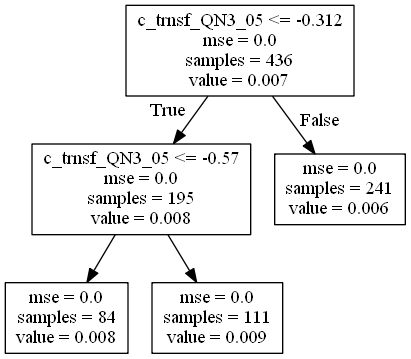

In [76]:
best = 3

#best_leaf_size = 12072

best_leaf_size = 50

clf = tree.DecisionTreeRegressor(max_depth=best, min_samples_leaf = best_leaf_size
                                 ,min_impurity_decrease = 0.0000001
                                  #,min_impurity_split = 0.25
                                 );
clf_fit = clf.fit(sm.add_constant(TRAIN_QN_QL['c_trnsf_QN3_05']),TRAIN_QN_QL['target'] );




#Графическое обоснование

dot_data = tree.export_graphviz(clf, out_file=None, 
feature_names=['tmp','c_trnsf_QN3_05'],
                         class_names=['0','1'])
                        # filled=True 
                        # rounded=True  
                        # special_characters=True 
graph = pydotplus.graph_from_dot_data(dot_data) 
#Выгрузка png
Image(graph.create_png())

<br\>

** Подготовка Group-скора для последующего объединения в интегральную модель **

In [45]:
merge_Group_TRAIN_core_QN = Group_TRAIN_core_QN        #[core_line] 
merge_Group_bad_part_core_QN = Group_bad_part_core_QN  #[core_line]

gr_final_models = [
    
    ['c_revenue_QN9_07', 'c_trnsf_QN9_06', 'c_trnsf_QN9_04']    
]

Group_TRAIN_core_QN['ln_target_gr'] = np.log(Group_TRAIN_core_QN['target']/(1-Group_TRAIN_core_QN['target']))

reg = LinearRegression()

finalized_models = []

for i in range(0,len(gr_final_models)):
    
    l_q = []
    
    model = gr_final_models[i]
    
    tmp_X = Group_TRAIN_core_QN[model]
    tmp_y = Group_TRAIN_core_QN['ln_target_gr']
    
    tmp_Xbad_part = Group_bad_part_core_QN[model]
    tmp_ybad_part = Group_bad_part_core_QN['def_flag']
    
    reg.fit(tmp_X,tmp_y)
    c = list(np.round(reg.coef_,4))
    
    tmp_y_trgt = Group_TRAIN_core_QN['target']
        
    pred = reg.predict(tmp_X)
    pred_bad_part = reg.predict(tmp_Xbad_part)
    
    merge_Group_TRAIN_core_QN.loc[:,'pred_gr'] = pred
    merge_Group_bad_part_core_QN.loc[:,'pred_gr'] = pred_bad_part
    
    m_gr = np.mean(pred)
    s_gr = np.std(pred)    
    
    print("\nMEAN: ",round(m_gr,6)," STD: ",round(s_gr,6))
    
    merge_Group_TRAIN_core_QN.loc[:,'score_gr'] = (pred - m_gr)/s_gr
    merge_Group_bad_part_core_QN.loc[:,'score_gr'] = (pred_bad_part - m_gr)/s_gr
    
    print('Group Score mean : ',np.mean(merge_Group_TRAIN_core_QN['score_gr']))
    
    pred_trgt = 1 / (1+np.exp(-pred))
        
    est3 = sm.OLS(tmp_y_trgt, sm.add_constant(pred_trgt)).fit()
    rsq_trgt = round(est3.rsquared,4)*100
        
    est2 = sm.OLS(tmp_y, sm.add_constant(tmp_X)).fit()
    rsq = round(est2.rsquared,4)*100
            
    interc = round(reg.intercept_,4)
    u = np.round(c/np.sum(c),3)*100
            
    sd = round(Somers_D(pred,tmp_y),4)*100
    sd_bad_part = round(Somers_D(pred_bad_part,tmp_ybad_part),4)*100
            
    pv = pd.DataFrame(est2.pvalues).reset_index()
    pv.columns = ['vara','p_val']
    pv_t = pv.transpose()
    
    nfctrs = len([x for x in c if x!= 0.0000])
            
    print(
         "\nModel: ", model
        ,"\nCoeff: ", list(np.round(reg.coef_,4))
        ,"\nIntercept: ", np.round(reg.intercept_,4),'\n'
        ,"\nSomers_D TRAIN + TEST: ", sd
        ,"\nSomers_D Bad part: ", sd_bad_part
        ,"\n\nBad part amount: ",len(tmp_ybad_part)," Bad part defs:",sum(tmp_ybad_part),'\n'
        ,"\n\nR-squared: ", rsq
        ,"\nR-squared real target: ", rsq_trgt
        ,"\nNumber of factors in the model: ", nfctrs,'\n')
    
    for j in range(0,len(model)):
        
        if (str(model[j])[:5] != 'c_WOE') & (str(model[j]) != 'tmp'):
            q = list(d.loc[d['name']==str(model[j])[-6:],'description'])[0]
            print('\nWeight ',u[j],' for ',str(model[j])[-6:],' - ',q)
            l_q.append([str(model[j])[-6:]+' - '+q,u[j]])
            
        if (str(model[j])[:5] == 'c_WOE')  & (str(model[j]) != 'tmp'):
            q = list(d.loc[d['name']==str(model[j])[6:],'description'])[0]
            print('\nWeight ',u[j],' for ',str(model[j])[6:],' - ',q)
            l_q.append([str(model[j])[6:]+' - '+q,u[j]])
            
    print(
         #"\nP_values: \n",round(est2.pvalues,4)
          "\n ------------------------------------------------------------------------------- \n")


MEAN:  -4.921875  STD:  0.246051
Group Score mean :  -3.1758783637113852e-15

Model:  ['c_revenue_QN9_07', 'c_trnsf_QN9_06', 'c_trnsf_QN9_04'] 
Coeff:  [-0.0185, -0.1574, -0.2422] 
Intercept:  -4.922 
 
Somers_D TRAIN + TEST:  56.230000000000004 
Somers_D Bad part:  18.77 

Bad part amount:  265  Bad part defs: 4.0 
 

R-squared:  34.74 
R-squared real target:  22.919999999999998 
Number of factors in the model:  3 


Weight  4.3999999999999995  for  QN9_07  -  Cash_/_Current_Assets

Weight  37.6  for  QN9_06  -  Net_debt_/_Current_Assets

Weight  57.9  for  QN9_04  -  Equity_/_Assets

 ------------------------------------------------------------------------------- 



<br\>

** Интеграция Group-скора и StandAlone-скора посредством взвешивания** 
- Перебор весов от 0 до 100%
- В случае, когда групповой скор не применим для интегрального скора дублируется StandAlone-скор

In [46]:
#
#################### Merging
#

TRAIN_StandAlone_Group = pd.merge(merge_TRAIN_core_QN_QL,merge_Group_TRAIN_core_QN,how='left',on=core_line)
TEST_StandAlone_Group = pd.merge(merge_TEST_core_QN_QL,merge_Group_TRAIN_core_QN,how='left',on=core_line)
Bad_part_StandAlone_Group = pd.merge(merge_Bad_part_core_QN_QL,merge_Group_bad_part_core_QN,how='left',on=core_line)

print('\n Bad part without groups :',Bad_part_StandAlone_Group['score_gr'].isnull().sum())
print('\n Bad part with groups :',Bad_part_StandAlone_Group['score_gr'].notnull().sum())

print('\n Bad part without groups :',sum(Bad_part_StandAlone_Group['isGroup']=='nonGroup'))
print('\n Bad part with groups :',sum(Bad_part_StandAlone_Group['isGroup']=='Group'))


#
################### Weighting
#

TRAIN_StandAlone_Group_gr = TRAIN_StandAlone_Group[TRAIN_StandAlone_Group['isGroup']=='Group']
TRAIN_StandAlone_Group_gr.reset_index(drop=True,inplace=True)

#
################### Regression
#

reg = LinearRegression()

reg.fit(TRAIN_StandAlone_Group_gr[['score_gr','score']], TRAIN_StandAlone_Group_gr['ln_target'])

c = list(np.round(reg.coef_,4))
u = np.round(c/np.sum(c),3)*100

b = np.round(reg.intercept_,4)
print( 'Coeff: ',c
      ,'Weights: ',u
      ,'Intercept: ',b)

w = 61.3
t = (1-w/100)*TRAIN_StandAlone_Group_gr['score'] + (w/100)*TRAIN_StandAlone_Group_gr['score_gr']
sd_w = round(Somers_D(t,TRAIN_StandAlone_Group_gr['target']),4)*100
pred_gr = reg.predict(TRAIN_StandAlone_Group_gr[['score_gr','score']])
#print(pred_gr)
pred_gr_self = 0.2334*TRAIN_StandAlone_Group_gr['score_gr']+  0.1472*TRAIN_StandAlone_Group_gr['score'] - 4.996
#print(pred_gr_self)
print('\nWeight of Group :',w, ' Somers_D :',sd_w)

est = sm.OLS(TRAIN_StandAlone_Group_gr['ln_target'], sm.add_constant(pred_gr))
est2 = est.fit()
print('\n','r_sqared: ',round(est2.rsquared,4))

#
################### Calculation
#

for w in range(0,101):
    
    t = (1-w/100)*TRAIN_StandAlone_Group_gr['score'] + (w/100)*TRAIN_StandAlone_Group_gr['score_gr']
    
    sd_w = round(Somers_D(t,TRAIN_StandAlone_Group_gr['target']),4)*100
    
    print('\nWeight of Group :',w, ' Somers_D :',sd_w)


 Bad part without groups : 466

 Bad part with groups : 265

 Bad part without groups : 466

 Bad part with groups : 265
Coeff:  [0.2334, 0.1472] Weights:  [61.3 38.7] Intercept:  -4.996

Weight of Group : 61.3  Somers_D : 54.39000000000001

 r_sqared:  0.3841

Weight of Group : 0  Somers_D : 30.65

Weight of Group : 1  Somers_D : 31.28

Weight of Group : 2  Somers_D : 31.59

Weight of Group : 3  Somers_D : 32.01

Weight of Group : 4  Somers_D : 32.53

Weight of Group : 5  Somers_D : 32.74

Weight of Group : 6  Somers_D : 33.37

Weight of Group : 7  Somers_D : 33.89

Weight of Group : 8  Somers_D : 35.15

Weight of Group : 9  Somers_D : 35.36

Weight of Group : 10  Somers_D : 36.61

Weight of Group : 11  Somers_D : 37.76

Weight of Group : 12  Somers_D : 38.6

Weight of Group : 13  Somers_D : 39.64

Weight of Group : 14  Somers_D : 40.27

Weight of Group : 15  Somers_D : 41.42

Weight of Group : 16  Somers_D : 42.57

Weight of Group : 17  Somers_D : 43.93

Weight of Group : 18  Somers

In [47]:
w = 0.35

#TRAIN
TRAIN_StandAlone_Group.loc[TRAIN_StandAlone_Group['isGroup']=='nonGroup','score_gg'] = TRAIN_StandAlone_Group['score']
TRAIN_StandAlone_Group.loc[TRAIN_StandAlone_Group['isGroup']=='Group','score_gg'] = (
    TRAIN_StandAlone_Group['score']*(1-w) + TRAIN_StandAlone_Group['score_gr']*w
)


#TEST
TEST_StandAlone_Group.loc[TEST_StandAlone_Group['isGroup']=='nonGroup','score_gg'] = TEST_StandAlone_Group['score']
TEST_StandAlone_Group.loc[TEST_StandAlone_Group['isGroup']=='Group','score_gg'] = (
    TEST_StandAlone_Group['score']*(1-w) + TEST_StandAlone_Group['score_gr']*w
)


#Bad Part
Bad_part_StandAlone_Group.loc[Bad_part_StandAlone_Group['isGroup']=='nonGroup','score_gg'] = Bad_part_StandAlone_Group['score']
Bad_part_StandAlone_Group.loc[Bad_part_StandAlone_Group['isGroup']=='Group','score_gg'] = (
    Bad_part_StandAlone_Group['score']*(1-w) + Bad_part_StandAlone_Group['score_gr']*w
)

print('\nSomers_D TRAIN before Group Adjustment :',round(Somers_D(TRAIN_StandAlone_Group['score'],TRAIN_StandAlone_Group['target']),4)*100)
print('\nSomers_D TRAIN after Group Adjustment :',round(Somers_D(TRAIN_StandAlone_Group['score_gg'],TRAIN_StandAlone_Group['target']),4)*100)

indx_relevant_observations_trn = TRAIN_StandAlone_Group['request_date'] <= pd.to_datetime('15-06-2018',format="%d-%m-%Y")

print('\n--------------------------------------------------------------\n')

print('\nSomers_D TEST before Group Adjustment :',round(Somers_D(TEST_StandAlone_Group['score'],TEST_StandAlone_Group['target']),4)*100)
print('\nSomers_D TEST after Group Adjustment :',round(Somers_D(TEST_StandAlone_Group['score_gg'],TEST_StandAlone_Group['target']),4)*100)

print('\n--------------------------------------------------------------\n')

indx_relevant_observations = Bad_part_StandAlone_Group['request_date'] <= pd.to_datetime('15-06-2018',format="%d-%m-%Y")

print('\nSomers_D Bad part before Group Adjustment :',round(Somers_D(Bad_part_StandAlone_Group[indx_relevant_observations]['score'],Bad_part_StandAlone_Group[indx_relevant_observations]['def_flag']),4)*100)
print('\nSomers_D Bad part after Group Adjustment :',round(Somers_D(Bad_part_StandAlone_Group[indx_relevant_observations]['score_gg'],Bad_part_StandAlone_Group[indx_relevant_observations]['def_flag']),4)*100)


Somers_D TRAIN before Group Adjustment : 56.599999999999994

Somers_D TRAIN after Group Adjustment : 58.79

--------------------------------------------------------------


Somers_D TEST before Group Adjustment : 52.0

Somers_D TEST after Group Adjustment : 52.839999999999996

--------------------------------------------------------------


Somers_D Bad part before Group Adjustment : 55.559999999999995

Somers_D Bad part after Group Adjustment : 57.550000000000004


In [179]:
l_variation = []

for yer in [x for x in list(np.unique(TRAIN_StandAlone_Group['y'])) if x!=2018.0]:
    
    if divmod(yer,2)[1]==0:
        
        X_y_yer = TRAIN_StandAlone_Group[['score_gg','target']][(TRAIN_StandAlone_Group['y']==yer) | (TRAIN_StandAlone_Group['y']==yer+1)]
        X_yer = X_y_yer['score_gg'][:,None]
        y_yer = X_y_yer['target']
                
        g_yer = Somers_D(X_yer,y_yer)
                
        print('\nY: ',yer,'-',yer+1,' SomersD: ',round(g_yer,4),'  count: ',len(y_yer))
        
        print('\n QN1_04: ',float(np.mean(TRAIN[['QN1_04']][(TRAIN['y']==yer) | (TRAIN['y']==yer+1)])))
        print('\n c_trnsf_QN1_04: ',float(np.mean(TRAIN_QN_QL[['c_trnsf_QN1_04']][(TRAIN_QN_QL['y']==yer) | (TRAIN_QN_QL['y']==yer+1)])))
            
        l_variation.append(g_yer)
            
i_variation = round(abs(np.std(l_variation)/np.mean(l_variation)),4)*100

print('\nVariation for final PD model: ',i_variation)

print('\nTEST: \n')
l_variation = []

for yer in [x for x in list(np.unique(TRAIN_StandAlone_Group['y'])) if x!=2018.0]:
    
    if divmod(yer,2)[1]==0:
        
        X_y_yer = TEST_StandAlone_Group[['score_gg','target']][(TEST_StandAlone_Group['y']==yer) | (TEST_StandAlone_Group['y']==yer+1)]
        X_yer = X_y_yer['score_gg'][:,None]
        y_yer = X_y_yer['target']
                
        g_yer = Somers_D(X_yer,y_yer)
        l_variation.append(g_yer)
                
        print('\nY: ',yer,'-',yer+1,' SomersD: ',round(g_yer,4),'  count: ',len(y_yer))
            
        
            
i_variation = round(abs(np.std(l_variation)/np.mean(l_variation)),4)*100

print('\nVariation for final PD model TEST: ',i_variation)



Y:  2012.0 - 2013.0  SomersD:  0.4948   count:  86

 QN1_04:  19.425382637201132

 c_trnsf_QN1_04:  0.2305555489740069

Y:  2014.0 - 2015.0  SomersD:  0.5703   count:  125

 QN1_04:  19.694844414304402

 c_trnsf_QN1_04:  0.4601069697047219

Y:  2016.0 - 2017.0  SomersD:  0.6336   count:  152

 QN1_04:  20.028875518632137

 c_trnsf_QN1_04:  0.8052981621399469

Variation for final PD model:  10.02

TEST: 


Y:  2012.0 - 2013.0  SomersD:  0.643   count:  39

Y:  2014.0 - 2015.0  SomersD:  0.5277   count:  62

Y:  2016.0 - 2017.0  SomersD:  0.5681   count:  73

Variation for final PD model TEST:  8.24


In [185]:
l_variation = []

for yer in [x for x in list(np.unique(TRAIN_StandAlone_Group['y'])) if x!=2018.0]:
    
    if (divmod(yer,2)[1]==0) | (divmod(yer,2)[1]==1):
        
        X_y_yer = TRAIN_StandAlone_Group[['score_gg','target']][(TRAIN_StandAlone_Group['y']==yer)]
        X_yer = X_y_yer['score_gg'][:,None]
        y_yer = X_y_yer['target']
                
        g_yer = Somers_D(X_yer,y_yer)
                
        print('\nY: ',yer,' SomersD: ',round(g_yer,4),'  count: ',len(y_yer))
            
        l_variation.append(g_yer)
            
i_variation = round(abs(np.std(l_variation)/np.mean(l_variation)),4)*100

print('\nVariation for final PD model: ',i_variation)

print('\nTEST: \n')
l_variation = []

for yer in [x for x in list(np.unique(TRAIN_StandAlone_Group['y'])) if x!=2018.0]:
    
    if (divmod(yer,2)[1]==0) | (divmod(yer,2)[1]==1):
        
        X_y_yer = TEST_StandAlone_Group[['score_gg','target']][(TEST_StandAlone_Group['y']==yer)]
        X_yer = X_y_yer['score_gg'][:,None]
        y_yer = X_y_yer['target']
                
        g_yer = Somers_D(X_yer,y_yer)
        l_variation.append(g_yer)
                
        print('\nY: ',yer,' SomersD: ',round(g_yer,4),'  count: ',len(y_yer))
            
        
            
i_variation = round(abs(np.std(l_variation)/np.mean(l_variation)),4)*100

print('\nVariation for final PD model TEST: ',i_variation)


print('\nUNION: \n')
l_variation = []

for yer in [x for x in list(np.unique(TRAIN_StandAlone_Group['y'])) if x!=2018.0]:
    
    if (divmod(yer,2)[1]==0) | (divmod(yer,2)[1]==1):
        
        ttt = TRAIN_StandAlone_Group[['score_gg','target','y']].append(TEST_StandAlone_Group[['score_gg','target','y']])
        
        X_y_yer = ttt[['score_gg','target']][(ttt['y']==yer)]
        X_yer = X_y_yer['score_gg'][:,None]
        y_yer = X_y_yer['target']
                
        g_yer = Somers_D(X_yer,y_yer)
        l_variation.append(g_yer)
                
        print('\nY: ',yer,' SomersD: ',round(g_yer,4),'  count: ',len(y_yer))
            
        
            
i_variation = round(abs(np.std(l_variation)/np.mean(l_variation)),4)*100

print('\nVariation for final PD model TEST: ',i_variation)



Y:  2012.0  SomersD:  0.4749   count:  29

Y:  2013.0  SomersD:  0.4753   count:  57

Y:  2014.0  SomersD:  0.5367   count:  55

Y:  2015.0  SomersD:  0.6213   count:  70

Y:  2016.0  SomersD:  0.7285   count:  70

Y:  2017.0  SomersD:  0.5555   count:  82

Variation for final PD model:  15.65

TEST: 


Y:  2012.0  SomersD:  0.6964   count:  16

Y:  2013.0  SomersD:  0.5678   count:  23

Y:  2014.0  SomersD:  0.581   count:  30

Y:  2015.0  SomersD:  0.5153   count:  32

Y:  2016.0  SomersD:  0.461   count:  36

Y:  2017.0  SomersD:  0.6563   count:  37

Variation for final PD model TEST:  13.71

UNION: 


Y:  2012.0  SomersD:  0.5491   count:  45

Y:  2013.0  SomersD:  0.522   count:  80

Y:  2014.0  SomersD:  0.545   count:  85

Y:  2015.0  SomersD:  0.5877   count:  102

Y:  2016.0  SomersD:  0.6509   count:  106

Y:  2017.0  SomersD:  0.5835   count:  119

Variation for final PD model TEST:  7.249999999999999


<br\>

Тренды в показателях

In [93]:
for yer in list(np.unique(TRAIN_StandAlone_Group['y'])):
    
    print(yer,' _ ',round(float(np.mean(TRAIN[['QN1_04']][(TRAIN['y']==yer)])),4))
    
print('\n\n')
    
for yer in list(np.unique(TRAIN_StandAlone_Group['y'])):
    
    print(yer,' _ ',round(float(np.mean(TRAIN_QN_QL[['trnsf_QN1_04']][(TRAIN_QN_QL['y']==yer)])),4))
    


2012.0  _  19.2878
2013.0  _  19.4954
2014.0  _  19.5359
2015.0  _  19.8197
2016.0  _  20.0708
2017.0  _  19.9931
2018.0  _  20.2961



2012.0  _  0.3894
2013.0  _  0.4515
2014.0  _  0.4477
2015.0  _  0.5401
2016.0  _  0.6176
2017.0  _  0.5906
2018.0  _  0.6337


<br\>
## Calibration<a name=clbr></a>

Group Impact was implemented ... .

[Content](#cont)

<br\>

** Финальынй расчет PD и рейтингов без учёта поддержки государства **

In [48]:
TRAIN_StandAlone_Group['ln_target'] = np.log(TRAIN_StandAlone_Group['target']/(1-TRAIN_StandAlone_Group['target']))
TEST_StandAlone_Group['ln_target'] = np.log(TEST_StandAlone_Group['target']/(1-TEST_StandAlone_Group['target']))

reg = LinearRegression()

reg.fit(sm.add_constant(TRAIN_StandAlone_Group['score_gg']), TRAIN_StandAlone_Group['ln_target'])

a = np.round(reg.coef_,4)[1]
b = np.round(reg.intercept_,4)
print('Multiplicator: ',a)
print('Intercept: ',b)

pred_gg = reg.predict(sm.add_constant(TRAIN_StandAlone_Group['score_gg']))
pd_gg = 1 / (1+np.exp(-pred_gg))


TRAIN_StandAlone_Group.loc[:,'PDgg'] = 1/(1+np.exp(-a*TRAIN_StandAlone_Group['score_gg']-b))
TEST_StandAlone_Group.loc[:,'PDgg'] = 1/(1+np.exp(-a*TEST_StandAlone_Group['score_gg']-b))

TRAIN_StandAlone_Group['ln_PDgg'] = np.log(TRAIN_StandAlone_Group['PDgg']/(1-TRAIN_StandAlone_Group['PDgg']))
TEST_StandAlone_Group['ln_PDgg'] = np.log(TEST_StandAlone_Group['PDgg']/(1-TEST_StandAlone_Group['PDgg']))

a_mult = a

print('\nSomers_D TEST PDgg:',round(Somers_D(TEST_StandAlone_Group['PDgg'],TEST_StandAlone_Group['target']),4)*100)

print('\nDR на выборке без внешних рейтингов: '
      ,round(sum(Bad_part_StandAlone_Group['def_flag']/Bad_part_StandAlone_Group['def_flag'].shape[0]),4))

print('\nR squared PDs TRAIN: ',round(R_squared(TRAIN_StandAlone_Group['PDgg'],TRAIN_StandAlone_Group['target']),4)*100)
print('\nR squared PDs TEST: ',round(R_squared(TEST_StandAlone_Group['PDgg'],TEST_StandAlone_Group['target']),4)*100)

print('\nR squared TRAIN : ',round(R_squared(TRAIN_StandAlone_Group['ln_PDgg'],TRAIN_StandAlone_Group['ln_target']),4)*100)
print('\nR squared TEST : ',round(R_squared(TEST_StandAlone_Group['ln_PDgg'],TEST_StandAlone_Group['ln_target']),4)*100)

tmp_xgen = TRAIN_StandAlone_Group['PDgg'].append(TEST_StandAlone_Group['PDgg'])
tmp_ygen = TRAIN_StandAlone_Group['target'].append(TEST_StandAlone_Group['target'])

print('\nR squared General : ',round(R_squared(tmp_xgen,tmp_ygen),4)*100)

Multiplicator:  0.502
Intercept:  -5.2142

Somers_D TEST PDgg: 52.839999999999996

DR на выборке без внешних рейтингов:  0.0246

R squared PDs TRAIN:  39.57

R squared PDs TEST:  43.37

R squared TRAIN :  53.63

R squared TEST :  45.92

R squared General :  40.71


Multiplicator:  0.502
Intercept:  -5.2142

Somers_D TEST PDgg: 55.50000000000001

DR на выборке без внешних рейтингов:  0.0246

R squared PDs TRAIN:  39.57

R squared PDs TEST:  29.45

R squared TRAIN :  53.63

R squared TEST :  48.65

R squared General :  34.54


In [60]:
TEST_StandAlone_Group['delta_trgt'] = abs(round(TEST_StandAlone_Group['target'] - TEST_StandAlone_Group['PDgg'],6))
print(TEST_StandAlone_Group[['RATING_IDENTIFIER','delta_trgt']].sort_values(['delta_trgt'],ascending=False))

    RATING_IDENTIFIER  delta_trgt
140         1-1AHAS72    0.037556
141         1-1Q2MN0B    0.037312
139          1-N4J8J6    0.030505
194         1-JKY3TDP    0.022009
10          1-1OBAOUS    0.021256
14          1-2KDHOIL    0.021172
12          1-21629R8    0.021049
13          1-2DIANV7    0.021002
11          1-1W1XMP8    0.020968
57          1-1PV3NUA    0.010075
78          1-LV118H9    0.009512
79          1-OXILG6H    0.008971
58          1-4FJTO7W    0.008343
56          1-1C2IU3K    0.007842
162         1-76GVEWZ    0.007531
186         1-SMZT72V    0.007124
75          1-7K41BPM    0.007052
117          1-RZQ0SP    0.006648
74          1-26SBWOM    0.006601
23          1-3HQWQDE    0.006566
193         1-H4WKIE6    0.006428
22          1-25PV53B    0.006402
21          1-1RBZBFQ    0.006130
183         1-1V5WJ53    0.006018
43           1-YAGGC8    0.005985
47          1-GPN8MWB    0.005977
80          1-73SESS3    0.005919
46          1-D9JFEDH    0.005810
61          1-

In [63]:
TRAIN_StandAlone_Group['delta_trgt'] = abs(round(TRAIN_StandAlone_Group['target'] - TRAIN_StandAlone_Group['PDgg'],6))
print(TRAIN_StandAlone_Group[['RATING_IDENTIFIER','delta_trgt']].sort_values(['delta_trgt'],ascending=False))

    RATING_IDENTIFIER  delta_trgt
297          1-R9TAX9    0.034182
26          1-1QBTHI1    0.021227
257         1-2A0A0SG    0.010893
183         1-SQUE5JA    0.010357
145         1-1ZI7GBF    0.009918
182         1-PR6D0CI    0.009715
146         1-20O0H46    0.009337
333         1-F2TVC2M    0.009006
55          1-BD1KU97    0.008876
57          1-H0JTIJC    0.008780
56          1-G9D8V3R    0.008675
147         1-2E1RXD1    0.008528
144          1-X347IH    0.008505
334         1-HALGQ8W    0.008459
175         1-31MRO0M    0.008346
176         1-49RNWAU    0.008185
143          1-R2V47P    0.008114
332         1-DIDS2YE    0.007941
397         1-PCRPV60    0.007865
162         1-2JWAO88    0.007770
159         1-1PZI00F    0.007636
181         1-IQO39K8    0.007329
50          1-4HZIAJJ    0.007174
52          1-78G2ZYY    0.007142
185         1-3FDFN8G    0.007120
184         1-21UJR2Q    0.007099
51          1-5WLQ7K1    0.006856
53          1-A3FSEGC    0.006791
48          1-

In [59]:
tmp_trn = TRAIN_StandAlone_Group[-TRAIN_StandAlone_Group['RATING_IDENTIFIER'].isin(['1-R9TAX9'])][['PDgg','target']]
print(tmp_trn.shape[0])
print('\nR squared TRAIN : ',round(R_squared(tmp_trn['PDgg'],tmp_trn['target']),4)*100)
print('\nSomers D TRAIN : ',round(Somers_D(tmp_trn['PDgg'],tmp_trn['target']),4)*100)

tmp_tst = TEST_StandAlone_Group[-((TEST_StandAlone_Group['RATING_IDENTIFIER'].isin(['1-1AHAS72','1-1Q2MN0B','1-N4J8J6'])) 
                                | (TEST_StandAlone_Group['ORG_GROUP_ID'] == '1-1LINV'))][['PDgg','target']]

print('\nR squared TEST : ',round(R_squared(tmp_tst['PDgg'],tmp_tst['target']),4)*100)
print('\nSomers D TEST : ',round(Somers_D(tmp_tst['PDgg'],tmp_tst['target']),4)*100)

tmp_gen = tmp_trn.append(tmp_tst)
print(tmp_gen.shape[0])
print('\nR squared GENERAL : ',round(R_squared(tmp_gen['PDgg'],tmp_gen['target']),4)*100)
print('\nSomers D GENERAL : ',round(Somers_D(tmp_gen['PDgg'],tmp_gen['target']),4)*100)

417

R squared TRAIN :  42.71

Somers D TRAIN :  58.67

R squared TEST :  43.37

Somers D TEST :  52.839999999999996
609

R squared GENERAL :  42.94

Somers D GENERAL :  56.89999999999999


In [82]:
tmp_trn = TRAIN_StandAlone_Group[TRAIN_StandAlone_Group['y'].isin([2017])][['PDgg','target']]
print(tmp_trn.shape[0])
print('\nR squared TRAIN : ',round(R_squared(tmp_trn['PDgg'],tmp_trn['target']),4)*100)
print('\nSomers D TRAIN : ',round(Somers_D(tmp_trn['PDgg'],tmp_trn['target']),4)*100)

tmp_tst = TEST_StandAlone_Group[TEST_StandAlone_Group['y'].isin([2017]) & (TEST_StandAlone_Group['RATING_IDENTIFIER']!='1-JKY3TDP')][['PDgg','target']]
print(tmp_tst.shape[0])
print('\nR squared TEST : ',round(R_squared(tmp_tst['PDgg'],tmp_tst['target']),4)*100)
print('\nSomers D TEST : ',round(Somers_D(tmp_tst['PDgg'],tmp_tst['target']),4)*100)

tmp_gen = tmp_trn.append(tmp_tst)
print(tmp_gen.shape[0])
print('\nR squared GENERAL : ',round(R_squared(tmp_gen['PDgg'],tmp_gen['target']),4)*100)
print('\nSomers D GENERAL : ',round(Somers_D(tmp_gen['PDgg'],tmp_gen['target']),4)*100)

82

R squared TRAIN :  54.08

Somers D TRAIN :  55.55
37

R squared TEST :  34.79

Somers D TEST :  65.63
119

R squared GENERAL :  45.96

Somers D GENERAL :  58.35


In [62]:
TEST_StandAlone_Group[TEST_StandAlone_Group['RATING_IDENTIFIER'].isin(['1-1AHAS72','1-1Q2MN0B','1-N4J8J6','1-JKY3TDP'])]

,inn,ORG_GROUP_ID,NAME,BUSINESS_SEGMENT,SBRF_INDUSTRY,GROUP_ID_CRM,GROUP_NAME_CRM,RATING_IDENTIFIER,REPORT_DATE,request_date,...,ln_PDgg,Rating_GG,Rating_Agencies,PD_mapback_FIN_RATING_NUM,Rating_WS,PD_mapback_GG,PD_mapback_WS,PD_mapback_GG_RWA,delta_Ratings,delta_trgt
139,6.320002e+09,1-I4O8,АВТОВАЗ,Крупнейшие,Прочее,1-O8T951,АВТОВАЗ,1-N4J8J6,2011-10-01,2012-03-26,...,-4.215885,13.0,17.0,0.01725,13.0,0.01253,0.01253,0.012627,4.0,0.030505
140,6.320002e+09,1-I4O8,АВТОВАЗ,Крупнейшие,Прочее,1-O8T951,АВТОВАЗ,1-1AHAS72,2012-10-01,2012-12-14,...,-4.886106,11.0,17.0,0.01725,11.0,0.00660,0.00660,0.006554,6.0,0.037556
141,6.320002e+09,1-I4O8,АВТОВАЗ,Крупнейшие,Прочее,1-O8T951,АВТОВАЗ,1-1Q2MN0B,2013-01-01,2013-05-29,...,-4.853831,11.0,17.0,0.01253,11.0,0.00660,0.00660,0.006554,6.0,0.037312
194,7.702080e+09,1-MIKJ,"СИЛОВЫЕ МАШИНЫ - ЗТЛ, ЛМЗ, ЭЛЕКТРОСИЛА, ЭНЕРГО...",Крупнейшие,Машиностроение,1-1N8SOM9,Силовые машины,1-JKY3TDP,2017-07-01,2017-10-06,...,-4.526690,13.0,16.0,0.02375,13.0,0.01253,0.01253,0.012627,3.0,0.022009


In [78]:
TRAIN_StandAlone_Group[TRAIN_StandAlone_Group['NAME'] == 'АВТОВАЗ']

,inn,ORG_GROUP_ID,NAME,BUSINESS_SEGMENT,SBRF_INDUSTRY,GROUP_ID_CRM,GROUP_NAME_CRM,RATING_IDENTIFIER,REPORT_DATE,request_date,...,ln_PDgg,Rating_GG,Rating_Agencies,PD_mapback_FIN_RATING_NUM,Rating_WS,PD_mapback_GG,PD_mapback_WS,PD_mapback_GG_RWA,delta_Ratings,delta_trgt
297,6.320002e+09,1-I4O8,АВТОВАЗ,Крупнейшие,Прочее,1-O8T951,АВТОВАЗ,1-R9TAX9,2012-04-01,2012-06-04,...,-4.510991,13.0,17.0,0.01253,13.0,0.01253,0.01253,0.012627,4.0,0.034182


<br\>

Взвешивание на уровень CT = 1.70%

In [128]:
from scipy import optimize

Bad_part_StandAlone_Group_opt = Bad_part_StandAlone_Group[indx_relevant_observations][['score_gg','def_flag','ws10','ws11','ws12']]
Bad_part_StandAlone_Group_opt.loc[:,'Sample'] = 'Bad_part'
TRAIN_StandAlone_Group_opt = TRAIN_StandAlone_Group[indx_relevant_observations_trn][['score_gg','def_flag','ws10','ws11','ws12']]
TRAIN_StandAlone_Group_opt.loc[:,'Sample'] = 'TRAIN'

TRAIN_and_Bad_part_StandAlone_Group_opt = Bad_part_StandAlone_Group_opt.append(TRAIN_StandAlone_Group_opt,ignore_index=True)

print('Amount of observations in calibration sample: ',TRAIN_and_Bad_part_StandAlone_Group_opt.shape[0])


TRAIN_and_Bad_part_StandAlone_Group_opt[['score_gg','def_flag','ws10','ws11']].to_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Data\\b9___Bad_part_StandAlone_Group_opt.csv",sep=';')

def CT_Weighting(x):
    
    TRAIN_and_Bad_part_opt = pd.read_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Data\\b9___Bad_part_StandAlone_Group_opt.csv",delimiter=';',skipinitialspace=True)
    
    TRAIN_and_Bad_part_opt.loc[:,'w'] = 1.0    
    TRAIN_and_Bad_part_opt.loc[TRAIN_and_Bad_part_opt['def_flag']==1,'w'] = x
    
    TRAIN_and_Bad_part_opt['default_w'] = TRAIN_and_Bad_part_opt['w']*TRAIN_and_Bad_part_opt['def_flag']
    
    s1 = sum(TRAIN_and_Bad_part_opt['default_w'])
    s2 = sum(TRAIN_and_Bad_part_opt['w'])
    s = s1/s2   
    
    err = (s - 0.0170)**2  
    
    return err;

res = optimize.minimize(CT_Weighting, (1.0), method = 'COBYLA')

w = np.round(res.x,3)

print('\nWeight for Bad part According Optimization procedure : ', w)

TRAIN_and_Bad_part_StandAlone_Group_opt['w'] = 1.0
TRAIN_and_Bad_part_StandAlone_Group_opt.loc[TRAIN_and_Bad_part_StandAlone_Group_opt['def_flag']==1,'w'] = w


print('\nDefault Rate Weighted: ',sum(TRAIN_and_Bad_part_StandAlone_Group_opt['w']*TRAIN_and_Bad_part_StandAlone_Group_opt['def_flag'])/sum(TRAIN_and_Bad_part_StandAlone_Group_opt['w']))

CT = 0.0170
w1 = (CT/(1-CT))*(sum(TRAIN_and_Bad_part_StandAlone_Group_opt['def_flag']==0)/sum(TRAIN_and_Bad_part_StandAlone_Group_opt['def_flag']==1))
print('\nWeight direct calculation: ',w1)

Amount of observations in calibration sample:  1063

Weight for Bad part According Optimization procedure :  1.004

Default Rate Weighted:  0.016999789289906985

Weight direct calculation:  1.0040126596586414


<br\>

Finding Calibration Parameters

In [129]:
MS_PD = [ 0.00020, 0.00037, 0.00051, 0.00070, 0.00097, 0.00133, 0.00184, 0.00253, 0.00348, 0.00480, 0.00660
         ,0.00910, 0.01253, 0.01725, 0.02375, 0.03271, 0.04505, 0.06204, 0.08543, 0.11765, 0.16203, 0.22313
         ,0.30728, 0.42316, 0.58275, 1]

MS_LB = [ 0.00000, 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563
         ,0.00775, 0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014
         ,0.26185, 0.36059, 0.49659, 1]

MS_UB = [ 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563, 0.00775
         ,0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014, 0.26185
         ,0.36059, 0.49659, 1, 1]


for i in range(0,40):
    print('\n N : ',i,'   t :',datetime.datetime.now(),'\n')
    
    for j in range(0,300):
        
        a_x = 0.85 + (0.01*i)        
        b_x = -4.300 - (0.003*j)         
        
        TRAIN_and_Bad_part_StandAlone_Group_opt.loc[:,'PDgg'] = 0.0
        TRAIN_and_Bad_part_StandAlone_Group_opt.loc[:,'PDgg'] = 1/(1+np.exp(-a_x*TRAIN_and_Bad_part_StandAlone_Group_opt['score_gg']-b_x))
        
        for jj in range(0,26) :
            
            indx1 = TRAIN_and_Bad_part_StandAlone_Group_opt['PDgg'] >  MS_LB[jj]
            indx2 = TRAIN_and_Bad_part_StandAlone_Group_opt['PDgg'] <= MS_UB[jj]
            
            TRAIN_and_Bad_part_StandAlone_Group_opt.loc[indx1 & indx2,'Rating_GG'] = jj+1
            
        TRAIN_and_Bad_part_StandAlone_Group_opt.loc[:,'Rating_WS'] = TRAIN_and_Bad_part_StandAlone_Group_opt['Rating_GG']
        
        TRAIN_and_Bad_part_StandAlone_Group_opt.loc[ TRAIN_and_Bad_part_StandAlone_Group_opt['ws11']=='y','Rating_WS'] = (
            TRAIN_and_Bad_part_StandAlone_Group_opt['Rating_WS'] + 2
        )
        
        TRAIN_and_Bad_part_StandAlone_Group_opt.loc[(TRAIN_and_Bad_part_StandAlone_Group_opt['ws10']=='y')
                                          &  (TRAIN_and_Bad_part_StandAlone_Group_opt['ws11']=='n') ,'Rating_WS'] = (
            TRAIN_and_Bad_part_StandAlone_Group_opt['Rating_WS'] + 1
        )
           
        for jj in range(0,26) :
            
            indx3 = TRAIN_and_Bad_part_StandAlone_Group_opt['Rating_WS'] == jj+1           
            TRAIN_and_Bad_part_StandAlone_Group_opt.loc[indx3,'PDws_mpbck'] = MS_PD[jj]
            
        m_x = np.mean(TRAIN_and_Bad_part_StandAlone_Group_opt['PDws_mpbck']*TRAIN_and_Bad_part_StandAlone_Group_opt['w'])
        mm = np.min(TRAIN_and_Bad_part_StandAlone_Group_opt[  (TRAIN_and_Bad_part_StandAlone_Group_opt['Sample']=='Bad_part')
                                                            | (TRAIN_and_Bad_part_StandAlone_Group_opt['Sample']=='TRAIN')]['PDws_mpbck'])
        
        TRAIN_and_Bad_part_StandAlone_Group_opt.loc[:,'delta'] = (
            (( TRAIN_and_Bad_part_StandAlone_Group_opt['PDws_mpbck'] - TRAIN_and_Bad_part_StandAlone_Group_opt['def_flag'])
              *TRAIN_and_Bad_part_StandAlone_Group_opt['w'])**2
        )
        
        mse = np.mean(TRAIN_and_Bad_part_StandAlone_Group_opt['delta'])
        
        if ((mm < 0.00156) & (mm > 0.00114)) and (round(m_x,4) == 0.0170 ) :
            
            print('a : ',a_x
                 ,'\nb : ',b_x
                 ,'\nMSE: ',round(mse,6)
                 ,'\nMin : ',round(mm,6)
                 ,'\n--------------------------------------------------\n\n')


 N :  0    t : 2019-07-16 20:13:38.219816 


 N :  1    t : 2019-07-16 20:14:11.649816 


 N :  2    t : 2019-07-16 20:14:44.686016 

a :  0.87 
b :  -4.678 
MSE:  0.016192 
Min :  0.00133 
--------------------------------------------------


a :  0.87 
b :  -4.681 
MSE:  0.01619 
Min :  0.00133 
--------------------------------------------------


a :  0.87 
b :  -4.684 
MSE:  0.01619 
Min :  0.00133 
--------------------------------------------------



 N :  3    t : 2019-07-16 20:15:17.682616 

a :  0.88 
b :  -4.686999999999999 
MSE:  0.016197 
Min :  0.00133 
--------------------------------------------------


a :  0.88 
b :  -4.6899999999999995 
MSE:  0.016195 
Min :  0.00133 
--------------------------------------------------



 N :  4    t : 2019-07-16 20:15:50.749816 

a :  0.89 
b :  -4.699 
MSE:  0.016197 
Min :  0.00133 
--------------------------------------------------


a :  0.89 
b :  -4.702 
MSE:  0.016195 
Min :  0.00133 
------------------------------------------

KeyboardInterrupt: 

<br\>

Weighted Logistic Regression

In [102]:

opt_reg = LogisticRegression()
opt_reg.fit(sm.add_constant(TRAIN_and_Bad_part_StandAlone_Group_opt['score_gg']),TRAIN_and_Bad_part_StandAlone_Group_opt['def_flag']
           ,sample_weight=TRAIN_and_Bad_part_StandAlone_Group_opt['w']
           )

a1 = np.round(opt_reg.coef_,4)[0][1]
b1 = np.round(opt_reg.intercept_,4)
print('\nMultiplicator: ',a1)
print('\nIntercept: ',b1)

pred = opt_reg.predict_proba(sm.add_constant(TRAIN_and_Bad_part_StandAlone_Group_opt['score_gg']))[:,1]
TRAIN_and_Bad_part_StandAlone_Group_opt.loc[:,'logreg_pd'] = pred

print(
    sum(TRAIN_and_Bad_part_StandAlone_Group_opt['logreg_pd']*TRAIN_and_Bad_part_StandAlone_Group_opt['w'])/sum(TRAIN_and_Bad_part_StandAlone_Group_opt['w'])
)



Multiplicator:  1.1535

Intercept:  [-2.4215]
0.019277666610070805


In [60]:

# a_bad_part = 0.502
# b_bad_part = -5.2142 

a_bad_part = 0.92
b_bad_part = -4.732


a_trn_tst = 0.502
b_trn_tst = -5.2142

# a_trn_tst = 0.92
# b_trn_tst = -4.732


Bad_part_StandAlone_Group.loc[:,'PDgg'] = 1/(1+np.exp(-a_bad_part*Bad_part_StandAlone_Group['score_gg']-b_bad_part))
best_worst_score.loc[:,'PDgg'] = 1/(1+np.exp(-a_bad_part*best_worst_score['score']-b_bad_part))

TRAIN_StandAlone_Group.loc[:,'PDgg'] = 1/(1+np.exp(-a_trn_tst*TRAIN_StandAlone_Group['score_gg']-b_trn_tst))
TEST_StandAlone_Group.loc[:,'PDgg'] = 1/(1+np.exp(-a_trn_tst*TEST_StandAlone_Group['score_gg']-b_trn_tst))

<br\>

Финальный расчет PD с учетом поддержки группы и присвоение Рейтингов (поддержку государства не учитываем, т.к. она плохо себя показывает на bad part)

In [61]:
MS_LB = [ 0.00000, 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563
         ,0.00775, 0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014
         ,0.26185, 0.36059, 0.49659, 1]

MS_UB = [ 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563, 0.00775
         ,0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014, 0.26185
         ,0.36059, 0.49659, 1, 1]


Bad_part_StandAlone_Group['Rating_GG'] = 0.0
TRAIN_StandAlone_Group['Rating_GG'] = 0.0
TEST_StandAlone_Group['Rating_GG'] = 0.0

print('\nSize :',Bad_part_StandAlone_Group.shape[0],'Defs: ',sum(Bad_part_StandAlone_Group['def_flag']))
print('\nSize :',TRAIN_StandAlone_Group.shape[0],'Target NaNs: ',sum(TRAIN_StandAlone_Group['target'].isnull()),'LN Target NaNs: ',sum(TRAIN_StandAlone_Group['ln_target'].isnull()))
print('\nSize :',TEST_StandAlone_Group.shape[0],'Target NaNs: ',sum(TEST_StandAlone_Group['target'].isnull()),'LN Target NaNs: ',sum(TEST_StandAlone_Group['ln_target'].isnull()))




TRAIN_StandAlone_Group['Rating_Agencies'] = 0.0
TEST_StandAlone_Group['Rating_Agencies'] = 0.0

for j in range(0,26) :
    
    indx1_TRAIN = TRAIN_StandAlone_Group['PDgg'] >= float(MS_LB[j])
    indx2_TRAIN = TRAIN_StandAlone_Group['PDgg'] <  float(MS_UB[j])   
    indx3_TRAIN = TRAIN_StandAlone_Group['FINALIZED_RATING_NUM'] == j+1
    
    indx1_TRAIN_ag = TRAIN_StandAlone_Group['target'] >= float(MS_LB[j])
    indx2_TRAIN_ag = TRAIN_StandAlone_Group['target'] <  float(MS_UB[j])
    
    TRAIN_StandAlone_Group.loc[indx1_TRAIN & indx2_TRAIN,'Rating_GG'] = j+1
    TRAIN_StandAlone_Group.loc[indx3_TRAIN,'PD_mapback_FIN_RATING_NUM'] = float(MS_PD[j])    
    TRAIN_StandAlone_Group.loc[indx1_TRAIN_ag & indx2_TRAIN_ag,'Rating_Agencies'] = j+1
    TRAIN_StandAlone_Group.loc[indx1_TRAIN_ag & indx2_TRAIN_ag,'PD_mapback_RA'] = float(MS_PD[j]) 
    
    
    indx1_TEST = TEST_StandAlone_Group['PDgg'] >= float(MS_LB[j])
    indx2_TEST = TEST_StandAlone_Group['PDgg'] <  float(MS_UB[j])    
    indx3_TEST = TEST_StandAlone_Group['FINALIZED_RATING_NUM'] == j+1
    
    indx1_TEST_ag = TEST_StandAlone_Group['target'] >= float(MS_LB[j])
    indx2_TEST_ag = TEST_StandAlone_Group['target'] <  float(MS_UB[j])
    
    TEST_StandAlone_Group.loc[indx1_TEST & indx2_TEST,'Rating_GG'] = j+1   
    TEST_StandAlone_Group.loc[indx3_TEST,'PD_mapback_FIN_RATING_NUM'] = float(MS_PD[j])   
    TEST_StandAlone_Group.loc[indx1_TEST_ag & indx2_TEST_ag,'Rating_Agencies'] = j+1   
    TEST_StandAlone_Group.loc[indx1_TEST_ag & indx2_TEST_ag,'PD_mapback_RA'] = float(MS_PD[j])
    
    
    indx1_bad_part = Bad_part_StandAlone_Group['PDgg'] >= float(MS_LB[j])
    indx2_bad_part = Bad_part_StandAlone_Group['PDgg'] <  float(MS_UB[j])
    indx3_bad_part = Bad_part_StandAlone_Group['FINALIZED_RATING_NUM'] == j+1
    
    Bad_part_StandAlone_Group.loc[indx1_bad_part & indx2_bad_part,'Rating_GG'] = j+1
    Bad_part_StandAlone_Group.loc[indx3_bad_part,'PD_mapback_FIN_RATING_NUM'] = float(MS_PD[j])
        
    indx1_bw_score = best_worst_score['PDgg'] >= float(MS_LB[j])
    indx2_bw_score = best_worst_score['PDgg'] <  float(MS_UB[j])
    
    best_worst_score.loc[indx1_bw_score & indx2_bw_score,'BW_ratings'] = j+1
    

#
########## WS Implementation
#
    
Bad_part_StandAlone_Group['Rating_WS'] = Bad_part_StandAlone_Group['Rating_GG']
TRAIN_StandAlone_Group['Rating_WS'] = TRAIN_StandAlone_Group['Rating_GG']
TEST_StandAlone_Group['Rating_WS'] = TEST_StandAlone_Group['Rating_GG']    

Bad_part_StandAlone_Group.loc[Bad_part_StandAlone_Group['ws11']=='y','Rating_WS'] = Bad_part_StandAlone_Group['Rating_WS'] + 2
Bad_part_StandAlone_Group.loc[  (Bad_part_StandAlone_Group['ws10']=='y')
                              & (Bad_part_StandAlone_Group['ws11']=='n') ,'Rating_WS'] = Bad_part_StandAlone_Group['Rating_WS'] + 1
         
TRAIN_StandAlone_Group.loc[TRAIN_StandAlone_Group['ws11']=='y','Rating_WS'] = TRAIN_StandAlone_Group['Rating_WS'] + 2
TRAIN_StandAlone_Group.loc[  (TRAIN_StandAlone_Group['ws10']=='y')
                           & (TRAIN_StandAlone_Group['ws11']=='n') ,'Rating_WS'] = TRAIN_StandAlone_Group['Rating_WS'] + 1

TEST_StandAlone_Group.loc[TEST_StandAlone_Group['ws11']=='y','Rating_WS'] = TEST_StandAlone_Group['Rating_WS'] + 2
TEST_StandAlone_Group.loc[  (TEST_StandAlone_Group['ws10']=='y')
                          & (TEST_StandAlone_Group['ws11']=='n') ,'Rating_WS'] = TEST_StandAlone_Group['Rating_WS'] + 1



if (a_trn_tst == 0.502) & (b_trn_tst == -5.2142):
    
    l_tt = ['Rating_WS','score_gg','NAME','ORG_GROUP_ID','inn','FINAL_REPORT_DATE']
    tt_trn = TRAIN_StandAlone_Group[l_tt]
    tt_tst = TEST_StandAlone_Group[l_tt]

    tt1 = tt_trn.append(tt_tst) ; tt1.rename(columns={'Rating_WS':'Rating_WS_positive'})
    
else:
    
    l_tt = ['Rating_WS','score_gg','NAME','ORG_GROUP_ID','inn','FINAL_REPORT_DATE','Rating_Agencies']
    tt_trn = TRAIN_StandAlone_Group[l_tt]
    tt_tst = TEST_StandAlone_Group[l_tt]

    tt2 = tt_trn.append(tt_tst) ; tt2.rename(columns={'Rating_WS':'Rating_WS_negative'})
    
    
    
    
#
############ RWA Scale
#

RWA_PD = []

for jj in range(0,26) :
    
    indx1 = Bad_part_StandAlone_Group['Rating_GG'] == jj+1
    indx2 = TRAIN_StandAlone_Group['Rating_GG'] == jj+1
    indx3 = TEST_StandAlone_Group['Rating_GG'] == jj+1
    
       
    Bad_part_StandAlone_Group.loc[indx1,'PD_mapback_GG'] = float(MS_PD[jj]) 
    TRAIN_StandAlone_Group.loc[indx2,'PD_mapback_GG'] = float(MS_PD[jj])
    TEST_StandAlone_Group.loc[indx3,'PD_mapback_GG'] = float(MS_PD[jj])
    
    # WS ordinary scale (not RWA scale)
    
    indx1_ws = Bad_part_StandAlone_Group['Rating_WS'] == jj+1
    indx2_ws = TRAIN_StandAlone_Group['Rating_WS'] == jj+1
    indx3_ws = TEST_StandAlone_Group['Rating_WS'] == jj+1
    
       
    Bad_part_StandAlone_Group.loc[indx1_ws,'PD_mapback_WS'] = float(MS_PD[jj]) 
    TRAIN_StandAlone_Group.loc[indx2_ws,'PD_mapback_WS'] = float(MS_PD[jj])
    TEST_StandAlone_Group.loc[indx3_ws,'PD_mapback_WS'] = float(MS_PD[jj])
    
    tx1 = np.array(Bad_part_StandAlone_Group[indx1]['PDgg'])
    tx2 = np.array(TRAIN_StandAlone_Group[indx2]['PDgg'])
    
    if (len(tx1)>0) | (len(tx2)>0) :
        
        tx_PD = round(np.mean(np.concatenate((tx1,tx2))),6)
        RWA_PD.append([jj+1,tx_PD])
        
        Bad_part_StandAlone_Group.loc[indx1,'PD_mapback_GG_RWA'] = float(tx_PD) 
        TRAIN_StandAlone_Group.loc[indx2,'PD_mapback_GG_RWA'] = float(tx_PD)
        TEST_StandAlone_Group.loc[indx3,'PD_mapback_GG_RWA'] = float(tx_PD)
        
ty = min(pd.DataFrame(RWA_PD).loc[:,0])
        
# for jj in range(0,26) :
    
#     indx1 = Bad_part_StandAlone_Group['Rating_WS'] == jj+ty
#     indx2 = TRAIN_StandAlone_Group['Rating_WS'] == jj+ty
#     indx3 = TEST_StandAlone_Group['Rating_WS'] == jj+ty
    
       
#     Bad_part_StandAlone_Group.loc[indx1,'PD_mapback_WS_RWA'] = float(list(pd.DataFrame(RWA_PD).loc[:,1])[jj]) 
#     TRAIN_StandAlone_Group.loc[indx2,'PD_mapback_WS_RWA'] = float(list(pd.DataFrame(RWA_PD).loc[:,1])[jj])
#     TEST_StandAlone_Group.loc[indx3,'PD_mapback_WS_RWA'] = float(list(pd.DataFrame(RWA_PD).loc[:,1])[jj])
    

    
TRAIN_StandAlone_Group.loc[:,'delta_Ratings'] = (

    TRAIN_StandAlone_Group['Rating_Agencies'] - TRAIN_StandAlone_Group['Rating_WS']    
)   

TEST_StandAlone_Group.loc[:,'delta_Ratings'] = (

    TEST_StandAlone_Group['Rating_Agencies'] - TEST_StandAlone_Group['Rating_WS']    
)    
    

    
with pd.ExcelWriter("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Result\\b9___Result_v0."+current_version+".xlsx") as writer:
    TRAIN_StandAlone_Group.to_excel(writer,sheet_name="TRAIN",float_format="%.6f")
    TEST_StandAlone_Group.to_excel(writer,sheet_name="TEST",float_format="%.6f")
    Bad_part_StandAlone_Group.to_excel(writer,sheet_name="BAD_PART",float_format="%.6f")


Size : 731 Defs:  18.0

Size : 418 Target NaNs:  0 LN Target NaNs:  0

Size : 192 Target NaNs:  0 LN Target NaNs:  0


In [58]:
print( '\nBad Part Somers_D Ratings after Group Adjustment (Government Excluded): '
      ,round(Somers_D(Bad_part_StandAlone_Group[indx_relevant_observations]['Rating_WS'],Bad_part_StandAlone_Group[indx_relevant_observations]['def_flag']),4)*100)
print( '\nBad Part Somers_D Current Ratings: '
      ,round(Somers_D(Bad_part_StandAlone_Group[indx_relevant_observations]['FINALIZED_RATING_NUM'],Bad_part_StandAlone_Group[indx_relevant_observations]['def_flag']),4)*100)

print( '\nTRAIN Somers_D Ratings after Group Adjustment (Government Excluded): '
      ,round(Somers_D(TRAIN_StandAlone_Group['Rating_WS'],TRAIN_StandAlone_Group['target']),4)*100)
print( '\nTRAIN Somers_D Current Ratings: '
      ,round(Somers_D(TRAIN_StandAlone_Group['FINALIZED_RATING_NUM'],TRAIN_StandAlone_Group['target']),4)*100)

print( '\nTEST Somers_D Ratings after Group Adjustment (Government Excluded): '
      ,round(Somers_D(TEST_StandAlone_Group['Rating_WS'],TEST_StandAlone_Group['target']),4)*100)
print( '\nTEST Somers_D Current Ratings: '
      ,round(Somers_D(TEST_StandAlone_Group['FINALIZED_RATING_NUM'],TEST_StandAlone_Group['target']),4)*100)


print('\n\nTRAIN ratings distribution: ',TRAIN_StandAlone_Group.groupby('Rating_WS')['Rating_WS'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1)
      )

print('\n\nTRAIN delta Ratings distribution: ',TRAIN_StandAlone_Group.groupby('delta_Ratings')['delta_Ratings'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1))

print('\n\nTEST distribution: ',TEST_StandAlone_Group.groupby('Rating_WS')['Rating_WS'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1)
      /TEST_StandAlone_Group.shape[0])

print('\n\nTEST delta Ratings distribution: ',TEST_StandAlone_Group.groupby('delta_Ratings')['delta_Ratings'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1))

print('\n\nBad part distribution: ',Bad_part_StandAlone_Group.groupby('Rating_WS')['Rating_WS'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1)
     # /Bad_part_StandAlone_Group_Gov.shape[0]
     )

print('\n\nRating Agencies distribution TRAIN: ',TRAIN_StandAlone_Group.groupby('Rating_Agencies')['Rating_Agencies'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1)
     )
print('\n\nRating Agencies distribution TEST: ',TEST_StandAlone_Group.groupby('Rating_Agencies')['Rating_Agencies'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1)
     )

print('\n\nMean PD Bad part: ',np.mean(Bad_part_StandAlone_Group['PD_mapback_WS']))

print('\n Best & Worst Ratings: \n',best_worst_score['BW_ratings'])

tmp1 = Bad_part_StandAlone_Group[indx_relevant_observations][['Rating_WS','def_flag','FINALIZED_RATING_NUM']]
tmp2 = TRAIN_StandAlone_Group[indx_relevant_observations_trn][['Rating_WS','def_flag','FINALIZED_RATING_NUM']]
tmp3 = tmp1.append([tmp2],ignore_index=True)
print(tmp3.shape[0],' tr: ',TRAIN_StandAlone_Group.shape[0],' bp:',Bad_part_StandAlone_Group.shape[0])

print( '\nSomers_D final TRAIN + Bad part: '
      ,round(Somers_D(tmp3['Rating_WS'], tmp3['def_flag']),4)*100)

print( '\nSomers_D final TRAIN + Bad part Current Model: '
      ,round(Somers_D(tmp3['FINALIZED_RATING_NUM'], tmp3['def_flag']),4)*100)


Bad Part Somers_D Ratings after Group Adjustment (Government Excluded):  58.51

Bad Part Somers_D Current Ratings:  84.42

TRAIN Somers_D Ratings after Group Adjustment (Government Excluded):  55.230000000000004

TRAIN Somers_D Current Ratings:  22.38

TEST Somers_D Ratings after Group Adjustment (Government Excluded):  49.419999999999995

TEST Somers_D Current Ratings:  22.91


TRAIN ratings distribution:             count
Rating_WS       
7.0            7
8.0           42
9.0           72
10.0         119
11.0          79
12.0          57
13.0          29
14.0          13


TRAIN delta Ratings distribution:                 count
delta_Ratings       
-4.0               4
-3.0              14
-2.0              45
-1.0              92
 0.0             112
 1.0              81
 2.0              62
 3.0               3
 4.0               5


TEST distribution:                count
Rating_WS          
7.0        0.005208
8.0        0.130208
9.0        0.145833
10.0       0.328125
11.0    

In [83]:
print(round(R_squared(TRAIN_StandAlone_Group['PDgg'],TRAIN_StandAlone_Group['target']),4)*100)
print(round(R_squared(TEST_StandAlone_Group['PDgg'],TEST_StandAlone_Group['target']),4)*100)

print(round(R_squared(TRAIN_StandAlone_Group['PD_mapback_WS'],TRAIN_StandAlone_Group['PD_mapback_RA']),4)*100)
print(round(R_squared(TEST_StandAlone_Group['PD_mapback_WS'],TEST_StandAlone_Group['PD_mapback_RA']),4)*100)

39.57
43.37
38.07
43.059999999999995


In [45]:
print('\nR squared TRAIN : ',round(R_squared(TRAIN_StandAlone_Group['PD_mapback_WS'],TRAIN_StandAlone_Group['target']),4)*100)
print('\nR squared TEST  : ',round(R_squared(TEST_StandAlone_Group['PD_mapback_WS'],TEST_StandAlone_Group['target']),4)*100)



R squared :  39.06

R squared :  29.04


In [196]:
tt_fin = pd.merge(tt1,tt2,how='inner',on = ['NAME','ORG_GROUP_ID','inn','FINAL_REPORT_DATE','score_gg'])

tt_fin['quantile_score_gg'] = pd.qcut(tt_fin['score_gg'],5,labels=False)
tt_fin.to_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Result\\b9___Ratings_Migration.csv",sep=';',encoding='windows-1251')

In [34]:
l_tt = ['Rating_WS','PD_mapback_WS','PD_mapback_FIN_RATING_NUM','NAME','ORG_GROUP_ID','inn','FINAL_REPORT_DATE']
tt_trn = TRAIN_StandAlone_Group[l_tt]
tt_tst = TEST_StandAlone_Group[l_tt]

tt1 = tt_trn.append(tt_tst)

tt_fin.sort_values(['ORG_GROUP_ID','FINAL_REPORT_DATE'],inplace=True)
tt_fin.drop_duplicates(subset=['ORG_GROUP_ID'],keep='last',inplace=True)


Bad Part Somers_D after Group Adjustment (Government Excluded):  57.440000000000005

Bad Part Somers_D Current Ratings:  79.14

TRAIN Somers_D after Group Adjustment (Government Excluded):  55.269999999999996

TRAIN Somers_D Current Ratings:  22.6

TEST Somers_D after Group Adjustment (Government Excluded):  54.279999999999994

TEST Somers_D Current Ratings:  23.68


TRAIN distribution:             count
Rating_WS       
6.0            1
7.0            9
8.0           50
9.0           61
10.0         121
11.0          89
12.0          56
13.0          37
14.0          12


TRAIN delta Ratings distribution:                 count
delta_Ratings       
-4.0               9
-3.0              14
-2.0              44
-1.0              98
 0.0             101
 1.0             101
 2.0              50
 3.0              13
 4.0               5
 6.0               1


TEST distribution:                count
Rating_WS          
7.0        0.032967
8.0        0.076923
9.0        0.164835
10.0      


Bad Part Somers_D Ratings after Group Adjustment (Government Excluded):  58.52

Bad Part Somers_D Current Ratings:  84.35000000000001

TRAIN Somers_D Ratings after Group Adjustment (Government Excluded):  55.230000000000004

TRAIN Somers_D Current Ratings:  22.38

TEST Somers_D Ratings after Group Adjustment (Government Excluded):  51.89

TEST Somers_D Current Ratings:  23.47


TRAIN ratings distribution:             count
Rating_WS       
7.0            7
8.0           42
9.0           72
10.0         119
11.0          79
12.0          57
13.0          29
14.0          13


TRAIN delta Ratings distribution:                 count
delta_Ratings       
-4.0               4
-3.0              14
-2.0              45
-1.0              92
 0.0             112
 1.0              81
 2.0              62
 3.0               3
 4.0               5


TEST distribution:             count
Rating_WS       
7.0        0.005
8.0        0.125
9.0        0.140
10.0       0.315
11.0       0.170
12.0      

In [52]:
pd.DataFrame(RWA_PD)

,0,1
0,7,0.001963
1,8,0.002610
2,9,0.003484
3,10,0.004769
4,11,0.006554
5,12,0.009277
6,13,0.012627
7,14,0.017160
8,15,0.023688
9,16,0.032679


In [32]:
est2tstx = sm.OLS(TRAIN_StandAlone_Group['target'], sm.add_constant(TRAIN_StandAlone_Group['PDgg'])).fit()
print(round(est2tstx.rsquared,4)*100)
est2tstx = sm.OLS(TEST_StandAlone_Group['target'], sm.add_constant(TEST_StandAlone_Group['PDgg'])).fit()
print(round(est2tstx.rsquared,4)*100)

41.44
44.58


In [133]:
est2tstx = sm.OLS(TRAIN_StandAlone_Group['target'], sm.add_constant(TRAIN_StandAlone_Group['PD_mapback_WS'])).fit()
print(round(est2tstx.rsquared,4)*100)
est2tstx = sm.OLS(TEST_StandAlone_Group['target'], sm.add_constant(TEST_StandAlone_Group['PD_mapback_WS'])).fit()
print(round(est2tstx.rsquared,4)*100)

40.550000000000004
41.05


40.94
43.309999999999995



Bad Part Somers_D after Group Adjustment (Government Excluded):  56.3

Bad Part Somers_D Current Ratings:  79.14

TRAIN Somers_D after Group Adjustment (Government Excluded):  58.120000000000005

TRAIN Somers_D Current Ratings:  22.38

TEST Somers_D after Group Adjustment (Government Excluded):  55.300000000000004

TEST Somers_D Current Ratings:  23.47


TRAIN distribution:             count
Rating_WS       
4.0            4
5.0            7
6.0           17
7.0           25
8.0           39
9.0           31
10.0          60
11.0          52
12.0          48
13.0          35
14.0          21
15.0          27
16.0          22
17.0          13
18.0          15
19.0           2


TRAIN delta Ratings distribution:                 count
delta_Ratings       
-8.0               1
-7.0               4
-6.0              11
-5.0              20
-4.0              19
-3.0              26
-2.0              71
-1.0              74
 0.0              75
 1.0              69
 2.0              25
 3.0 


Bad Part Somers_D after Group Adjustment (Government Excluded):  56.3

Bad Part Somers_D Current Ratings:  79.14

TRAIN Somers_D after Group Adjustment (Government Excluded):  55.300000000000004

TRAIN Somers_D Current Ratings:  22.38

TEST Somers_D after Group Adjustment (Government Excluded):  51.82

TEST Somers_D Current Ratings:  23.47


TRAIN distribution:             count
Rating_WS       
7.0            7
8.0           42
9.0           72
10.0         119
11.0          79
12.0          56
13.0          30
14.0          13


TRAIN delta Ratings distribution:                 count
delta_Ratings       
-4.0               4
-3.0              14
-2.0              45
-1.0              92
 0.0             112
 1.0              82
 2.0              61
 3.0               3
 4.0               5


TEST distribution:             count
Rating_WS       
7.0        0.005
8.0        0.125
9.0        0.140
10.0       0.310
11.0       0.170
12.0       0.160
13.0       0.090


TEST delta Ratings 

In [135]:
list(pd.DataFrame(RWA_PD).loc[:,1])[0]

0.001963

In [62]:
l_tt = ['RATING_IDENTIFIER','FINALIZED_RATING_NUM','Rating_WS','PD_mapback_WS','PD_mapback_FIN_RATING_NUM','NAME','ORG_GROUP_ID','inn','FINAL_REPORT_DATE','target']
tt_trn = TRAIN_StandAlone_Group[l_tt]

tt_tst = TEST_StandAlone_Group[l_tt]

tt_bp = Bad_part_StandAlone_Group[l_tt]

tt1 = tt_trn.append(tt_tst)
tt_fin = tt1.append(tt_bp)

tt_fin.sort_values(['ORG_GROUP_ID','FINAL_REPORT_DATE'],inplace=True)
tt_fin.drop_duplicates(subset=['ORG_GROUP_ID'],keep='last',inplace=True)



tt_fin.to_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Result\\b9___Actual_Ratings_v0."+current_version+".csv",sep=';',encoding='windows-1251')

<br\>
## WS<a name=ws></a>

Warning Signals Analysis

[Content](#cont)

In [32]:
ws_line = [
    
     'RATING_IDENTIFIER'
    ,'FINALIZED_RATING_NUM'
    ,'Rating_WS'
    ,'PD_mapback_WS'
    ,'PD_mapback_FIN_RATING_NUM'
    ,'NAME'
    ,'ORG_GROUP_ID'
    ,'inn'
    ,'FINAL_REPORT_DATE'
    
    ,'ws1'
    #,'ws7'
    ,'ws8'
    ,'ws9'
    ,'ws10'
    ,'ws11'
    ,'ws12'
    ,'ws17'
    #,'ws31'
    #,'ws33'
    ,'ws42'
    #,'ws43'
    #,'ws44'
    ,'ws45'    
]

ws_trn = TRAIN_StandAlone_Group[ws_line]
ws_tst = TEST_StandAlone_Group[ws_line]
ws_bad_part = Bad_part_StandAlone_Group[ws_line]

ws_trn_tst = ws_trn.append(ws_tst,ignore_index=True)
ws_total = ws_trn_tst.append(ws_bad_part,ignore_index=True)

for nam in list(ws_total.loc[:,'ws1':'ws45'].columns):
    
    print("\nWS ",nam,' : ',sum(ws_total[nam]=='y'))


WS  ws1  :  3

WS  ws8  :  0

WS  ws9  :  5

WS  ws10  :  4

WS  ws11  :  1

WS  ws12  :  0

WS  ws17  :  0

WS  ws42  :  135

WS  ws45  :  0


In [225]:
TRAIN_StandAlone_Group.dtypes

inn                                 float64
ORG_GROUP_ID                         object
NAME                                 object
BUSINESS_SEGMENT                     object
SBRF_INDUSTRY                        object
GROUP_ID_CRM                         object
GROUP_NAME_CRM                       object
RATING_IDENTIFIER                    object
REPORT_DATE                  datetime64[ns]
request_date                 datetime64[ns]
REQUEST_DT                           object
FINALIZED_RATING_NUM                float64
def_flag                            float64
IS_FRAUD                            float64
Rating_Fitch                         object
Rating_Fitch_Date                    object
Rating_SP                            object
Rating_SP_Date                       object
Rating_Moodys                        object
Rating_Moodys_Date                   object
Rating_Fitch_num                    float64
PD_Fitch                             object
Rating_Moodys_num               

<br\>
## RWA<a name=clbr></a>

Group Impact was implemented ... .

[Content](#cont)

In [33]:
RWA_01042019 = pd.read_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Data\\b9___Current_Portfolio_01.04.2019_RWA.csv",delimiter=';',skipinitialspace=True,encoding='windows-1251')

l_rwa = [
    #'PD_mapback_WS_RWA'
     'RATING_IDENTIFIER','FINALIZED_RATING_NUM','Rating_WS','PD_mapback_WS','PD_mapback_FIN_RATING_NUM','NAME','ORG_GROUP_ID','inn','FINAL_REPORT_DATE']

rwa_trn = TRAIN_StandAlone_Group[l_rwa]
rwa_tst = TEST_StandAlone_Group[l_rwa]
rwa_bad_part = Bad_part_StandAlone_Group[l_rwa]

rwa_trn_tst = rwa_trn.append(rwa_tst,ignore_index=True)
rwa_total = rwa_trn_tst.append(rwa_bad_part,ignore_index=True)

RWA_01042019 = RWA_01042019.merge(rwa_total, how = 'inner',on = 'RATING_IDENTIFIER')
RWA_01042019.loc[:,'Zadol_Sberbank_balance'] = RWA_01042019['Zadol_Sberbank_balance'].map(lambda x: float(str(x).replace(" ","")))

In [34]:
#RWA_01042019.loc[RWA_01042019['ORG_GROUP_ID']=='1-JTHB','FINALIZED_RATING_NUM'] = 13
#RWA_01042019.loc[RWA_01042019['ORG_GROUP_ID']=='1-JTHB','PD_mapback_FIN_RATING_NUM'] = 0.01253

In [35]:
from scipy.stats import norm

pd_name = 'PD_mapback_WS'

RWA_01042019['EL_Current'] = RWA_01042019['Zadol_Sberbank_balance']*RWA_01042019['PD_mapback_FIN_RATING_NUM']
RWA_01042019['EL_New'] = RWA_01042019['Zadol_Sberbank_balance']*RWA_01042019[pd_name]


#
########## RWA Components
#

RWA_01042019['component___LGD'] = 0.45
RWA_01042019['component___Maturity'] = 2.5

RWA_01042019['component___b_Current'] = (0.11852 - 0.05478*np.log(RWA_01042019['PD_mapback_FIN_RATING_NUM']))**2
RWA_01042019['component___b_New'] = (0.11852 - 0.05478*np.log(RWA_01042019[pd_name]))**2

RWA_01042019['component___Maturity_Adj_Current'] = (1+(RWA_01042019['component___Maturity']-2.5)*RWA_01042019['component___b_Current'])/(1-1.5*RWA_01042019['component___b_Current'])
RWA_01042019['component___Maturity_Adj_New'] = (1+(RWA_01042019['component___Maturity']-2.5)*RWA_01042019['component___b_New'])/(1-1.5*RWA_01042019['component___b_New'])

RWA_01042019['component___Rcorrel_Current'] = (
    
    0.12*((1-np.exp(-50*RWA_01042019['PD_mapback_FIN_RATING_NUM']))/(1 - np.exp(-50))) + 0.24*(1 - ((1 - np.exp(-50*RWA_01042019['PD_mapback_FIN_RATING_NUM']))/(1 - np.exp(-50))))
)
RWA_01042019['component___Rcorrel_New'] = (
    
    0.12*((1-np.exp(-50*RWA_01042019[pd_name]))/(1 - np.exp(-50))) + 0.24*(1 - ((1 - np.exp(-50*RWA_01042019[pd_name]))/(1 - np.exp(-50))))
)

RWA_01042019['component___K_without_LGD_Current'] = (
    
    norm.cdf(  np.sqrt(1/(1-RWA_01042019['component___Rcorrel_Current']))*norm.ppf(RWA_01042019['PD_mapback_FIN_RATING_NUM'])
             + np.sqrt(RWA_01042019['component___Rcorrel_Current']/(1-RWA_01042019['component___Rcorrel_Current']))*norm.ppf(0.999)            
            ) - RWA_01042019['PD_mapback_FIN_RATING_NUM']
)

RWA_01042019['component___K_without_LGD_New'] = (
    
    norm.cdf(  np.sqrt(1/(1-RWA_01042019['component___Rcorrel_New']))*norm.ppf(RWA_01042019[pd_name])
             + np.sqrt(RWA_01042019['component___Rcorrel_New']/(1-RWA_01042019['component___Rcorrel_New']))*norm.ppf(0.999)            
            ) - RWA_01042019[pd_name]
)

### final RWA

RWA_01042019['RWA_Current'] = (
      12.5 
    * RWA_01042019['component___LGD'] 
    * RWA_01042019['component___K_without_LGD_Current'] 
    * RWA_01042019['component___Maturity_Adj_Current']
    * RWA_01042019['Zadol_Sberbank_balance']
)

RWA_01042019['RWA_New'] = (
      12.5 
    * RWA_01042019['component___LGD'] 
    * RWA_01042019['component___K_without_LGD_New'] 
    * RWA_01042019['component___Maturity_Adj_New']
    * RWA_01042019['Zadol_Sberbank_balance']
)

RWA_01042019['RWA_Delta'] = RWA_01042019['RWA_New'] - RWA_01042019['RWA_Current']


print('\nDelta RWA : ',(sum(RWA_01042019['RWA_New']) - sum(RWA_01042019['RWA_Current']))/1000000 )

print('\n Delta check: ', sum(RWA_01042019['RWA_Delta']))

print('\nDelta EL : ',(sum(RWA_01042019['EL_New']) - sum(RWA_01042019['EL_Current']))/1000000 )

with pd.ExcelWriter("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Result\\b9___Result_RWA_v0."+current_version+".xlsx") as writer:
    RWA_01042019.to_excel(writer,sheet_name="RWA",float_format="%.6f")


Delta RWA :  -302.40262572976445

 Delta check:  -302402625.7297642

Delta EL :  -12.022479953167975



Delta RWA :  -282.1427488529201

 Delta check:  -282142748.85291815

Delta EL :  -9.613549368985332


In [157]:






Delta RWA :  -274.6735792565403



,inn,RATING_IDENTIFIER,NAME,Zadol_Sberbank_balance,FINALIZED_RATING_NUM,Rating_WS,PD_mapback_WS,PD_mapback_FIN_RATING_NUM,EL_Current,EL_New,...,component___b_New,component___Maturity_Adj_Current,component___Maturity_Adj_New,component___Rcorrel_Current,component___Rcorrel_New,component___K_without_LGD_Current,component___K_without_LGD_New,RWA_Current,RWA_New,RWA_Delta
5,7.740000e+09,1-THZSV83,Мобильные ТелеСистемы,145000000.0,13.0,10.0,0.0048,0.01253,1816850.0,696000.0,...,0.168919,1.238719,1.339368,0.184135,0.214395,0.14315,0.090692,1.446288e+08,9.907388e+07,-4.555488e+07


In [236]:
rwa_total_last = rwa_total.copy()
rwa_total_last.sort_values(['ORG_GROUP_ID','FINAL_REPORT_DATE'],inplace=True)
rwa_total_last.drop_duplicates(['NAME','ORG_GROUP_ID','inn'],keep='last',inplace=True)

In [238]:
print(len(rwa_total))
print(len(rwa_total_last))

1349
145


In [239]:
rwa_total_last.to_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Result\\b9___Current_Portfolio_01.04.2019_Ratings_Current_vs_New.csv",sep=';',encoding='windows-1251')


<br\>
## Government Impact<a name=gov></a>

Несмотря на то, что многие компании так или иначе являются компаии с выраженным госучастием, ввиду низкого качества заполнения информации характеризующей госучастие даже слабое увеличение ранжирующей способности модели будет расцениваться как позитивное.

[Content](#cont)

In [65]:
final_models

[['Model 950',
  55.559999999999995,
  48.230000000000004,
  34.96,
  32.65,
  6,
  'QN1_04 - ln(total_assets)',
  35.8,
  0.0,
  0.0,
  0.0,
  'QN2_01 - Equity_/_Assets',
  24.8,
  0.0,
  0.0,
  0.0,
  'QN3_05 - Cash_/_Current_Liabilities',
  11.1,
  0.0006,
  0.002096,
  0.0006,
  'QN5_01 - EBIT_/_interest_payable',
  1.4000000000000001,
  0.7542,
  0.763293,
  0.7542,
  'ql11 - Уровень_рисков,_связанных_с_финансово_-_инвестиционной_политикой',
  16.2,
  0.0,
  0.000627,
  0.0,
  'ql12 - Степень_зависимости_основной_деятельности_клиента_от_конечных_потребителей',
  10.7,
  0.0014,
  0.000993,
  0.0014,
  59.998432717214484,
  4.504317714375234e-11],
 ['Model 951',
  55.81,
  50.42,
  39.35,
  34.73,
  6,
  'QN1_04 - ln(total_assets)',
  31.1,
  0.0,
  0.0,
  0.0,
  'QN2_01 - Equity_/_Assets',
  18.099999999999998,
  0.0,
  0.000577,
  0.0,
  'QN3_05 - Cash_/_Current_Liabilities',
  14.2,
  0.0,
  8e-05,
  0.0,
  'QN5_01 - EBIT_/_interest_payable',
  4.6,
  0.2674,
  0.261134,
  0.267

<br\>
**Transformation / Normalization Group Dataset**

In [33]:
TRAIN_StandAlone_Group_Gov = TRAIN_StandAlone_Group
TEST_StandAlone_Group_Gov = TEST_StandAlone_Group
Bad_part_StandAlone_Group_Gov = Bad_part_StandAlone_Group

TRAIN_StandAlone_Group_Gov['ln_target'] = np.log(TRAIN_StandAlone_Group_Gov['target']/(1-TRAIN_StandAlone_Group_Gov['target']))

reg = LinearRegression()

reg.fit(sm.add_constant(TRAIN_StandAlone_Group_Gov['score_gg']), TRAIN_StandAlone_Group_Gov['ln_target'])

a = np.round(reg.coef_,4)[1]
b = np.round(reg.intercept_,4)
print('Multiplicator: ',a)
print('Intercept: ',b)

pred_gg = reg.predict(sm.add_constant(TRAIN_StandAlone_Group_Gov['score_gg']))
pd_gg = 1 / (1+np.exp(-pred_gg))


TRAIN_StandAlone_Group_Gov.loc[:,'PDgg'] = 1/(1+np.exp(-a*TRAIN_StandAlone_Group_Gov['score_gg']-b))
TEST_StandAlone_Group_Gov.loc[:,'PDgg'] = 1/(1+np.exp(-a*TEST_StandAlone_Group_Gov['score_gg']-b))

a_bad_part = a

print('\nSomers_D TEST PDgg:',round(Somers_D(TEST_StandAlone_Group_Gov['PDgg'],TEST_StandAlone_Group_Gov['target']),4)*100)

#Bad_part_StandAlone_Group_Gov[['score_gg','W_gov','fed_rating']].to_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Data\\b9___Bad_part_StandAlone_Group_Gov_opt.csv",sep=";")

print('\nDR на выборке без внешних рейтингов: '
      ,round(sum(Bad_part_StandAlone_Group_Gov['def_flag']/Bad_part_StandAlone_Group_Gov['def_flag'].shape[0]),4))


Multiplicator:  0.5251
Intercept:  -5.2051

Somers_D TEST PDgg: 56.65

DR на выборке без внешних рейтингов:  0.0246


In [34]:
from scipy import optimize

def Bad_part_Government_impact(x):
    
    Bad_part_opt = pd.read_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Data\\b9___Bad_part_StandAlone_Group_Gov_opt.csv",delimiter=';',skipinitialspace=True)
    
    Bad_part_opt.loc[:,'PDgg'] = 1/(1+np.exp(-0.5074*Bad_part_opt['score_gg']-x[0])) 
    
    MS_PD = [ 0.00020, 0.00037, 0.00051, 0.00070, 0.00097, 0.00133, 0.00184, 0.00253, 0.00348, 0.00480, 0.00660
         ,0.00910, 0.01253, 0.01725, 0.02375, 0.03271, 0.04505, 0.06204, 0.08543, 0.11765, 0.16203, 0.22313
         ,0.30728, 0.42316, 0.58275, 1]
    
    for j in range(0,26) :
        
        gov_indx = Bad_part_opt['fed_rating'] == j+1
        Bad_part_opt.loc[gov_indx,'PDgov'] = float(MS_PD[j])
    
    Bad_part_opt.loc[:,'PDgg_gov'] = Bad_part_opt['PDgg']
    
    Bad_part_opt.loc[(Bad_part_opt['W_gov'].notnull()),'PDgg_gov'] = (
     (1-Bad_part_opt['W_gov'])*Bad_part_opt['PDgg'] + Bad_part_opt['W_gov']*Bad_part_opt['PDgov']
    )  
    
    err = (np.mean(Bad_part_opt['PDgg_gov']) - 0.0170)**2  
    
    return err;

res = optimize.minimize(Bad_part_Government_impact, (-5.2051), method = 'COBYLA')

b_bad_part = np.round(res.x,4)

print('\n','Updated intercept : ', b_bad_part)

Bad_part_StandAlone_Group_Gov.loc[:,'PDgg'] = 1/(1+np.exp(-a_bad_part*Bad_part_StandAlone_Group_Gov['score_gg']-b_bad_part))

print('\n Bad Part mean PD :',np.mean(Bad_part_StandAlone_Group_Gov['PDgg']))


 Updated intercept :  -3.9301

 Bad Part mean PD : 0.02904659585775132


<br\>

Финальный расчет PD с учетом поддержки группы и государства и присвоение Рейтингов

In [35]:
MS_PD = [ 0.00020, 0.00037, 0.00051, 0.00070, 0.00097, 0.00133, 0.00184, 0.00253, 0.00348, 0.00480, 0.00660
         ,0.00910, 0.01253, 0.01725, 0.02375, 0.03271, 0.04505, 0.06204, 0.08543, 0.11765, 0.16203, 0.22313
         ,0.30728, 0.42316, 0.58275, 1]

MS_LB = [ 0.00000, 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563
         ,0.00775, 0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014
         ,0.26185, 0.36059, 0.49659, 1]

MS_UB = [ 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563, 0.00775
         ,0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014, 0.26185
         ,0.36059, 0.49659, 1, 1]


for j in range(0,26) :
    
    gov_indx_bad_part = Bad_part_StandAlone_Group_Gov['fed_rating'] == j+1
    
    Bad_part_StandAlone_Group_Gov.loc[gov_indx_bad_part,'PDgov'] = float(MS_PD[j])
    
    
Bad_part_StandAlone_Group_Gov.loc[:,'PDgg_gov'] = Bad_part_StandAlone_Group_Gov['PDgg']
Bad_part_StandAlone_Group_Gov.loc[(Bad_part_StandAlone_Group_Gov['W_gov'].notnull()),'PDgg_gov'] = (
     (1-Bad_part_StandAlone_Group_Gov['W_gov'])*Bad_part_StandAlone_Group_Gov['PDgg']
    + Bad_part_StandAlone_Group_Gov['W_gov']*Bad_part_StandAlone_Group_Gov['PDgov']
)


print( 'Bad Part Somers_D after Group Adjustment :'
      ,round(Somers_D(Bad_part_StandAlone_Group_Gov['PDgg'],Bad_part_StandAlone_Group_Gov['def_flag']),4)*100)
print( 'Bad Part Somers_D after Group and Government Adjustment :'
      ,round(Somers_D(Bad_part_StandAlone_Group_Gov['PDgg_gov'],Bad_part_StandAlone_Group_Gov['def_flag']),4)*100)

Bad Part Somers_D after Group Adjustment : 58.089999999999996
Bad Part Somers_D after Group and Government Adjustment : 43.580000000000005


In [120]:
def Bad_part_Government_impact_v01(x):    
    
    Bad_part_opt = np.array(pd.read_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Data\\b9___Bad_part_StandAlone_Group_Gov_opt.csv",delimiter=';',skipinitialspace=True))[:,1]
    
    #print(Bad_part_opt)
    
    PDgg = 1/(1+np.exp(-0.5074*Bad_part_opt-x[0])) 
    
    err = (np.mean(PDgg) - 0.0246)**2  
    
    return err;

res = optimize.minimize(Bad_part_Government_impact_v01, (-5.2117), method = 'COBYLA')

b_bad_part = np.round(res.x,4)

#b_bad_part = -5.2117

print('\n','Updated intercept : ', b_bad_part)

Bad_part_StandAlone_Group_Gov.loc[:,'PDgg'] = 1/(1+np.exp(-a_bad_part*Bad_part_StandAlone_Group_Gov['score_gg']-b_bad_part))

print('\n Bad Part mean PD :',np.mean(Bad_part_StandAlone_Group_Gov['PDgg']))


 Updated intercept :  -4.1036

 Bad Part mean PD : 0.0246027924602275


In [131]:
a_x = 0.99
b_x = -4.632

Bad_part_StandAlone_Group_Gov.loc[:,'PDgg'] = 1/(1+np.exp(-a_x*Bad_part_StandAlone_Group_Gov['score_gg']-b_x))


In [136]:
MS_PD = [ 0.00020, 0.00037, 0.00051, 0.00070, 0.00097, 0.00133, 0.00184, 0.00253, 0.00348, 0.00480, 0.00660
         ,0.00910, 0.01253, 0.01725, 0.02375, 0.03271, 0.04505, 0.06204, 0.08543, 0.11765, 0.16203, 0.22313
         ,0.30728, 0.42316, 0.58275, 1]

MS_LB = [ 0.00000, 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563
         ,0.00775, 0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014
         ,0.26185, 0.36059, 0.49659, 1]

MS_UB = [ 0.00032, 0.00044, 0.00060, 0.00083, 0.00114, 0.00156, 0.00215, 0.00297, 0.00409, 0.00563, 0.00775
         ,0.01067, 0.01470, 0.02024, 0.02788, 0.03839, 0.05287, 0.07280, 0.10026, 0.13807, 0.19014, 0.26185
         ,0.36059, 0.49659, 1, 1]


Bad_part_StandAlone_Group_Gov['Rating_GG'] = 0.0
TRAIN_StandAlone_Group_Gov['Rating_GG'] = 0.0
TEST_StandAlone_Group_Gov['Rating_GG'] = 0.0

TRAIN_StandAlone_Group_Gov['Rating_Agnecies'] = 0.0
TEST_StandAlone_Group_Gov['Rating_Agencies'] = 0.0

for j in range(0,26) :
    
    indx1_bad_part = Bad_part_StandAlone_Group_Gov['PDgg'] >= float(MS_LB[j])
    indx2_bad_part = Bad_part_StandAlone_Group_Gov['PDgg'] <  float(MS_UB[j])
    
    indx3_bad_part = Bad_part_StandAlone_Group_Gov['FINALIZED_RATING_NUM'] == j+1
    
    indx1_TRAIN = TRAIN_StandAlone_Group_Gov['PDgg'] >= float(MS_LB[j])
    indx2_TRAIN = TRAIN_StandAlone_Group_Gov['PDgg'] <  float(MS_UB[j])
    
    indx3_TRAIN = TRAIN_StandAlone_Group_Gov['FINALIZED_RATING_NUM'] == j+1
    
    indx1_TEST = TEST_StandAlone_Group_Gov['PDgg'] >= float(MS_LB[j])
    indx2_TEST = TEST_StandAlone_Group_Gov['PDgg'] <  float(MS_UB[j])
    
    indx3_TEST = TEST_StandAlone_Group_Gov['FINALIZED_RATING_NUM'] == j+1
    
    
    Bad_part_StandAlone_Group_Gov.loc[indx1_bad_part & indx2_bad_part,'Rating_GG'] = j+1
    Bad_part_StandAlone_Group_Gov.loc[indx1_bad_part & indx2_bad_part,'PD_mapback_GG'] = float(MS_PD[j])    
    Bad_part_StandAlone_Group_Gov.loc[indx3_bad_part,'PD_mapback_FIN_RATING_NUM'] = float(MS_PD[j])
    
    TRAIN_StandAlone_Group_Gov.loc[indx1_TRAIN & indx2_TRAIN,'Rating_GG'] = j+1
    TRAIN_StandAlone_Group_Gov.loc[indx1_TRAIN & indx2_TRAIN,'PD_mapback_GG'] = float(MS_PD[j])   
    TRAIN_StandAlone_Group_Gov.loc[indx3_TRAIN,'PD_mapback_FIN_RATING_NUM'] = float(MS_PD[j])
    
    TEST_StandAlone_Group_Gov.loc[indx1_TEST & indx2_TEST,'Rating_GG'] = j+1
    TEST_StandAlone_Group_Gov.loc[indx1_TEST & indx2_TEST,'PD_mapback_GG'] = float(MS_PD[j])   
    TEST_StandAlone_Group_Gov.loc[indx3_TEST,'PD_mapback_FIN_RATING_NUM'] = float(MS_PD[j])
    
    
    indx1_TRAIN_ag = TRAIN_StandAlone_Group_Gov['target'] >= float(MS_LB[j])
    indx2_TRAIN_ag = TRAIN_StandAlone_Group_Gov['target'] <  float(MS_UB[j])
    
    indx1_TEST_ag = TEST_StandAlone_Group_Gov['target'] >= float(MS_LB[j])
    indx2_TEST_ag = TEST_StandAlone_Group_Gov['target'] <  float(MS_UB[j])
    
    TRAIN_StandAlone_Group_Gov.loc[indx1_TRAIN_ag & indx2_TRAIN_ag,'Rating_Agencies'] = j+1
    
    TEST_StandAlone_Group_Gov.loc[indx1_TEST_ag & indx2_TEST_ag,'Rating_Agencies'] = j+1

    
TRAIN_StandAlone_Group_Gov.loc[:,'delta_Ratings'] = (

    TRAIN_StandAlone_Group_Gov['Rating_Agencies'] - TRAIN_StandAlone_Group_Gov['Rating_GG']    
)   

TEST_StandAlone_Group_Gov.loc[:,'delta_Ratings'] = (

    TEST_StandAlone_Group_Gov['Rating_Agencies'] - TEST_StandAlone_Group_Gov['Rating_GG']    
)    
    
    

    
with pd.ExcelWriter("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\Result\\b9___Result_v0.10.xlsx") as writer:
    TRAIN_StandAlone_Group_Gov.to_excel(writer,sheet_name="TRAIN",float_format="%.4f")
    TEST_StandAlone_Group_Gov.to_excel(writer,sheet_name="TEST",float_format="%.4f")
    Bad_part_StandAlone_Group_Gov.to_excel(writer,sheet_name="BAD_PART",float_format="%.4f")

In [134]:
print( '\nBad Part Somers_D after Group Adjustment (Government Excluded): '
      ,round(Somers_D(Bad_part_StandAlone_Group_Gov['Rating_GG'],Bad_part_StandAlone_Group_Gov['def_flag']),4)*100)
print( '\nBad Part Somers_D Current Ratings: '
      ,round(Somers_D(Bad_part_StandAlone_Group_Gov['FINALIZED_RATING_NUM'],Bad_part_StandAlone_Group_Gov['def_flag']),4)*100)

print( '\nTRAIN Somers_D after Group Adjustment (Government Excluded): '
      ,round(Somers_D(TRAIN_StandAlone_Group_Gov['Rating_GG'],TRAIN_StandAlone_Group_Gov['target']),4)*100)
print( '\nTRAIN Somers_D Current Ratings: '
      ,round(Somers_D(TRAIN_StandAlone_Group_Gov['FINALIZED_RATING_NUM'],TRAIN_StandAlone_Group_Gov['target']),4)*100)

print( '\nTEST Somers_D after Group Adjustment (Government Excluded): '
      ,round(Somers_D(TEST_StandAlone_Group_Gov['Rating_GG'],TEST_StandAlone_Group_Gov['target']),4)*100)
print( '\nTEST Somers_D Current Ratings: '
      ,round(Somers_D(TEST_StandAlone_Group_Gov['FINALIZED_RATING_NUM'],TEST_StandAlone_Group_Gov['target']),4)*100)


print('\n\nTRAIN distribution: ',TRAIN_StandAlone_Group_Gov.groupby('Rating_GG')['Rating_GG'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1)
      /TRAIN_StandAlone_Group_Gov.shape[0])

print('\n\nTRAIN delta Ratings distribution: ',TRAIN_StandAlone_Group_Gov.groupby('delta_Ratings')['delta_Ratings'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1))

print('\n\nTEST distribution: ',TEST_StandAlone_Group_Gov.groupby('Rating_GG')['Rating_GG'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1)
      /TEST_StandAlone_Group_Gov.shape[0])

print('\n\nTEST delta Ratings distribution: ',TEST_StandAlone_Group_Gov.groupby('delta_Ratings')['delta_Ratings'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1))

print('\n\nBad part distribution: ',Bad_part_StandAlone_Group_Gov.groupby('Rating_GG')['Rating_GG'].agg({'count'}).apply(lambda x: pd.Series([x[0]],index=['count']),axis=1)
     # /Bad_part_StandAlone_Group_Gov.shape[0]
     )


Bad Part Somers_D after Group Adjustment (Government Excluded):  63.739999999999995

Bad Part Somers_D Current Ratings:  79.14

TRAIN Somers_D after Group Adjustment (Government Excluded):  55.52

TRAIN Somers_D Current Ratings:  22.6

TEST Somers_D after Group Adjustment (Government Excluded):  54.96

TEST Somers_D Current Ratings:  23.68


TRAIN distribution:                count
Rating_GG          
7.0        0.016055
8.0        0.121560
9.0        0.149083
10.0       0.279817
11.0       0.194954
12.0       0.110092
13.0       0.098624
14.0       0.029817


TRAIN delta Ratings distribution:                 count
delta_Ratings       
-4.0              10
-3.0              17
-2.0              36
-1.0             100
 0.0             105
 1.0              96
 2.0              54
 3.0              15
 4.0               2
 6.0               1


TEST distribution:                count
Rating_GG          
7.0        0.032967
8.0        0.087912
9.0        0.164835
10.0       0.269231
11.

In [ ]:
print( '\nTRAIN Somers_D after Group Adjustment (Government Excluded): '
      ,round(Somers_D(TRAIN_StandAlone_Group_Gov['Rating_GG'],TRAIN_StandAlone_Group_Gov['target']),4)*100)
print( '\nTRAIN Somers_D Current Ratings: '
      ,round(Somers_D(TRAIN_StandAlone_Group_Gov['FINALIZED_RATING_NUM'],TRAIN_StandAlone_Group_Gov['target']),4)*100)

<br\>
## Validation <a name=valid></a>

Create Validation Samples

[Content](#cont)

In [36]:
valid_line_trn = [
    
     'intangible_assets_q1_RSBU'
,'fixed_asset_q1_RSBU'
,'long_term_invest_q1_RSBU'
,'def_inc_tax_asset_q1_RSBU'
,'other_n_cur_assets_q1_RSBU'
,'n_cur_assets_q1_RSBU'
,'inventories_q1_RSBU'
,'acc_rec_q1_RSBU'
,'short_term_invest_q1_RSBU'
,'cash_q1_RSBU'
,'other_cur_assets_q1_RSBU'
,'cur_assets_q1_RSBU'
,'asset_q1_RSBU'
,'equity_q1_RSBU'
,'long_debt_q1_RSBU'
,'def_tax_liab_q1_RSBU'
,'other_n_cur_liab_q1_RSBU'
,'n_cur_liab_q1_RSBU'
,'short_debt_q1_RSBU'
,'acc_pay_q1_RSBU'
,'other_cur_liab_RSBU'
,'cur_liab_q1_RSBU'
,'equity_liab_q1_RSBU'
,'rev_q1_RSBU'
,'cost_q1_RSBU'
,'gr_prof_q1_RSBU'
,'op_expenses_q1_RSBU'
,'op_prof_q1_RSBU'
,'inter_income_q1_RSBU'
,'inter_exp_q1_RSBU'
,'other_nonoper_income_q1_RSBU'
,'profit_b_tax_q1_RSBU'
,'tax_on_profit_q1_RSBU'
,'net_income_q1_RSBU'
,'amort_q1_RSBU'
,'asset_q2_RSBU'
,'acc_rec_q2_RSBU'
,'cash_q2_RSBU'
,'cur_assets_q2_RSBU'
,'equity_q2_RSBU'
,'long_debt_q2_RSBU'
,'short_debt_q2_RSBU'
,'rev_q2_RSBU'
,'cost_q2_RSBU'
,'gr_prof_q2_RSBU'
,'op_expenses_q2_RSBU'
,'op_prof_q2_RSBU'
,'inter_income_q2_RSBU'
,'inter_exp_q2_RSBU'
,'other_nonoper_income_q2_RSBU'
,'profit_b_tax_q2_RSBU'
,'tax_on_profit_q2_RSBU'
,'net_income_q2_RSBU'
,'asset_y_RSBU'
,'equity_y_RSBU'
,'long_debt_y_RSBU'
,'short_debt_y_RSBU'
,'rev_y_RSBU'
,'cost_y_RSBU'
,'gr_prof_y_RSBU'
,'op_expenses_y_RSBU'
,'op_prof_y_RSBU'
,'inter_income_y_RSBU'
,'inter_exp_y_RSBU'
,'other_nonoper_income_y_RSBU'
,'profit_b_tax_y_RSBU'
,'tax_on_profit_y_RSBU'
,'net_income_y_RSBU'
,'intangible_assets_q1_IFRS'
,'fixed_assets_q1_IFRS'
,'long_term_invest_q1_IFRS'
,'def_inc_tax_asset_q1_IFRS'
,'other_n_cur_assets_q1_IFRS'
,'n_cur_assets_q1_IFRS'
,'inventories_q1_IFRS'
,'acc_rec_q1_IFRS'
,'short_term_invest_q1_IFRS'
,'cash_q1_IFRS'
,'other_cur_assets_q1_IFRS'
,'cur_assets_q1_IFRS'
,'asset_q1_IFRS'
,'equity_q1_IFRS'
,'long_debt_q1_IFRS'
,'def_tax_liab_q1_IFRS'
,'other_n_cur_liab_q1_IFRS'
,'n_cur_liab_q1_IFRS'
,'short_debt_q1_IFRS'
,'acc_pay_q1_IFRS'
,'other_cur_liab_q1_IFRS'
,'cur_liab_q1_IFRS'
,'equity_liab_q1_IFRS'
,'rev_q1_IFRS'
,'cost_q1_IFRS'
,'gr_prof_q1_IFRS'
,'op_expenses_q1_IFRS'
,'op_prof_q1_IFRS'
,'inter_income_q1_IFRS'
,'inter_exp_q1_IFRS'
,'other_nonoper_income_q1_IFRS'
,'profit_b_tax_q1_IFRS'
,'tax_on_profit_q1_IFRS'
,'net_income_q1_IFRS'
,'amort_q1_IFRS'
,'asset_q2_IFRS'
,'acc_rec_q2_IFRS'
,'cash_q2_IFRS'
,'cur_assets_q2_IFRS'
,'equity_q2_IFRS'
,'long_debt_q2_IFRS'
,'short_debt_q2_IFRS'
,'rev_q2_IFRS'
,'cost_q2_IFRS'
,'gr_prof_q2_IFRS'
,'op_expenses_q2_IFRS'
,'op_prof_q2_IFRS'
,'inter_income_q2_IFRS'
,'inter_exp_q2_IFRS'
,'other_nonoper_income_q2_IFRS'
,'profit_b_tax_q2_IFRS'
,'tax_on_profit_q2_IFRS'
,'net_income_q2_IFRS'
,'asset_y_IFRS'
,'equity_y_IFRS'
,'long_debt_y_IFRS'
,'short_debt_y_IFRS'
,'rev_y_IFRS'
,'cost_y_IFRS'
,'gr_prof_y_IFRS'
,'op_expenses_y_IFRS'
,'op_prof_y_IFRS'
,'inter_income_y_IFRS'
,'inter_exp_y_IFRS'
,'other_nonoper_income_y_IFRS'
,'profit_b_tax_y_IFRS'
,'tax_on_profit_y_IFRS'
,'net_income_y_IFRS'
,'intangible_assets_q1_IFRS_gr'
,'fixed_assets_q1_IFRS_gr'
,'long_term_invest_q1_IFRS_gr'
,'def_inc_tax_asset_q1_IFRS_gr'
,'other_n_cur_assets_q1_IFRS_gr'
,'n_cur_assets_q1_IFRS_gr'
,'inventories_q1_IFRS_gr'
,'acc_rec_q1_IFRS_gr'
,'short_term_invest_q1_IFRS_gr'
,'cash_q1_IFRS_gr'
,'other_cur_assets_q1_IFRS_gr'
,'cur_assets_q1_IFRS_gr'
,'asset_q1_IFRS_gr'
,'equity_q1_IFRS_gr'
,'long_debt_q1_IFRS_gr'
,'def_tax_liab_q1_IFRS_gr'
,'other_n_cur_liab_q1_IFRS_gr'
,'n_cur_liab_q1_IFRS_gr'
,'short_debt_q1_IFRS_gr'
,'acc_pay_q1_IFRS_gr'
,'other_cur_liab_q1_IFRS_gr'
,'cur_liab_q1_IFRS_gr'
,'equity_liab_q1_IFRS_gr'
,'rev_q1_IFRS_gr'
,'cost_q1_IFRS_gr'
,'gr_prof_q1_IFRS_gr'
,'op_expenses_q1_IFRS_gr'
,'op_prof_q1_IFRS_gr'
,'inter_income_q1_IFRS_gr'
,'inter_exp_q1_IFRS_gr'
,'other_nonoper_income_q1_IFRS_gr'
,'profit_b_tax_q1_IFRS_gr'
,'tax_on_profit_q1_IFRS_gr'
,'net_income_q1_IFRS_gr'
,'amort_q1_IFRS_gr'
,'asset_q2_IFRS_gr'
,'acc_rec_q2_IFRS_gr'
,'cash_q2_IFRS_gr'
,'cur_assets_q2_IFRS_gr'
,'equity_q2_IFRS_gr'
,'long_debt_q2_IFRS_gr'
,'short_debt_q2_IFRS_gr'
,'rev_q2_IFRS_gr'
,'cost_q2_IFRS_gr'
,'gr_prof_q2_IFRS_gr'
,'op_expenses_q2_IFRS_gr'
,'op_prof_q2_IFRS_gr'
,'inter_income_q2_IFRS_gr'
,'inter_exp_q2_IFRS_gr'
,'other_nonoper_income_q2_IFRS_gr'
,'profit_b_tax_q2_IFRS_gr'
,'tax_on_profit_q2_IFRS_gr'
,'net_income_q2_IFRS_gr'
,'asset_y_IFRS_gr'
,'equity_y_IFRS_gr'
,'long_debt_y_IFRS_gr'
,'short_debt_y_IFRS_gr'
,'rev_y_IFRS_gr'
,'cost_y_IFRS_gr'
,'gr_prof_y_IFRS_gr'
,'op_expenses_y_IFRS_gr'
,'op_prof_y_IFRS_gr'
,'inter_income_y_IFRS_gr'
,'inter_exp_y_IFRS_gr'
,'other_nonoper_income_y_IFRS_gr'
,'profit_b_tax_y_IFRS_gr'
,'tax_on_profit_y_IFRS_gr'
,'net_income_y_IFRS_gr'
,'Sum_isk_otv'
,'ql1'
,'ql1_value'
,'ql2'
,'ql2_value'
,'ql3'
,'ql3_value'
,'ql4'
,'ql4_value'
,'ql5'
,'ql5_value'
,'ql6'
,'ql6_value'
,'ql7'
,'ql7_value'
,'ql8'
,'ql8_value'
,'ql9'
,'ql9_value'
,'ql10'
,'ql10_value'
,'ql11'
,'ql11_value'
,'ql12'
,'ql12_value'
,'ql13'
,'ql13_value'
,'ql14'
,'ql14_value'
,'ql15'
,'ql15_value'
,'ql16'
,'ql16_value'
,'ql17'
,'ql17_value'
,'fed_rating'
,'fed2'
,'fed2_value'
,'fed2_param'
,'fed3'
,'fed3_value'
,'fed3_param'
,'fed4'
,'fed4_value'
,'fed4_param'
,'fed5'
,'fed5_value'
,'fed5_param'
,'fed6'
,'fed6_value'
,'fed6_param'
,'reg_supp'
,'reg_rating'
,'reg2'
,'reg2_value'
,'reg2_param'
,'reg3'
,'reg3_value'
,'reg3_param'
,'reg4'
,'reg4_value'
,'reg4_param'
,'reg5'
,'reg5_value'
,'reg5_param'
,'reg6'
,'reg6_value'
,'reg6_param'
,'OPK_fed1'
,'OPK_fed1_value'
,'OPK_fed1_param'
,'OPK_fed2'
,'OPK_fed2_value'
,'OPK_fed2_param'
,'OPK_fed3'
,'OPK_fed3_value'
,'OPK_fed3_param'
,'OPK_fed4'
,'OPK_fed4_value'
,'OPK_fed4_param'
,'OPK_fed5'
,'OPK_fed5_value'
,'OPK_fed5_param'
,'OPK_fed6'
,'OPK_fed6_value'
,'OPK_fed6_param'
,'OPK_reg1'
,'OPK_reg1_value'
,'OPK_reg1_param'
,'OPK_reg2'
,'OPK_reg2_value'
,'OPK_reg2_param'
,'OPK_reg3'
,'OPK_reg3_value'
,'OPK_reg3_param'
,'OPK_reg4'
,'OPK_reg4_value'
,'OPK_reg4_param'
,'OPK_reg5'
,'OPK_reg5_value'
,'OPK_reg5_param'
,'OPK_reg6'
,'OPK_reg6_value'
,'OPK_reg6_param'
,'ws1'
,'ws1_value'
,'ws8'
,'ws8_value'
,'ws9'
,'ws9_value'
,'ws10'
,'ws10_value'
,'ws11'
,'ws11_value'
,'ws12'
,'ws12_value'
,'ws17'
,'ws17_value'
,'ws42'
,'ws42_value'
,'ws45'
,'ws45_value'
,'Wgov'
,'financials'
,'FINAL_REPORT_DATE'
,'isGroup'
,'y'
,'r'
,'Sample'
,'EBIT_q1_IFRS'
,'EBIT_y_IFRS'
,'EBIT_q2_IFRS'
,'EBIT_q1_IFRS_gr'
,'EBIT_y_IFRS_gr'
,'EBIT_q2_IFRS_gr'
,'EBIT_q1_RSBU'
,'EBIT_y_RSBU'
,'EBIT_q2_RSBU'
,'WC_q1_IFRS'
,'WC_q1_RSBU'
,'QN1_03'
,'QN1_04'
,'QN1_05'
,'QN2_01'
,'QN2_02'
,'QN2_03'
,'QN2_04'
,'QN2_05'
,'QN2_06'
,'QN2_07'
,'QN3_01'
,'QN3_02'
,'QN3_03'
,'QN3_04'
,'QN3_05'
,'QN3_06'
,'QN3_07'
,'QN3_08'
,'QN3_09'
,'QN3_10'
,'QN3_11'
,'QN3_12'
,'QN3_13'
,'QN3_14'
,'QN3_15'
,'QN3_16'
,'QN3_17'
,'QN3_18'
,'QN3_19'
,'QN4_01'
,'QN4_02'
,'QN4_03'
,'QN4_04'
,'QN5_01'
,'QN5_02'
,'QN5_03'
,'QN5_04'
,'QN5_05'
,'QN5_06'
,'QN5_07'
,'QN5_08'
,'QN5_09'
,'QN5_10'
,'QN5_11'
,'QN5_12'
,'QN5_13'
,'QN5_14'
,'QN6_01'
,'QN6_02'
,'QN6_03'
,'QN6_04'
,'QN7_01'
,'QN7_02'
,'QN7_03'
,'QN7_04'
,'QN7_05'
,'QN8_01'
,'QN8_02'
,'QN8_03'
,'QN8_04'
,'QN9_01'
,'QN9_02'
,'QN9_03'
,'QN9_04'
,'QN9_05'
,'QN9_06'
,'QN9_07'
,'QN9_assets'
,'QN9_cur_assets'
,'QN9_revenue'
,'QN9_totdebt'
,'target'
,'W_gov'
,'ws101'
    
]

valid_line_tst = [
    
     'intangible_assets_q1_RSBU'
,'fixed_asset_q1_RSBU'
,'long_term_invest_q1_RSBU'
,'def_inc_tax_asset_q1_RSBU'
,'other_n_cur_assets_q1_RSBU'
,'n_cur_assets_q1_RSBU'
,'inventories_q1_RSBU'
,'acc_rec_q1_RSBU'
,'short_term_invest_q1_RSBU'
,'cash_q1_RSBU'
,'other_cur_assets_q1_RSBU'
,'cur_assets_q1_RSBU'
,'asset_q1_RSBU'
,'equity_q1_RSBU'
,'long_debt_q1_RSBU'
,'def_tax_liab_q1_RSBU'
,'other_n_cur_liab_q1_RSBU'
,'n_cur_liab_q1_RSBU'
,'short_debt_q1_RSBU'
,'acc_pay_q1_RSBU'
,'other_cur_liab_RSBU'
,'cur_liab_q1_RSBU'
,'equity_liab_q1_RSBU'
,'rev_q1_RSBU'
,'cost_q1_RSBU'
,'gr_prof_q1_RSBU'
,'op_expenses_q1_RSBU'
,'op_prof_q1_RSBU'
,'inter_income_q1_RSBU'
,'inter_exp_q1_RSBU'
,'other_nonoper_income_q1_RSBU'
,'profit_b_tax_q1_RSBU'
,'tax_on_profit_q1_RSBU'
,'net_income_q1_RSBU'
,'amort_q1_RSBU'
,'asset_q2_RSBU'
,'acc_rec_q2_RSBU'
,'cash_q2_RSBU'
,'cur_assets_q2_RSBU'
,'equity_q2_RSBU'
,'long_debt_q2_RSBU'
,'short_debt_q2_RSBU'
,'rev_q2_RSBU'
,'cost_q2_RSBU'
,'gr_prof_q2_RSBU'
,'op_expenses_q2_RSBU'
,'op_prof_q2_RSBU'
,'inter_income_q2_RSBU'
,'inter_exp_q2_RSBU'
,'other_nonoper_income_q2_RSBU'
,'profit_b_tax_q2_RSBU'
,'tax_on_profit_q2_RSBU'
,'net_income_q2_RSBU'
,'asset_y_RSBU'
,'equity_y_RSBU'
,'long_debt_y_RSBU'
,'short_debt_y_RSBU'
,'rev_y_RSBU'
,'cost_y_RSBU'
,'gr_prof_y_RSBU'
,'op_expenses_y_RSBU'
,'op_prof_y_RSBU'
,'inter_income_y_RSBU'
,'inter_exp_y_RSBU'
,'other_nonoper_income_y_RSBU'
,'profit_b_tax_y_RSBU'
,'tax_on_profit_y_RSBU'
,'net_income_y_RSBU'
,'intangible_assets_q1_IFRS'
,'fixed_assets_q1_IFRS'
,'long_term_invest_q1_IFRS'
,'def_inc_tax_asset_q1_IFRS'
,'other_n_cur_assets_q1_IFRS'
,'n_cur_assets_q1_IFRS'
,'inventories_q1_IFRS'
,'acc_rec_q1_IFRS'
,'short_term_invest_q1_IFRS'
,'cash_q1_IFRS'
,'other_cur_assets_q1_IFRS'
,'cur_assets_q1_IFRS'
,'asset_q1_IFRS'
,'equity_q1_IFRS'
,'long_debt_q1_IFRS'
,'def_tax_liab_q1_IFRS'
,'other_n_cur_liab_q1_IFRS'
,'n_cur_liab_q1_IFRS'
,'short_debt_q1_IFRS'
,'acc_pay_q1_IFRS'
,'other_cur_liab_q1_IFRS'
,'cur_liab_q1_IFRS'
,'equity_liab_q1_IFRS'
,'rev_q1_IFRS'
,'cost_q1_IFRS'
,'gr_prof_q1_IFRS'
,'op_expenses_q1_IFRS'
,'op_prof_q1_IFRS'
,'inter_income_q1_IFRS'
,'inter_exp_q1_IFRS'
,'other_nonoper_income_q1_IFRS'
,'profit_b_tax_q1_IFRS'
,'tax_on_profit_q1_IFRS'
,'net_income_q1_IFRS'
,'amort_q1_IFRS'
,'asset_q2_IFRS'
,'acc_rec_q2_IFRS'
,'cash_q2_IFRS'
,'cur_assets_q2_IFRS'
,'equity_q2_IFRS'
,'long_debt_q2_IFRS'
,'short_debt_q2_IFRS'
,'rev_q2_IFRS'
,'cost_q2_IFRS'
,'gr_prof_q2_IFRS'
,'op_expenses_q2_IFRS'
,'op_prof_q2_IFRS'
,'inter_income_q2_IFRS'
,'inter_exp_q2_IFRS'
,'other_nonoper_income_q2_IFRS'
,'profit_b_tax_q2_IFRS'
,'tax_on_profit_q2_IFRS'
,'net_income_q2_IFRS'
,'asset_y_IFRS'
,'equity_y_IFRS'
,'long_debt_y_IFRS'
,'short_debt_y_IFRS'
,'rev_y_IFRS'
,'cost_y_IFRS'
,'gr_prof_y_IFRS'
,'op_expenses_y_IFRS'
,'op_prof_y_IFRS'
,'inter_income_y_IFRS'
,'inter_exp_y_IFRS'
,'other_nonoper_income_y_IFRS'
,'profit_b_tax_y_IFRS'
,'tax_on_profit_y_IFRS'
,'net_income_y_IFRS'
,'intangible_assets_q1_IFRS_gr'
,'fixed_assets_q1_IFRS_gr'
,'long_term_invest_q1_IFRS_gr'
,'def_inc_tax_asset_q1_IFRS_gr'
,'other_n_cur_assets_q1_IFRS_gr'
,'n_cur_assets_q1_IFRS_gr'
,'inventories_q1_IFRS_gr'
,'acc_rec_q1_IFRS_gr'
,'short_term_invest_q1_IFRS_gr'
,'cash_q1_IFRS_gr'
,'other_cur_assets_q1_IFRS_gr'
,'cur_assets_q1_IFRS_gr'
,'asset_q1_IFRS_gr'
,'equity_q1_IFRS_gr'
,'long_debt_q1_IFRS_gr'
,'def_tax_liab_q1_IFRS_gr'
,'other_n_cur_liab_q1_IFRS_gr'
,'n_cur_liab_q1_IFRS_gr'
,'short_debt_q1_IFRS_gr'
,'acc_pay_q1_IFRS_gr'
,'other_cur_liab_q1_IFRS_gr'
,'cur_liab_q1_IFRS_gr'
,'equity_liab_q1_IFRS_gr'
,'rev_q1_IFRS_gr'
,'cost_q1_IFRS_gr'
,'gr_prof_q1_IFRS_gr'
,'op_expenses_q1_IFRS_gr'
,'op_prof_q1_IFRS_gr'
,'inter_income_q1_IFRS_gr'
,'inter_exp_q1_IFRS_gr'
,'other_nonoper_income_q1_IFRS_gr'
,'profit_b_tax_q1_IFRS_gr'
,'tax_on_profit_q1_IFRS_gr'
,'net_income_q1_IFRS_gr'
,'amort_q1_IFRS_gr'
,'asset_q2_IFRS_gr'
,'acc_rec_q2_IFRS_gr'
,'cash_q2_IFRS_gr'
,'cur_assets_q2_IFRS_gr'
,'equity_q2_IFRS_gr'
,'long_debt_q2_IFRS_gr'
,'short_debt_q2_IFRS_gr'
,'rev_q2_IFRS_gr'
,'cost_q2_IFRS_gr'
,'gr_prof_q2_IFRS_gr'
,'op_expenses_q2_IFRS_gr'
,'op_prof_q2_IFRS_gr'
,'inter_income_q2_IFRS_gr'
,'inter_exp_q2_IFRS_gr'
,'other_nonoper_income_q2_IFRS_gr'
,'profit_b_tax_q2_IFRS_gr'
,'tax_on_profit_q2_IFRS_gr'
,'net_income_q2_IFRS_gr'
,'asset_y_IFRS_gr'
,'equity_y_IFRS_gr'
,'long_debt_y_IFRS_gr'
,'short_debt_y_IFRS_gr'
,'rev_y_IFRS_gr'
,'cost_y_IFRS_gr'
,'gr_prof_y_IFRS_gr'
,'op_expenses_y_IFRS_gr'
,'op_prof_y_IFRS_gr'
,'inter_income_y_IFRS_gr'
,'inter_exp_y_IFRS_gr'
,'other_nonoper_income_y_IFRS_gr'
,'profit_b_tax_y_IFRS_gr'
,'tax_on_profit_y_IFRS_gr'
,'net_income_y_IFRS_gr'
,'Sum_isk_otv'
,'ql1'
,'ql1_value'
,'ql2'
,'ql2_value'
,'ql3'
,'ql3_value'
,'ql4'
,'ql4_value'
,'ql5'
,'ql5_value'
,'ql6'
,'ql6_value'
,'ql7'
,'ql7_value'
,'ql8'
,'ql8_value'
,'ql9'
,'ql9_value'
,'ql10'
,'ql10_value'
,'ql11'
,'ql11_value'
,'ql12'
,'ql12_value'
,'ql13'
,'ql13_value'
,'ql14'
,'ql14_value'
,'ql15'
,'ql15_value'
,'ql16'
,'ql16_value'
,'ql17'
,'ql17_value'
,'fed_rating'
,'fed2'
,'fed2_value'
,'fed2_param'
,'fed3'
,'fed3_value'
,'fed3_param'
,'fed4'
,'fed4_value'
,'fed4_param'
,'fed5'
,'fed5_value'
,'fed5_param'
,'fed6'
,'fed6_value'
,'fed6_param'
,'reg_supp'
,'reg_rating'
,'reg2'
,'reg2_value'
,'reg2_param'
,'reg3'
,'reg3_value'
,'reg3_param'
,'reg4'
,'reg4_value'
,'reg4_param'
,'reg5'
,'reg5_value'
,'reg5_param'
,'reg6'
,'reg6_value'
,'reg6_param'
,'OPK_fed1'
,'OPK_fed1_value'
,'OPK_fed1_param'
,'OPK_fed2'
,'OPK_fed2_value'
,'OPK_fed2_param'
,'OPK_fed3'
,'OPK_fed3_value'
,'OPK_fed3_param'
,'OPK_fed4'
,'OPK_fed4_value'
,'OPK_fed4_param'
,'OPK_fed5'
,'OPK_fed5_value'
,'OPK_fed5_param'
,'OPK_fed6'
,'OPK_fed6_value'
,'OPK_fed6_param'
,'OPK_reg1'
,'OPK_reg1_value'
,'OPK_reg1_param'
,'OPK_reg2'
,'OPK_reg2_value'
,'OPK_reg2_param'
,'OPK_reg3'
,'OPK_reg3_value'
,'OPK_reg3_param'
,'OPK_reg4'
,'OPK_reg4_value'
,'OPK_reg4_param'
,'OPK_reg5'
,'OPK_reg5_value'
,'OPK_reg5_param'
,'OPK_reg6'
,'OPK_reg6_value'
,'OPK_reg6_param'
,'ws1'
,'ws1_value'
,'ws8'
,'ws8_value'
,'ws9'
,'ws9_value'
,'ws10'
,'ws10_value'
,'ws11'
,'ws11_value'
,'ws12'
,'ws12_value'
,'ws17'
,'ws17_value'
,'ws42'
,'ws42_value'
,'ws45'
,'ws45_value'
,'Wgov'
,'financials'
,'FINAL_REPORT_DATE'
,'isGroup'
,'y'
,'r'
,'Sample'
,'EBIT_q1_IFRS'
,'EBIT_y_IFRS'
,'EBIT_q2_IFRS'
,'EBIT_q1_IFRS_gr'
,'EBIT_y_IFRS_gr'
,'EBIT_q2_IFRS_gr'
,'EBIT_q1_RSBU'
,'EBIT_y_RSBU'
,'EBIT_q2_RSBU'
,'WC_q1_IFRS'
,'WC_q1_RSBU'
,'QN1_03'
,'QN1_04'
,'QN1_05'
,'QN2_01'
,'QN2_02'
,'QN2_03'
,'QN2_04'
,'QN2_05'
,'QN2_06'
,'QN2_07'
,'QN3_01'
,'QN3_02'
,'QN3_03'
,'QN3_04'
,'QN3_05'
,'QN3_06'
,'QN3_07'
,'QN3_08'
,'QN3_09'
,'QN3_10'
,'QN3_11'
,'QN3_12'
,'QN3_13'
,'QN3_14'
,'QN3_15'
,'QN3_16'
,'QN3_17'
,'QN3_18'
,'QN3_19'
,'QN4_01'
,'QN4_02'
,'QN4_03'
,'QN4_04'
,'QN5_01'
,'QN5_02'
,'QN5_03'
,'QN5_04'
,'QN5_05'
,'QN5_06'
,'QN5_07'
,'QN5_08'
,'QN5_09'
,'QN5_10'
,'QN5_11'
,'QN5_12'
,'QN5_13'
,'QN5_14'
,'QN6_01'
,'QN6_02'
,'QN6_03'
,'QN6_04'
,'QN7_01'
,'QN7_02'
,'QN7_03'
,'QN7_04'
,'QN7_05'
,'QN8_01'
,'QN8_02'
,'QN8_03'
,'QN8_04'
,'QN9_01'
,'QN9_02'
,'QN9_03'
,'QN9_04'
,'QN9_05'
,'QN9_06'
,'QN9_07'
,'QN9_assets'
,'QN9_cur_assets'
,'QN9_revenue'
,'QN9_totdebt'
,'target'
,'W_gov'
,'ws101'
    
]

valid_line_trn_u = [x for x in valid_line_trn if x not in core_line]
valid_line_tst_u = [x for x in valid_line_tst if x not in core_line]

tmp_trn = TRAIN_TEST[valid_line_trn_u + core_line]

tmp_tst = TRAIN_TEST[valid_line_tst_u + core_line]
tmp_tst.drop(l_ql,axis=1,inplace=True)

TRAIN_StandAlone_Group_forValidation1 = pd.merge(TRAIN_StandAlone_Group,tmp_trn,how='left',on=core_line)
TEST_StandAlone_Group_forValidation1 = pd.merge(TEST_StandAlone_Group,tmp_tst,how='left',on=core_line)
Bad_part_StandAlone_Group_forValidation1 = pd.merge(Bad_part_StandAlone_Group,tmp_tst,how='left',on=core_line)

print('TRAIN valid: ',TRAIN_StandAlone_Group_forValidation1.shape[0],'\nTRAIN init: ',TRAIN_StandAlone_Group.shape[0])
print('TEST valid: ',TEST_StandAlone_Group_forValidation1.shape[0],'\nTEST init: ',TEST_StandAlone_Group.shape[0])
print('Bad part valid: ',Bad_part_StandAlone_Group_forValidation1.shape[0],'\nBad part init: ',Bad_part_StandAlone_Group.shape[0])

Bad_part_StandAlone_Group_forValidation1['Rating_Agencies'] = np.nan
Bad_part_StandAlone_Group_forValidation1['ln_target'] = np.nan
Bad_part_StandAlone_Group_forValidation1['ln_target_gr'] = np.nan
Bad_part_StandAlone_Group_forValidation1['delta_Ratings'] = np.nan

#TEST_StandAlone_Group_forValidation1.drop(['tmp_x','ln_target_x'],axis=1,inplace=True)
#TEST_StandAlone_Group_forValidation1.rename(columns ={'tmp_y':'tmp','ln_target_y':'ln_target'}, inplace=True)

#TRAIN_StandAlone_Group_forValidation1.drop(['tmp_x','ln_target_x','quantile'],axis=1,inplace=True)
#TRAIN_StandAlone_Group_forValidation1.rename(columns ={'tmp_y':'tmp','ln_target_y':'ln_target'}, inplace=True)

TRAIN valid:  418 
TRAIN init:  418
TEST valid:  200 
TEST init:  200
Bad part valid:  731 
Bad part init:  731


C:\Users\Shepitko-IS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [37]:
print(TRAIN_StandAlone_Group_forValidation1['target'].isnull().sum())
print(TRAIN_StandAlone_Group_forValidation1['ln_target'].isnull().sum())
print(TEST_StandAlone_Group_forValidation1['target'].isnull().sum())
print(TEST_StandAlone_Group_forValidation1['ln_target'].isnull().sum())

0
0
0
0


In [42]:
valid_line_final = [
    
    'inn'
,'ORG_GROUP_ID'
,'NAME'
,'BUSINESS_SEGMENT'
,'SBRF_INDUSTRY'
,'GROUP_ID_CRM'
,'GROUP_NAME_CRM'
,'RATING_IDENTIFIER'
,'REPORT_DATE'
,'request_date'
,'REQUEST_DT'
,'FINALIZED_RATING_NUM'
,'def_flag'
,'IS_FRAUD'
,'Rating_Fitch'
,'Rating_Fitch_Date'
,'Rating_SP'
,'Rating_SP_Date'
,'Rating_Moodys'
,'Rating_Moodys_Date'
,'Rating_Fitch_num'
,'PD_Fitch'
,'Rating_Moodys_num'
,'PD_Moodys'
,'Rating_SP_num'
,'PD_SP'
,'PD_Agencies_Mid'
,'ID_IFRS_ZAEM'
,'REPORT_DATE_IFRS_ZAEM'
,'target'
,'isGroup'
,'W_gov'
,'FINAL_REPORT_DATE'
,'fed_rating'
,'fed2_param'
,'fed3_param'
,'fed4_param'
,'fed5_param'
,'fed6_param'
,'ws101'
,'ws1'
,'ws8'
,'ws9'
,'ws10'
,'ws11'
,'ws12'
,'ws17'
,'ws42'
,'ws45'
,'y'
,'acc_pay_q1_IFRS'
,'acc_pay_q1_IFRS_gr'
,'acc_pay_q1_RSBU'
,'acc_rec_q1_IFRS'
,'acc_rec_q1_IFRS_gr'
,'acc_rec_q1_RSBU'
,'acc_rec_q2_IFRS'
,'acc_rec_q2_IFRS_gr'
,'acc_rec_q2_RSBU'
,'amort_q1_IFRS'
,'amort_q1_IFRS_gr'
,'amort_q1_RSBU'
,'asset_q1_IFRS'
,'asset_q1_IFRS_gr'
,'asset_q1_RSBU'
,'asset_q2_IFRS'
,'asset_q2_IFRS_gr'
,'asset_q2_RSBU'
,'asset_y_IFRS'
,'asset_y_IFRS_gr'
,'asset_y_RSBU'
,'c_assets_QN9_01'
,'c_assets_QN9_02'
,'c_assets_QN9_03'
,'c_assets_QN9_04'
,'c_assets_QN9_05'
,'c_assets_QN9_06'
,'c_assets_QN9_07'
,'c_cur_assets_QN9_01'
,'c_cur_assets_QN9_02'
,'c_cur_assets_QN9_03'
,'c_cur_assets_QN9_04'
,'c_cur_assets_QN9_05'
,'c_cur_assets_QN9_06'
,'c_cur_assets_QN9_07'
,'c_revenue_QN9_01'
,'c_revenue_QN9_02'
,'c_revenue_QN9_03'
,'c_revenue_QN9_04'
,'c_revenue_QN9_05'
,'c_revenue_QN9_06'
,'c_revenue_QN9_07'
,'c_totdebt_QN9_01'
,'c_totdebt_QN9_02'
,'c_totdebt_QN9_03'
,'c_totdebt_QN9_04'
,'c_totdebt_QN9_05'
,'c_totdebt_QN9_06'
,'c_totdebt_QN9_07'
,'c_trnsf_QN1_03'
,'c_trnsf_QN1_04'
,'c_trnsf_QN1_05'
,'c_trnsf_QN2_01'
,'c_trnsf_QN2_02'
,'c_trnsf_QN2_03'
,'c_trnsf_QN2_04'
,'c_trnsf_QN2_05'
,'c_trnsf_QN2_06'
,'c_trnsf_QN2_07'
,'c_trnsf_QN3_01'
,'c_trnsf_QN3_02'
,'c_trnsf_QN3_03'
,'c_trnsf_QN3_04'
,'c_trnsf_QN3_05'
,'c_trnsf_QN3_06'
,'c_trnsf_QN3_07'
,'c_trnsf_QN3_08'
,'c_trnsf_QN3_09'
,'c_trnsf_QN3_10'
,'c_trnsf_QN3_11'
,'c_trnsf_QN3_12'
,'c_trnsf_QN3_13'
,'c_trnsf_QN3_14'
,'c_trnsf_QN3_15'
,'c_trnsf_QN3_16'
,'c_trnsf_QN3_17'
,'c_trnsf_QN3_18'
,'c_trnsf_QN3_19'
,'c_trnsf_QN4_01'
,'c_trnsf_QN4_02'
,'c_trnsf_QN4_03'
,'c_trnsf_QN4_04'
,'c_trnsf_QN5_01'
,'c_trnsf_QN5_02'
,'c_trnsf_QN5_03'
,'c_trnsf_QN5_04'
,'c_trnsf_QN5_05'
,'c_trnsf_QN5_06'
,'c_trnsf_QN5_07'
,'c_trnsf_QN5_08'
,'c_trnsf_QN5_09'
,'c_trnsf_QN5_10'
,'c_trnsf_QN5_11'
,'c_trnsf_QN5_12'
,'c_trnsf_QN5_13'
,'c_trnsf_QN5_14'
,'c_trnsf_QN6_01'
,'c_trnsf_QN6_02'
,'c_trnsf_QN6_03'
,'c_trnsf_QN6_04'
,'c_trnsf_QN7_01'
,'c_trnsf_QN7_02'
,'c_trnsf_QN7_03'
,'c_trnsf_QN7_04'
,'c_trnsf_QN7_05'
,'c_trnsf_QN8_01'
,'c_trnsf_QN8_02'
,'c_trnsf_QN8_03'
,'c_trnsf_QN8_04'
,'c_trnsf_QN9_01'
,'c_trnsf_QN9_02'
,'c_trnsf_QN9_03'
,'c_trnsf_QN9_04'
,'c_trnsf_QN9_05'
,'c_trnsf_QN9_06'
,'c_trnsf_QN9_07'
,'c_WOE_ql1'
,'c_WOE_ql10'
,'c_WOE_ql11'
,'c_WOE_ql12'
,'c_WOE_ql13'
,'c_WOE_ql14'
,'c_WOE_ql15'
,'c_WOE_ql16'
,'c_WOE_ql17'
,'c_WOE_ql2'
,'c_WOE_ql3'
,'c_WOE_ql4'
,'c_WOE_ql5'
,'c_WOE_ql6'
,'c_WOE_ql7'
,'c_WOE_ql8'
,'c_WOE_ql9'
,'cash_q1_IFRS'
,'cash_q1_IFRS_gr'
,'cash_q1_RSBU'
,'cash_q2_IFRS'
,'cash_q2_IFRS_gr'
,'cash_q2_RSBU'
,'cost_q1_IFRS'
,'cost_q1_IFRS_gr'
,'cost_q1_RSBU'
,'cost_q2_IFRS'
,'cost_q2_IFRS_gr'
,'cost_q2_RSBU'
,'cost_y_IFRS'
,'cost_y_IFRS_gr'
,'cost_y_RSBU'
,'cur_assets_q1_IFRS'
,'cur_assets_q1_IFRS_gr'
,'cur_assets_q1_RSBU'
,'cur_assets_q2_IFRS'
,'cur_assets_q2_IFRS_gr'
,'cur_assets_q2_RSBU'
,'cur_liab_q1_IFRS'
,'cur_liab_q1_IFRS_gr'
,'cur_liab_q1_RSBU'
,'def_inc_tax_asset_q1_IFRS'
,'def_inc_tax_asset_q1_IFRS_gr'
,'def_inc_tax_asset_q1_RSBU'
,'def_tax_liab_q1_IFRS'
,'def_tax_liab_q1_IFRS_gr'
,'def_tax_liab_q1_RSBU'
,'delta_Ratings'
,'EBIT_q1_IFRS'
,'EBIT_q1_IFRS_gr'
,'EBIT_q1_RSBU'
,'EBIT_q2_IFRS'
,'EBIT_q2_IFRS_gr'
,'EBIT_q2_RSBU'
,'EBIT_y_IFRS'
,'EBIT_y_IFRS_gr'
,'EBIT_y_RSBU'
,'equity_liab_q1_IFRS'
,'equity_liab_q1_IFRS_gr'
,'equity_liab_q1_RSBU'
,'equity_q1_IFRS'
,'equity_q1_IFRS_gr'
,'equity_q1_RSBU'
,'equity_q2_IFRS'
,'equity_q2_IFRS_gr'
,'equity_q2_RSBU'
,'equity_y_IFRS'
,'equity_y_IFRS_gr'
,'equity_y_RSBU'
,'fed2'
,'fed2_value'
,'fed3'
,'fed3_value'
,'fed4'
,'fed4_value'
,'fed5'
,'fed5_value'
,'fed6'
,'fed6_value'
,'financials'
,'fixed_asset_q1_RSBU'
,'fixed_assets_q1_IFRS'
,'fixed_assets_q1_IFRS_gr'
,'gr_prof_q1_IFRS'
,'gr_prof_q1_IFRS_gr'
,'gr_prof_q1_RSBU'
,'gr_prof_q2_IFRS'
,'gr_prof_q2_IFRS_gr'
,'gr_prof_q2_RSBU'
,'gr_prof_y_IFRS'
,'gr_prof_y_IFRS_gr'
,'gr_prof_y_RSBU'
,'intangible_assets_q1_IFRS'
,'intangible_assets_q1_IFRS_gr'
,'intangible_assets_q1_RSBU'
,'inter_exp_q1_IFRS'
,'inter_exp_q1_IFRS_gr'
,'inter_exp_q1_RSBU'
,'inter_exp_q2_IFRS'
,'inter_exp_q2_IFRS_gr'
,'inter_exp_q2_RSBU'
,'inter_exp_y_IFRS'
,'inter_exp_y_IFRS_gr'
,'inter_exp_y_RSBU'
,'inter_income_q1_IFRS'
,'inter_income_q1_IFRS_gr'
,'inter_income_q1_RSBU'
,'inter_income_q2_IFRS'
,'inter_income_q2_IFRS_gr'
,'inter_income_q2_RSBU'
,'inter_income_y_IFRS'
,'inter_income_y_IFRS_gr'
,'inter_income_y_RSBU'
,'inventories_q1_IFRS'
,'inventories_q1_IFRS_gr'
,'inventories_q1_RSBU'
,'ln_target'
,'ln_target_gr'
,'long_debt_q1_IFRS'
,'long_debt_q1_IFRS_gr'
,'long_debt_q1_RSBU'
,'long_debt_q2_IFRS'
,'long_debt_q2_IFRS_gr'
,'long_debt_q2_RSBU'
,'long_debt_y_IFRS'
,'long_debt_y_IFRS_gr'
,'long_debt_y_RSBU'
,'long_term_invest_q1_IFRS'
,'long_term_invest_q1_IFRS_gr'
,'long_term_invest_q1_RSBU'
,'n_cur_assets_q1_IFRS'
,'n_cur_assets_q1_IFRS_gr'
,'n_cur_assets_q1_RSBU'
,'n_cur_liab_q1_IFRS'
,'n_cur_liab_q1_IFRS_gr'
,'n_cur_liab_q1_RSBU'
,'net_income_q1_IFRS'
,'net_income_q1_IFRS_gr'
,'net_income_q1_RSBU'
,'net_income_q2_IFRS'
,'net_income_q2_IFRS_gr'
,'net_income_q2_RSBU'
,'net_income_y_IFRS'
,'net_income_y_IFRS_gr'
,'net_income_y_RSBU'
,'op_expenses_q1_IFRS'
,'op_expenses_q1_IFRS_gr'
,'op_expenses_q1_RSBU'
,'op_expenses_q2_IFRS'
,'op_expenses_q2_IFRS_gr'
,'op_expenses_q2_RSBU'
,'op_expenses_y_IFRS'
,'op_expenses_y_IFRS_gr'
,'op_expenses_y_RSBU'
,'op_prof_q1_IFRS'
,'op_prof_q1_IFRS_gr'
,'op_prof_q1_RSBU'
,'op_prof_q2_IFRS'
,'op_prof_q2_IFRS_gr'
,'op_prof_q2_RSBU'
,'op_prof_y_IFRS'
,'op_prof_y_IFRS_gr'
,'op_prof_y_RSBU'
,'OPK_fed1'
,'OPK_fed1_param'
,'OPK_fed1_value'
,'OPK_fed2'
,'OPK_fed2_param'
,'OPK_fed2_value'
,'OPK_fed3'
,'OPK_fed3_param'
,'OPK_fed3_value'
,'OPK_fed4'
,'OPK_fed4_param'
,'OPK_fed4_value'
,'OPK_fed5'
,'OPK_fed5_param'
,'OPK_fed5_value'
,'OPK_fed6'
,'OPK_fed6_param'
,'OPK_fed6_value'
,'OPK_reg1'
,'OPK_reg1_param'
,'OPK_reg1_value'
,'OPK_reg2'
,'OPK_reg2_param'
,'OPK_reg2_value'
,'OPK_reg3'
,'OPK_reg3_param'
,'OPK_reg3_value'
,'OPK_reg4'
,'OPK_reg4_param'
,'OPK_reg4_value'
,'OPK_reg5'
,'OPK_reg5_param'
,'OPK_reg5_value'
,'OPK_reg6'
,'OPK_reg6_param'
,'OPK_reg6_value'
,'other_cur_assets_q1_IFRS'
,'other_cur_assets_q1_IFRS_gr'
,'other_cur_assets_q1_RSBU'
,'other_cur_liab_q1_IFRS'
,'other_cur_liab_q1_IFRS_gr'
,'other_cur_liab_RSBU'
,'other_n_cur_assets_q1_IFRS'
,'other_n_cur_assets_q1_IFRS_gr'
,'other_n_cur_assets_q1_RSBU'
,'other_n_cur_liab_q1_IFRS'
,'other_n_cur_liab_q1_IFRS_gr'
,'other_n_cur_liab_q1_RSBU'
,'other_nonoper_income_q1_IFRS'
,'other_nonoper_income_q1_IFRS_gr'
,'other_nonoper_income_q1_RSBU'
,'other_nonoper_income_q2_IFRS'
,'other_nonoper_income_q2_IFRS_gr'
,'other_nonoper_income_q2_RSBU'
,'other_nonoper_income_y_IFRS'
,'other_nonoper_income_y_IFRS_gr'
,'other_nonoper_income_y_RSBU'
,'PD_mapback_FIN_RATING_NUM'
,'PD_mapback_GG'
#,'PD_mapback_GG_RWA'
,'PD_mapback_WS'
#,'PD_mapback_WS_RWA'
,'PDgg'
,'pred'
,'pred_gr'
,'pred_PD'
,'profit_b_tax_q1_IFRS'
,'profit_b_tax_q1_IFRS_gr'
,'profit_b_tax_q1_RSBU'
,'profit_b_tax_q2_IFRS'
,'profit_b_tax_q2_IFRS_gr'
,'profit_b_tax_q2_RSBU'
,'profit_b_tax_y_IFRS'
,'profit_b_tax_y_IFRS_gr'
,'profit_b_tax_y_RSBU'
,'ql1'
,'ql1_value'
,'ql10'
,'ql10_value'
,'ql11'
,'ql11_value'
,'ql12'
,'ql12_value'
,'ql13'
,'ql13_value'
,'ql14'
,'ql14_value'
,'ql15'
,'ql15_value'
,'ql16'
,'ql16_value'
,'ql17'
,'ql17_value'
,'ql2'
,'ql2_value'
,'ql3'
,'ql3_value'
,'ql4'
,'ql4_value'
,'ql5'
,'ql5_value'
,'ql6'
,'ql6_value'
,'ql7'
,'ql7_value'
,'ql8'
,'ql8_value'
,'ql9'
,'ql9_value'
,'QN1_03'
,'QN1_04'
,'QN1_05'
,'QN2_01'
,'QN2_02'
,'QN2_03'
,'QN2_04'
,'QN2_05'
,'QN2_06'
,'QN2_07'
,'QN3_01'
,'QN3_02'
,'QN3_03'
,'QN3_04'
,'QN3_05'
,'QN3_06'
,'QN3_07'
,'QN3_08'
,'QN3_09'
,'QN3_10'
,'QN3_11'
,'QN3_12'
,'QN3_13'
,'QN3_14'
,'QN3_15'
,'QN3_16'
,'QN3_17'
,'QN3_18'
,'QN3_19'
,'QN4_01'
,'QN4_02'
,'QN4_03'
,'QN4_04'
,'QN5_01'
,'QN5_02'
,'QN5_03'
,'QN5_04'
,'QN5_05'
,'QN5_06'
,'QN5_07'
,'QN5_08'
,'QN5_09'
,'QN5_10'
,'QN5_11'
,'QN5_12'
,'QN5_13'
,'QN5_14'
,'QN6_01'
,'QN6_02'
,'QN6_03'
,'QN6_04'
,'QN7_01'
,'QN7_02'
,'QN7_03'
,'QN7_04'
,'QN7_05'
,'QN8_01'
,'QN8_02'
,'QN8_03'
,'QN8_04'
,'QN9_01'
,'QN9_02'
,'QN9_03'
,'QN9_04'
,'QN9_05'
,'QN9_06'
,'QN9_07'
,'QN9_assets'
,'QN9_cur_assets'
,'QN9_revenue'
,'QN9_totdebt'
,'r'
,'Rating_Agencies'
,'Rating_GG'
,'Rating_WS'
,'reg_rating'
,'reg_supp'
,'reg2'
,'reg2_param'
,'reg2_value'
,'reg3'
,'reg3_param'
,'reg3_value'
,'reg4'
,'reg4_param'
,'reg4_value'
,'reg5'
,'reg5_param'
,'reg5_value'
,'reg6'
,'reg6_param'
,'reg6_value'
,'rev_q1_IFRS'
,'rev_q1_IFRS_gr'
,'rev_q1_RSBU'
,'rev_q2_IFRS'
,'rev_q2_IFRS_gr'
,'rev_q2_RSBU'
,'rev_y_IFRS'
,'rev_y_IFRS_gr'
,'rev_y_RSBU'
,'Sample'
,'score'
,'score_gg'
,'score_gr'
,'short_debt_q1_IFRS'
,'short_debt_q1_IFRS_gr'
,'short_debt_q1_RSBU'
,'short_debt_q2_IFRS'
,'short_debt_q2_IFRS_gr'
,'short_debt_q2_RSBU'
,'short_debt_y_IFRS'
,'short_debt_y_IFRS_gr'
,'short_debt_y_RSBU'
,'short_term_invest_q1_IFRS'
,'short_term_invest_q1_IFRS_gr'
,'short_term_invest_q1_RSBU'
,'Sum_isk_otv'
,'tax_on_profit_q1_IFRS'
,'tax_on_profit_q1_IFRS_gr'
,'tax_on_profit_q1_RSBU'
,'tax_on_profit_q2_IFRS'
,'tax_on_profit_q2_IFRS_gr'
,'tax_on_profit_q2_RSBU'
,'tax_on_profit_y_IFRS'
,'tax_on_profit_y_IFRS_gr'
,'tax_on_profit_y_RSBU'
,'tmp'
,'trnsf_QN1_03'
,'trnsf_QN1_04'
,'trnsf_QN1_05'
,'trnsf_QN2_01'
,'trnsf_QN2_02'
,'trnsf_QN2_03'
,'trnsf_QN2_04'
,'trnsf_QN2_05'
,'trnsf_QN2_06'
,'trnsf_QN2_07'
,'trnsf_QN3_01'
#,'trnsf_QN3_02'
,'trnsf_QN3_03'
,'trnsf_QN3_04'
,'trnsf_QN3_05'
,'trnsf_QN3_06'
,'trnsf_QN3_07'
,'trnsf_QN3_08'
,'trnsf_QN3_09'
#,'trnsf_QN3_10'
,'trnsf_QN3_11'
,'trnsf_QN3_12'
,'trnsf_QN3_13'
,'trnsf_QN3_14'
,'trnsf_QN3_15'
,'trnsf_QN3_16'
,'trnsf_QN3_17'
,'trnsf_QN3_18'
,'trnsf_QN3_19'
,'trnsf_QN4_01'
,'trnsf_QN4_02'
,'trnsf_QN4_03'
,'trnsf_QN4_04'
,'trnsf_QN5_01'
,'trnsf_QN5_02'
,'trnsf_QN5_03'
,'trnsf_QN5_04'
#,'trnsf_QN5_05'
,'trnsf_QN5_06'
,'trnsf_QN5_07'
,'trnsf_QN5_08'
,'trnsf_QN5_09'
,'trnsf_QN5_10'
,'trnsf_QN5_11'
,'trnsf_QN5_12'
,'trnsf_QN5_13'
,'trnsf_QN5_14'
,'trnsf_QN6_01'
,'trnsf_QN6_02'
,'trnsf_QN6_03'
,'trnsf_QN6_04'
,'trnsf_QN7_01'
,'trnsf_QN7_02'
,'trnsf_QN7_03'
,'trnsf_QN7_04'
,'trnsf_QN7_05'
,'trnsf_QN8_01'
,'trnsf_QN8_02'
,'trnsf_QN8_03'
,'trnsf_QN8_04'
,'trnsf_QN9_01'
,'trnsf_QN9_02'
,'trnsf_QN9_03'
,'trnsf_QN9_04'
,'trnsf_QN9_05'
,'trnsf_QN9_06'
,'trnsf_QN9_07'
,'WC_q1_IFRS'
,'WC_q1_RSBU'
,'Wgov'
,'WOE_ql1'
,'WOE_ql10'
,'WOE_ql11'
,'WOE_ql12'
,'WOE_ql13'
,'WOE_ql14'
,'WOE_ql15'
,'WOE_ql16'
,'WOE_ql17'
,'WOE_ql2'
,'WOE_ql3'
,'WOE_ql4'
,'WOE_ql5'
,'WOE_ql6'
,'WOE_ql7'
,'WOE_ql8'
,'WOE_ql9'
,'ws1_value'
,'ws10_value'
,'ws11_value'
,'ws12_value'
,'ws17_value'
,'ws42_value'
,'ws45_value'
,'ws8_value'
,'ws9_value'

    
]

#TRAIN_StandAlone_Group_forValidation1.drop('ln_target',axis=1,inplace=True)

#TRAIN_StandAlone_Group_forValidation1['ln_target'] = np.log( TRAIN_StandAlone_Group_forValidation1['target']/(1 - TRAIN_StandAlone_Group_forValidation1['target']))

TRAIN_StandAlone_Group_forValidation2    = TRAIN_StandAlone_Group_forValidation1[valid_line_final]
TEST_StandAlone_Group_forValidation2     = TEST_StandAlone_Group_forValidation1[valid_line_final]
Bad_part_StandAlone_Group_forValidation2 = Bad_part_StandAlone_Group_forValidation1[valid_line_final]


Bad_part_StandAlone_Group_forValidation2['Sample'] = 'Bad part'

C:\Users\Shepitko-IS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
TRAIN_StandAlone_Group_forValidation3 = TRAIN_StandAlone_Group_forValidation2.append(TEST_StandAlone_Group_forValidation2)
TOTAL_StandAlone_Group_forValidation = TRAIN_StandAlone_Group_forValidation3.append(Bad_part_StandAlone_Group_forValidation2)

In [45]:
with pd.ExcelWriter("D:\\Shepitko-IS\\Desktop\\Projects\\b9___Top_Top\\_validation\\b9___forValidation_v0."+current_version+".xlsx") as writer:
    TOTAL_StandAlone_Group_forValidation.to_excel(writer,sheet_name="TRAIN_TEST_BAD_part",float_format="%.6f")
    pd.DataFrame(list(TOTAL_StandAlone_Group_forValidation.columns)).to_excel(writer,sheet_name="description",float_format="%.6f")

In [153]:
for i in range(0,len(TOTAL_StandAlone_Group_forValidation.columns)):
    
    nam = TOTAL_StandAlone_Group_forValidation.columns[i]
    
    if sum(TOTAL_StandAlone_Group_forValidation[nam].isnull()) > 0:
        print('missing name: ',nam,' amount: ',sum(TOTAL_StandAlone_Group_forValidation[nam].isnull()),'\n')

missing name:  GROUP_ID_CRM  amount:  388 

missing name:  GROUP_NAME_CRM  amount:  388 

missing name:  Rating_Fitch  amount:  911 

missing name:  Rating_Fitch_Date  amount:  911 

missing name:  Rating_SP  amount:  892 

missing name:  Rating_SP_Date  amount:  892 

missing name:  Rating_Moodys  amount:  854 

missing name:  Rating_Moodys_Date  amount:  854 

missing name:  Rating_Fitch_num  amount:  947 

missing name:  PD_Fitch  amount:  947 

missing name:  Rating_Moodys_num  amount:  897 

missing name:  PD_Moodys  amount:  897 

missing name:  Rating_SP_num  amount:  964 

missing name:  PD_SP  amount:  964 

missing name:  PD_Agencies_Mid  amount:  731 

missing name:  ID_IFRS_ZAEM  amount:  754 

missing name:  REPORT_DATE_IFRS_ZAEM  amount:  754 

missing name:  target  amount:  731 

missing name:  W_gov  amount:  1003 

missing name:  fed2_param  amount:  1144 

missing name:  fed3_param  amount:  1144 

missing name:  fed4_param  amount:  1144 

missing name:  fed5_param 

<br\>
## Data for Integrated Model <a name=fnl></a>

This data will be used for integrated standalone model together with other modules

[Content](#cont)

In [ ]:
with pd.ExcelWriter("D:\\Shepitko-IS\\Desktop\\Projects\\b6___Pravo\\Result\\b6___PRAVO_ru_scores_v0."+current_version+".xlsx") as writer:
    PRAVO_ru_core.to_excel(writer,sheet_name="PRAVO_ru_scores",float_format="%.6f")
    
    number_rows1 = PRAVO_ru_core.shape[0]+1
    
    workbook = writer.book
    worksheet1 = writer.sheets['PRAVO_ru_scores']
    
    worksheet1.set_zoom(90)
    
    worksheet1.write_formula('L1','"calculated score"')
    
    for ii in range(2,number_rows1+1):
        
        worksheet1.write_formula(
             'L'+str(ii)
            ,'=-50*(((IF(AND(ISBLANK(H'+str(ii)+'),ISBLANK(I'+str(ii)+'),ISBLANK(J'+str(ii)+')), 0.23055935,IF(I'+str(ii)+' > 0.59, IF(H'+str(ii)+' > 0.52 ,  0.23055935, 0.10775547 ), IF(J'+str(ii)+' <= 0.14 , 0.02802397, IF(H'+str(ii)+' >0.52, 0.10007446 , 0.05687204 )))))-0.0564)/0.0547)'
        )
        

    
    writer.save()

** PSI **

In [ ]:
tot_TRAIN = TRAIN_WoE_QN.shape[0]
tot_TEST = TEST_WoE_QN.shape[0]
tot_OOT = OOT_WoE_QN.shape[0]

l_psi = []

for j in range(22,len(TRAIN_WoE_QN.columns)):
    
    name = TRAIN_WoE_QN.columns[j]
    
    if name[0:3] == 'WOE' :
        
        print('\n','----------------------------------------------------------------------------\n')
        print(name,'\n')
        
        trn_woe_tmp = (TRAIN_WoE_QN.groupby(name)[name].agg({'count'})/tot_TRAIN).reset_index().rename(columns={name:name,'count':'count_trn'})
        tst_woe_tmp = (TEST_WoE_QN.groupby(name)[name].agg({'count'})/tot_TEST).reset_index().rename(columns={name:name,'count':'count_tst'})
        oot_woe_tmp = (OOT_WoE_QN.groupby(name)[name].agg({'count'})/tot_OOT).reset_index().rename(columns={name:name,'count':'count_oot'})
        
        psi_tst = pd.merge(trn_woe_tmp,tst_woe_tmp,how='left',on=name)
        psi_oot = pd.merge(trn_woe_tmp,oot_woe_tmp,how='left',on=name)
        print('TEST \n')
        print(psi_tst)
        
        psi_tst.loc[:,'psi_part']=(psi_tst['count_trn']-psi_tst['count_tst'])*np.log(psi_tst['count_trn']/psi_tst['count_tst'])
        print('PSI Hold: ',sum(psi_tst['psi_part']),'\n')
        
        print('OOT \n')
        print(psi_oot)
        
        psi_oot.loc[:,'psi_part']=(psi_oot['count_trn']-psi_oot['count_oot'])*np.log(psi_oot['count_trn']/psi_oot['count_oot'])
        print('PSI Out-of-Time: ',sum(psi_oot['psi_part']),'\n')
        
        l_psi.append([name[-7:],sum(psi_tst['psi_part']),sum(psi_oot['psi_part'])])
        
psi = pd.DataFrame(l_psi,columns = ['vara','psi_TEST','psi_OOT'])

with pd.ExcelWriter("D:\\Shepitko-IS\\Desktop\\Projects\\b6___Pravo\\Data\\01___SFA\\SFA_yearly_REQUEST_DATE_slices_v0.18_fin.xlsx") as writer:
    SFA_WoE_QN_df.to_excel(writer,sheet_name="SFA",float_format="%.4f")
    psi.to_excel(writer,sheet_name="psi",float_format="%.4f")
   

<br\>
**Transformation / Normalization TRAIN, TEST, Non-Ratings**

<br\>
## Correlations<a name=anls3></a>

Logistic Regression and Boosting.

[Content](#cont)

In [ ]:
Xqn_c = TRAIN_QN
Xqn_c = Xqn_c.loc[:,'PRV1_01':'PRV0_1']

#Xql_c = pd.DataFrame(TRAIN_CALIB1[['WOE_ql1','WOE_ql2','WOE_ql3','WOE_ql5','WOE_ql6','WOE_ql12','WOE_ql11']]).reset_index().drop('index',axis=1)
#Xql_c_u =Xql_c.apply(lambda x: x.factorize()[0])

#Xc = pd.merge(Xqn_c, Xql_c_u, right_index = True, left_index = True )

ccc = Xqn_c.corr()
ccc.to_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b6___Pravo\\Data\\01___SFA\\correlation_v11.csv",sep=',')

<br\>
## MFA<a name=anls4></a>

Logistic Regression and Boosting.

[Content](#cont)

<br\>
### Decision Tree - WoE

In [30]:
Xfin = TRAIN_WoE_QN
Xfin_tst = TEST_WoE_QN
Xfin_oot = OOT_WoE_QN

Xfin = Xfin.reset_index(drop=True)
Xfin_tst = Xfin_tst.reset_index(drop=True)
Xfin_oot = Xfin_oot.reset_index(drop=True)

y = Xfin['default']
y_tst = Xfin_tst['default']
y_oot = Xfin_oot['default']

woe_line = [   
     'WOE_PRV3_05'
#,'WOE_PRV3_03'
#,'WOE_PRV3_06'
#,'WOE_PRV3_08'

    ,'WOE_PRV3_07'
    
#,'WOE_PRV3_02'
#,'WOE_PRV3_01'
#,'WOE_PRV3_04'

    ,'WOE_PRV1_02'
    
#,'WOE_PRV1_05'
#,'WOE_PRV1_01'
#,'WOE_PRV1_04'
#,'WOE_PRV2_03'
#,'WOE_PRV2_05'
#,'WOE_PRV4_03'
#,'WOE_PRV4_05'
#,'WOE_PRV1_03'
#,'WOE_PRV4_06'
#,'WOE_PRV1_06'
#,'WOE_PRV2_06'
#,'WOE_PRV2_08'
#,'WOE_PRV2_07'
#,'WOE_PRV4_08'
#,'WOE_PRV2_02'
#,'WOE_PRV4_07'
#,'WOE_PRV4_02'
#,'WOE_PRV2_04'
#,'WOE_PRV4_04'
#,'WOE_PRV4_01'
#,'WOE_PRV2_01'

]

Xfin = Xfin[woe_line]
Xfin_tst = Xfin_tst[woe_line]
Xfin_oot = Xfin_oot[woe_line]

 Джини без кросс валидации TRAIN = 42.47
 Джини без кросс валидации TEST = 41.81
 Джини без кросс валидации OOT = 43.72
 Джини кросс валидация на 4-х фолдах 41.6

Weight  68.52000000000001  for  WOE_PRV3_05  -  Общая сумма исковых требований [на горизонте 1 года] соотнесенная к прибыли до налогообложения, для типа участия "Ответчик"

Weight  8.95  for  WOE_PRV3_07  -  Общая сумма исковых требований [на горизонте 1 года] соотнесенная к денежным средствам и эквивалентам, для типа участия "Ответчик"

Weight  22.53  for  WOE_PRV1_02  -  Доля исков с типом участия «Ответчик» в общем числе исковых требований  требований [на горизонте 1 года]  (соотнесенные по количеству)


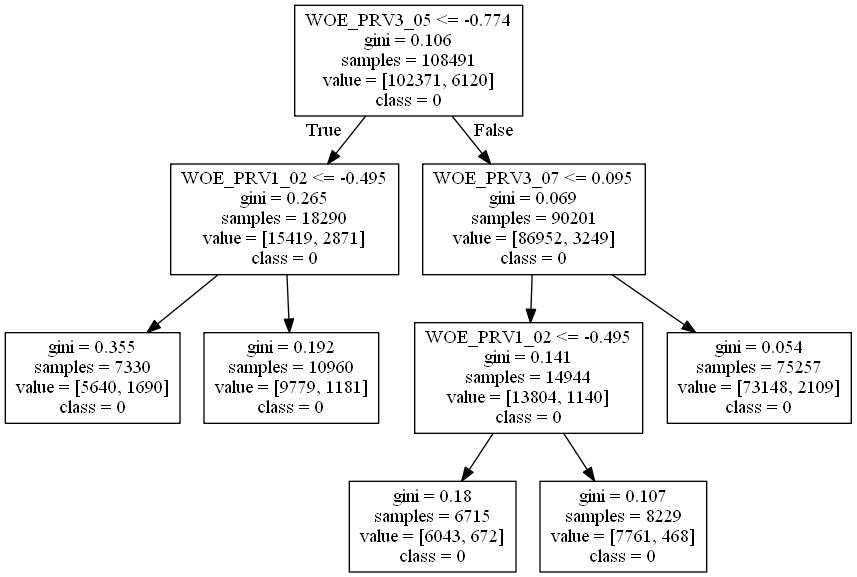

In [31]:
best = 4

#best_leaf_size = 12072

best_leaf_size = 5500

clf = tree.DecisionTreeClassifier(max_depth=best, min_samples_leaf = best_leaf_size
                                 ,min_impurity_decrease = 0.000015
                                  #,min_impurity_split = 0.25
                                 );
clf_fit = clf.fit(Xfin, y);


#Определение оптимальной глубины дерева для "FINAL TREE"

probs_trn = clf.predict_proba(Xfin)[:,1]
probs_tst = clf.predict_proba(Xfin_tst)[:,1]
probs_oot = clf.predict_proba(Xfin_oot)[:,1]

trn_fpr, trn_tpr, _ = metrics.roc_curve(y, probs_trn)    
tst_fpr, tst_tpr, _ = metrics.roc_curve(y_tst, probs_tst)    
oot_fpr, oot_tpr, _ = metrics.roc_curve(y_oot, probs_oot)
    
trn_sd = 100*round(2*metrics.auc(trn_fpr,trn_tpr) - 1,4)
tst_sd = 100*round(2*metrics.auc(tst_fpr,tst_tpr) - 1,4)
oot_sd = 100*round(2*metrics.auc(oot_fpr,oot_tpr) - 1,4)

print(" Джини без кросс валидации TRAIN =",trn_sd )
print(" Джини без кросс валидации TEST =",tst_sd )
print(" Джини без кросс валидации OOT =", oot_sd )

print(" Джини кросс валидация на 4-х фолдах",100*round(2*np.mean(cross_val_score(clf, Xfin, y, cv = 5, scoring = 'roc_auc'))-1,4))

for j in range(0,len(np.round(clf_fit.feature_importances_,4))):
    
    q = list(d.loc[d['vara']==str(woe_line[j])[-7:],'descr'])[0]
    
    print('\nWeight ',100*np.round(clf_fit.feature_importances_,4)[j],' for ',woe_line[j],' - ',q)


#Графическое обоснование

dot_data = tree.export_graphviz(clf, out_file=None, 
feature_names=woe_line,
                         class_names=['0','1'])
                        # filled=True 
                        # rounded=True  
                        # special_characters=True 
graph = pydotplus.graph_from_dot_data(dot_data) 
#Выгрузка png
Image(graph.create_png())

 Джини без кросс валидации TRAIN = 42.809999999999995
 Джини без кросс валидации TEST = 41.8
 Джини без кросс валидации OOT = 44.66
 Джини кросс валидация на 4-х фолдах 41.53

Weight  68.35  for  PRV3_05  -  Общая сумма исковых требований [на горизонте 1 года] соотнесенная к прибыли до налогообложения, для типа участия "Ответчик"

Weight  1.39  for  PRV3_08  -  Общая сумма исковых требований [на горизонте 1 года] соотнесенная к собственному капиталу, для типа участия "Ответчик"

Weight  8.01  for  PRV3_07  -  Общая сумма исковых требований [на горизонте 1 года] соотнесенная к денежным средствам и эквивалентам, для типа участия "Ответчик"

Weight  22.25  for  PRV1_02  -  Доля исков с типом участия «Ответчик» в общем числе исковых требований  требований [на горизонте 1 года]  (соотнесенные по количеству)


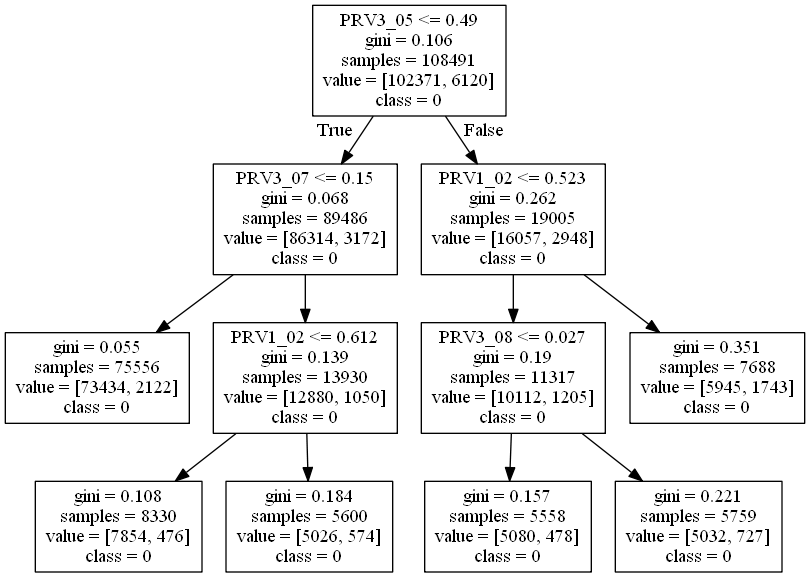

<br\>

**Final model PSI**

In [ ]:
tot_TRAIN = len(probs_trn)
tot_TEST = len(probs_tst)
tot_OOT = len(probs_oot)

TRAIN_fin_pds = pd.DataFrame(probs_trn,columns = ['pd_pred'])
TEST_fin_pds = pd.DataFrame(probs_tst,columns = ['pd_pred'])
OOT_fin_pds = pd.DataFrame(probs_oot,columns = ['pd_pred'])

name = 'pd_pred'
trn_woe_tmp = (TRAIN_fin_pds.groupby(name)[name].agg({'count'})/tot_TRAIN).reset_index().rename(columns={name:name,'count':'count_trn'})
tst_woe_tmp = (TEST_fin_pds.groupby(name)[name].agg({'count'})/tot_TEST).reset_index().rename(columns={name:name,'count':'count_tst'})
oot_woe_tmp = (OOT_fin_pds.groupby(name)[name].agg({'count'})/tot_OOT).reset_index().rename(columns={name:name,'count':'count_oot'})
        
psi_tst = pd.merge(trn_woe_tmp,tst_woe_tmp,how='left',on=name)
psi_oot = pd.merge(trn_woe_tmp,oot_woe_tmp,how='left',on=name)
print('TEST \n')
print(psi_tst)
        
psi_tst.loc[:,'psi_part']=(psi_tst['count_trn']-psi_tst['count_tst'])*np.log(psi_tst['count_trn']/psi_tst['count_tst'])
print('PSI Hold: ',sum(psi_tst['psi_part']),'\n')
        
print('OOT \n')
print(psi_oot)
        
psi_oot.loc[:,'psi_part']=(psi_oot['count_trn']-psi_oot['count_oot'])*np.log(psi_oot['count_trn']/psi_oot['count_oot'])
print('PSI Out-of-Time: ',sum(psi_oot['psi_part']),'\n')

** model_efficiency by INDUSTRY **

In [ ]:
X_industry_trn = TRAIN_info_WoE
X_industry_tst = TEST_info_WoE
X_industry_oot = OOT_info_WoE

X_industry_trn = X_industry_trn[['default','SBRF_INDUSTRY_KRUP']].reset_index(drop=True)
X_industry_tst = X_industry_tst[['default','SBRF_INDUSTRY_KRUP']].reset_index(drop=True)
X_industry_oot = X_industry_oot[['default','SBRF_INDUSTRY_KRUP']].reset_index(drop=True)

X_industry_trn = X_industry_trn.merge(TRAIN_fin_pds,right_index=True,left_index=True)
X_industry_tst = X_industry_tst.merge(TEST_fin_pds,right_index=True,left_index=True)
X_industry_oot = X_industry_oot.merge(OOT_fin_pds,right_index=True,left_index=True)                                                                           
                                                                           

In [ ]:
l_indstr = []

for indstr in list(TRAIN['SBRF_INDUSTRY_KRUP'].dropna().drop_duplicates()):
    
    trn_woe_tmp_x_yer = X_industry_trn.loc[X_industry_trn['SBRF_INDUSTRY_KRUP']==indstr,'pd_pred']
    trn_woe_tmp_y_yer = X_industry_trn.loc[X_industry_trn['SBRF_INDUSTRY_KRUP']==indstr,'default']
        
    tst_woe_tmp_x_yer = X_industry_tst.loc[X_industry_tst['SBRF_INDUSTRY_KRUP']==indstr,'pd_pred']
    tst_woe_tmp_y_yer = X_industry_tst.loc[X_industry_tst['SBRF_INDUSTRY_KRUP']==indstr,'default']
        
    #oot_woe_tmp_x_yer = X_industry_oot.loc[X_industry_oot['SBRF_INDUSTRY_KRUP']==indstr,'pd_pred']
    #oot_woe_tmp_y_yer = X_industry_oot.loc[X_industry_oot['SBRF_INDUSTRY_KRUP']==indstr,'default']
        
    trn_woe_fpr, trn_woe_tpr, _ = metrics.roc_curve(trn_woe_tmp_y_yer, trn_woe_tmp_x_yer)    
    tst_woe_fpr, tst_woe_tpr, _ = metrics.roc_curve(tst_woe_tmp_y_yer, tst_woe_tmp_x_yer)    
    #oot_woe_fpr, oot_woe_tpr, _ = metrics.roc_curve(oot_woe_tmp_y_yer, oot_woe_tmp_x_yer)
        
    trn_woe_sd_yer = 100*round(2*metrics.auc(trn_woe_fpr,trn_woe_tpr) - 1,4)
    tst_woe_sd_yer = 100*round(2*metrics.auc(tst_woe_fpr,tst_woe_tpr) - 1,4)
    #oot_woe_sd_yer = 100*round(2*metrics.auc(oot_woe_fpr,oot_woe_tpr) - 1,4)
        
    trn_woe_c_yer = 100*round(np.corrcoef(trn_woe_tmp_y_yer, trn_woe_tmp_x_yer)[0,1],4)
    tst_woe_c_yer = 100*round(np.corrcoef(tst_woe_tmp_y_yer, tst_woe_tmp_x_yer)[0,1],4)
    #oot_woe_c_yer = 100*round(np.corrcoef(oot_woe_tmp_y_yer, oot_woe_tmp_x_yer)[0,1],4)        
        
    print(' INDUSTRY :',indstr,'  cnt: ',trn_woe_tmp_y_yer.size,' TRAIN [WoE] Sommers D : ', trn_woe_sd_yer,' correlation:',trn_woe_c_yer)
    print(' INDUSTRY :',indstr,'  cnt: ',tst_woe_tmp_y_yer.size,' TEST [WoE] Sommers D : ', tst_woe_sd_yer,' correlation:',tst_woe_c_yer)
    #print(' INDUSTRY :',indstr,'  cnt: ',oot_woe_tmp_y_yer.size,' OOT [WoE] Sommers D : ', oot_woe_sd_yer,' correlation:',oot_woe_c_yer)
    
    
    print('\n','----------------------------------------------------------------------------')
    
    if trn_woe_tmp_y_yer.size > 100:
        
        l_indstr.append([indstr,trn_woe_tmp_y_yer.size,trn_woe_sd_yer,tst_woe_tmp_y_yer.size,tst_woe_sd_yer])

trn_woe_fpr, trn_woe_tpr, _ = metrics.roc_curve( X_industry_trn['default'], X_industry_trn['pd_pred'])
print('Total: ',100*round(2*metrics.auc(trn_woe_fpr,trn_woe_tpr) - 1,4))

indstr = pd.DataFrame(l_indstr,columns = ['indstry','TRAIN count','TRAIN SomersD','TEST count','TEST SomersD'])
indstr.to_csv("D:\\Shepitko-IS\\Desktop\\Projects\\b6___Pravo\\Data\\02___MFA\\_mfa_indstr_v0.16.csv",sep=',',encoding='windows-1251')

** model_efficiency by Business Segment **

In [ ]:
X_business_segm_trn = TRAIN_info_WoE
X_business_segm_tst = TEST_info_WoE
X_business_segm_oot = OOT_info_WoE

X_business_segm_trn = X_business_segm_trn[['default','Process_type']].reset_index(drop=True)
X_business_segm_tst = X_business_segm_tst[['default','Process_type']].reset_index(drop=True)
X_business_segm_oot = X_business_segm_oot[['default','Process_type']].reset_index(drop=True)

X_business_segm_trn = X_business_segm_trn.merge(TRAIN_fin_pds,right_index=True,left_index=True)
X_business_segm_tst = X_business_segm_tst.merge(TEST_fin_pds,right_index=True,left_index=True)
X_business_segm_oot = X_business_segm_oot.merge(OOT_fin_pds,right_index=True,left_index=True)

<br>


## Применение прочих Бэнчмарков <a name=other_benchmarks></a>


[Содержание](#content)


### Moody's Benchmark [Moody's Rating Methodology]

<br>

**I - Global Integrated Oil & Gas Industry**

 $\sqrt{3x-1}+(1+x)^2$